<a href="https://colab.research.google.com/github/thirasak-t/Code-TT/blob/master/Project_group_1_No_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Code**

## Import related libraries

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import files
import plotly.express as px


## Upload files for analysis



In [0]:
uploaded = files.upload()

Saving Data_1.csv to Data_1.csv


## Read file

In [0]:
df = pd.read_csv('Data_1.csv')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0
...,...,...,...,...,...,...,...,...
1714,1715,2/17/2020 22:00,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
1715,1716,2/17/2020 22:00,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
1716,1717,2/17/2020 22:00,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0
1717,1718,2/17/2020 22:00,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


## Read file and create data dictionary

> ### Read file



In [0]:
 def  read_file(filename,uploaded):
   file = uploaded[filename]
   file = file.splitlines()
   #print(file[:2])
   file = list(map(lambda x:''.join(str(x)[2:-1].split('"')),file))
   file = list(map(lambda x: x.split(','),file))
   #print(file)
   file = list(map(lambda x: x[0:2]+ [','.join(x[2:-5])] + x[-5:],file))
   #print(file)
   return file

> ### Create data dictionary

In [0]:
def create_data_dictionary(File,head):
  dic = dict()
  for i in head:
    dic[i] = []
  for j in File[1:]:
    for k in range(len(j)):
      dic[head[k]].append(j[k])
  return dic

file = read_file('Data_1.csv',uploaded)
list_file = list(map(lambda x:x[1:],file))
order= [i+1 for i in range(len(list_file[1:]))]
head = list_file[0]
dic_file = create_data_dictionary(list_file,head)
#print(head)
#print( list_file[1])


## Default data table

In [0]:
df_f = pd.DataFrame(dic_file,order)
df_f.head(806)

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0
...,...,...,...,...,...,...,...
802,2/5/2020 12:20,,Japan,4/2/2020 16:43,22,0,1
803,2/5/2020 12:20,Hong Kong,Hong Kong,5/2/2020 13:13,21,1,0
804,2/5/2020 12:20,,South Korea,5/2/2020 15:33,19,0,0
805,2/5/2020 12:20,Qinghai,Mainland China,5/2/2020 3:13,17,0,3


## Create data dictionary

> ### Create dictionary

In [0]:
def create_data_country(x):
  #print(file_)
  dict_data = dict()
  #key = country,  don't have state
  dict_date = dict()
  #key = date, don't have state
  dict_country = dict()
  #key = country, value = dict
  dict_data_country = dict()
  #key = country,  have state
  list_data = []
  #don't have state
  date_now = x[0][0]
  list_country_date_now = []
  list_country_state = []
  list_date = [] 
  dict_ = dict()
  for i in x:
    date = i[0]
    state = i[1]
    country =	i[2]
    #print(state ,i)
    if 'China' in country:
      country = 'China'
      i = i[:2]+['China']+i[3:]
    if country not in dict_data:
      dict_data[country] = []
      dict_country[country] = dict()
      dict_data_country = []
    dict_data_country.append(i)
    if date not in dict_date:
      dict_date[date]=[]
    if date != date_now:
      for j in list_country_date_now:
        #print(j)
        con = 0
        death = 0
        rec = 0
        if j in list_country_state:
          
          dict_start = dict_country[j]
          if j == 'Canada':
            on,ON =[0,0,0],[0,0,0]
            for k in dict_start:
              state_ = dict_start[k]
              if k == 'Ontario':
                on[0] += int(state_[4])
                on[1] += int(state_[5])
                on[2] += int(state_[6])
              elif k == 'Toronto, ON' or k =='London, ON':
                ON[0] += int(state_[4])
                ON[1] += int(state_[5])
                ON[2] += int(state_[6])
              else:
                con += int(state_[4])
                death += int(state_[5])
                rec += int(state_[6])
            if  ON[0]<= on[0]:
              on = ON
            con += on[0]
            death += on[1]
            rec += on[2]
          elif j == 'US':
            wa, ca, il,az,IL,MA,CA,WA,AZ,WI,TX= [0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]
            for k in dict_start:
              state_ = dict_start[k]
              if k == 'Washington':
                wa[0] += int(state_[4])
                wa[1] += int(state_[5])
                wa[2] += int(state_[6])
              elif k == 'Chicago':
                ca[0] += int(state_[4])
                ca[1] += int(state_[5])
                ca[2] += int(state_[6])
              elif k == 'Illinois':
                il[0] += int(state_[4])
                il[1] += int(state_[5])
                il[1] += int(state_[6])
              elif k == 'Arizona':
                az[0] += int(state_[4])
                az[1] += int(state_[5])
                az[2] += int(state_[6])
              elif 'IL' in k:
                IL[0] += int(state_[4])
                IL[1] += int(state_[5])
                IL[2] += int(state_[6])
              elif 'MA' in k:
                MA[0] += int(state_[4])
                MA[1] += int(state_[5])
                MA[2] += int(state_[6])
              elif 'CA' in k:
                CA[0] += int(state_[4])
                CA[1] += int(state_[5])
                CA[2] += int(state_[6])
              elif 'WA' in k:
                WA[0] += int(state_[4])
                WA[1] += int(state_[5])
                WA[2] += int(state_[6])
              elif 'AZ' in k:
                AZ[0] += int(state_[4])
                AZ[1] += int(state_[5])
                AZ[2] += int(state_[6])
              elif 'WI' in k:
                WI[0] += int(state_[4])
                WI[1] += int(state_[5])
                WI[2] += int(state_[6])
              elif 'TX' in k:
                TX[0] += int(state_[4])
                TX[1] += int(state_[5])
                TX[2] += int(state_[6])
            if wa[0] <=WA[0]:
              wa = WA
            if ca[0]<=CA[0]:
              ca=CA
            if il[0]<=IL[0]:
              il=IL
            if az[0]<=AZ[0]:
              az =AZ
            con +=wa[0] +ca[0]+il[0]+az[0]+MA[0]+WI[0]+TX[0]
            death += wa[1] +ca[1]+il[1]+az[1]+MA[1]+WI[1]+TX[1]
            rec += wa[2] +ca[2]+il[2]+az[2]+MA[2]+WI[2]+TX[2]
          else:
            for k in dict_start:
              state_ = dict_start[k]
              con += int(state_[4])
              death += int(state_[5])
              rec += int(state_[6])
          SI = con-death-rec
          last =  state_[3]
          if 'T'in last:
            last = Last_Update(last[:-3])
          data_country = [state_[0]]+[j]+[last]+[(con)]+[(SI)]+[(death)]+[(rec)]
          dict_data[j].append(data_country)
          list_date.append(data_country)
          #dict_date[date_now].append(data_country)
          list_data.append(data_country)
        elif j not in list_country_state:
          #print(date_now,j)
          data__ = dict_ [j]
          last = data__ [3]
          if 'T'in last:
            last = Last_Update(last[:-3])
          data__ = [data__[0]]+[data__[2]]+[last]+[int(data__[4])]+[(int(data__[4])-int(data__[5])-int(data__[6]))]+[int(data__[5])]+[int(data__[6])]
          dict_data[j].append(data__)
          list_date.append(data__)
          #dict_date[date_now].append(data__)
          list_data.append(data__)
      #print(list_country_date_now)
      list_date.sort(key = lambda x:x[4],reverse = True)
      list_date.sort(key = lambda x:x[3],reverse = True)
      for a in  list_date:
        dict_date[date_now].append(a)
      date_now = date
      list_date = []
      list_country_date_now = []
      list_country_state = []
    if date == date_now:
      if country not in list_country_date_now:
        list_country_date_now.append(country)
      if state == '':
        #print(country)
        dict_ [country] = i
      else:
        if country not in list_country_state:
          list_country_state.append(country)
        #print('----',country)
        dict_state = dict_country[country]
        dict_state[state] = i
        dict_country[country] = dict_state
        
  for j in list_country_date_now:
    #print(j)
    con = 0
    death = 0
    rec = 0
    if j in list_country_state:
      
      dict_start = dict_country[j]
      if j == 'Canada':
        on,ON =[0,0,0],[0,0,0]
        for k in dict_start:
          state_ = dict_start[k]
          if k == 'Ontario':
            on[0] += int(state_[4])
            on[1] += int(state_[5])
            on[2] += int(state_[6])
          elif k == 'Toronto, ON' or k =='London, ON':
            ON[0] += int(state_[4])
            ON[1] += int(state_[5])
            ON[2] += int(state_[6])
          else:
            con += int(state_[4])
            death += int(state_[5])
            rec += int(state_[6])
        if  ON[0]<= on[0]:
          on = ON
        con += on[0]
        death += on[1]
        rec += on[2]
      elif j == 'US':
        wa, ca, il,az,IL,MA,CA,WA,AZ,WI,TX= [0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]
        for k in dict_start:
          state_ = dict_start[k]
          if k == 'Washington':
            wa[0] += int(state_[4])
            wa[1] += int(state_[5])
            wa[2] += int(state_[6])
          elif k == 'Chicago':
            ca[0] += int(state_[4])
            ca[1] += int(state_[5])
            ca[2] += int(state_[6])
          elif k == 'Illinois':
            il[0] += int(state_[4])
            il[1] += int(state_[5])
            il[1] += int(state_[6])
          elif k == 'Arizona':
            az[0] += int(state_[4])
            az[1] += int(state_[5])
            az[2] += int(state_[6])
          elif 'IL' in k:
            IL[0] += int(state_[4])
            IL[1] += int(state_[5])
            IL[2] += int(state_[6])
          elif 'MA' in k:
            MA[0] += int(state_[4])
            MA[1] += int(state_[5])
            MA[2] += int(state_[6])
          elif 'CA' in k:
            CA[0] += int(state_[4])
            CA[1] += int(state_[5])
            CA[2] += int(state_[6])
          elif 'WA' in k:
            WA[0] += int(state_[4])
            WA[1] += int(state_[5])
            WA[2] += int(state_[6])
          elif 'AZ' in k:
            AZ[0] += int(state_[4])
            AZ[1] += int(state_[5])
            AZ[2] += int(state_[6])
          elif 'WI' in k:
            WI[0] += int(state_[4])
            WI[1] += int(state_[5])
            WI[2] += int(state_[6])
          elif 'TX' in k:
            TX[0] += int(state_[4])
            TX[1] += int(state_[5])
            TX[2] += int(state_[6])
        if wa[0] <=WA[0]:
          wa = WA
        if ca[0]<=CA[0]:
          ca=CA
        if il[0]<=IL[0]:
          il=IL
        if az[0]<=AZ[0]:
          az =AZ
        con +=wa[0] +ca[0]+il[0]+az[0]+MA[0]+WI[0]+TX[0]
        death += wa[1] +ca[1]+il[1]+az[1]+MA[1]+WI[1]+TX[1]
        rec += wa[2] +ca[2]+il[2]+az[2]+MA[2]+WI[2]+TX[2]
      else:
        for k in dict_start:
          state_ = dict_start[k]
          con += int(state_[4])
          death += int(state_[5])
          rec += int(state_[6])
      SI = con-death-rec
      last =  state_[3]
      if 'T' in last:
        last = Last_Update(last[:-3])
      data_country = [state_[0]]+[j]+[last]+[(con)]+[(SI)]+[(death)]+[(rec)]
      dict_data[j].append(data_country)
      list_date.append(data_country)
      #dict_date[date_now].append(data__)
      list_data.append(data_country)
    elif j not in list_country_state:
      #print(date_now,j)
      data__ = dict_ [j]
      last = data__ [3]
      if 'T' in last:
        last = Last_Update(last[:-3])
      data__ = [data__[0]]+[data__[2]]+[last]+[int(data__[4])]+[(int(data__[4])-int(data__[5])-int(data__[6]))]+[int(data__[5])]+[int(data__[6])]
      dict_data[j].append(data__)
      list_date.append(data__)
      #dict_date[date].append(data__)
      list_data.append(data__)
  list_date.sort(key = lambda x:x[4],reverse = True)
  list_date.sort(key = lambda x:x[3],reverse = True)
  for a in  list_date:
    dict_date[date_now].append(a)
    
  #print(list_country_date_now)

          
  return dict_data,dict_date ,dict_country ,dict_data_country ,list_data
dict_data,dict_date ,dict_country ,dict_data_country ,list_data = create_data_country(list_file[1:]) 
list_country = list(dict_data)
list_date = list(dict_date)
HEAD = ['Date','Country','Last Update','Confirmed','Still infected','Deaths','Recovered']

>### Create_Last_Update 

In [0]:
 def Last_Update(last):
  last = last.split('T')
  a,b=last[0],last[1]
  a=a.split('-')
  a=(str(int(a[1]))+'/'+str(int(a[2]))+'/'+a[0])
  last = a+' '+b

  return last

## Create list country

In [0]:
def create_list_country(country, list_date, dict_date):
  last = [0,0,0,0,0]
  list_data = []
  for i in list_date:
    last[0] = i
    dict_ = dict()
    data = dict_date[i]
    for j in data:
      coun = j[1]
      con = int(j[3])
      si = int(j[4])
      death = int(j[5])
      rec = int(j[6])
      if coun == country:
        dict_[coun] = [i,con,si,death,rec]
    if country in dict_:
      last  = dict_[country]
      list_data.append(dict_[country])
    else:
      list_data.append(last)
  return list_data

## Create world data 

In [0]:
def world_data(list_date, dict_date):
  list_world = []
  dict_world = {'Date':[],'Confirmed':[],'Still infected':[],'Deaths':[],'Recovered':[]}
  for i in list_date:
    con = 0
    si = 0
    death = 0
    rec = 0
    data = dict_date[i]
    for j in data:
      con += int(j[3])
      si += int(j[4])
      death += int(j[5])
      rec += int(j[6])
    data_ = [i,con,si,death,rec]
    list_world.append(data_)
    q = 0
    
    for k in list(dict_world):
      dict_world[k].append(data_[q])
      q+=1
  return list_world,dict_world
list_world, dict_world= world_data(list_date, dict_date)
head_world = list(dict_world)
#pd.DataFrame(list_world)

## Create graph

> ### DataFarame graph geo

In [0]:
def data_geo_about_2019_nCoV(list_country,list_data):
  dict_c = dict()
  list_iso_alpha = ['CHN','USA','JPN','THA','KOR','HKG','MAC','TWN','SGP','PHL','MYS','VNM','AUS','MEX','BRA','FRA','NPL','CAN','KHM','LKA','CIV','GER','FIN','UAE','IND','ITA','SWE','RUS','ESP','GBR','BEL','NaN','EGY']
  for a in range(len(list_country)):
    key = list_country[a]
    dict_c[key] = list_iso_alpha[a]
  DF = pd.DataFrame(list_data,[i+1 for i in range(len(list_data))],HEAD)
  
  dict_data_new = {'Infected person':[],'Multiply':[],'iso_alpha':[]}
  date = ['1/22/2020 12:00']
  max_j = 0
  date_now = '1/22/2020 12:00'
  for i in range(len(list_data)):
    #order = i+1
    data = list_data[i]
    country = data[1]
    con = data[3]
    if data[0] != date_now:
      date_now=data[0]
      date.append(date_now)
    j = 0
    while con >= 100:
      j+=1
      con //= 100
    if j >max_j:
      max_j = j
    mul = 'x%d'%(10**(j*2))
    dict_data_new['Infected person'].append(con)
    dict_data_new['Multiply'].append(mul)
    dict_data_new['iso_alpha'].append(dict_c[country])
  df_ = pd.DataFrame(dict_data_new,[i+1 for i in range(len(list_data))])
  DF['Infected person'] = df_['Infected person']
  DF['Multiply'] = df_['Multiply']
  DF['iso_alpha'] = df_['iso_alpha']
  dic_ = {'Date':[],'Country':[],'Last Update':[],'Confirmed':[],'Still infected':[],'Deaths':[],'Recovered':[],'Infected person':[],'Multiply':[],'iso_alpha':[]}
  #num = 0
  #for k in range(1,len(date)+1):
  #  D = date[1]
  #  for q in range(max_j+1):
  #    num +=1
  #    dic_['Date'].append(D)
  #    dic_['Country'].append('')
  #    dic_['Last Update'].append(D)
  #    dic_['Confirmed'].append(0)
  #    dic_['Recovered'].append(0)
  #    dic_['Still infected'].append(0)
  #    dic_['Deaths'].append(0)
  #    dic_['Infected person'].append(1)
  #    dic_['Multiply'].append( 'x%d'%(10**(q*2)))
  #    dic_['iso_alpha'].append('BRU')
  #df_dic_ =  pd.DataFrame(dic_,[i+1+len(list_data) for i in range(num)])
  #ans = pd.concat([DF,df_dic_])
  for r in range(1,len(list_data)+1):
    #print(DF.loc[r,['Infected person','iso_alpha']])
    if DF.loc[r,'Infected person'] == 0 or DF.loc[r,'iso_alpha'] == 'NaN':
      DF.drop(r,axis = 0,inplace=True)
  
  return DF
df_nCoV = data_geo_about_2019_nCoV(list_country,list_data)
#df_nCoV.head(630)

> ### Graph Geo 2019-nCoV

In [0]:
def graph_geo_about_2019_nCoV(DF):
  fig = px.scatter_geo(DF, locations="iso_alpha", color="Multiply",
                    hover_name="Country", size="Infected person",
                    animation_frame="Date",
                    projection="natural earth")
  fig.show()


> ### Example graph geo

In [0]:

df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                    hover_name="country", size="pop",
                    animation_frame="year",
                    projection="natural earth")
fig.show()
#df.set_index('country', inplace=True)
#df.loc[['China','Thailand'],['iso_alpha']]
df


KeyboardInterrupt: ignored

>### Bar chart

In [0]:
def create_bar_chart(data_date,text):
  dict_ = {'Country':[],'Confirmed':[],'Still infected':[],'Deaths':[],'Recovered':[]}
  num = 0
  for i in data_date:
    num +=1
    dict_ ['Country'].append(i[1])
    dict_ ['Confirmed'].append(int(i[3]))
    dict_ ['Still infected'].append(int(i[4]))
    dict_ ['Deaths'].append(int(i[5]))
    dict_ ['Recovered'].append(int(i[6]))
  df = pd.DataFrame(dict_)
  df.set_index('Country', inplace=True)
  ax = df.plot(kind='barh', logx=True,color = ['dodgerblue','purple','crimson','lime'] , title=text, figsize=(28, num//1.5));
  ax.set_xlabel('Number of people')


>### Line graph


In [0]:
def plot_line_graph(list_x,text,head_world=['Date','Confirmed','Still infected','Deaths','Recovered']):
  df = pd.DataFrame(list_x,[i+1 for i in range(len(list_world))],head_world)
  df.set_index('Date', inplace=True)
  ax = df.plot(kind='line', title=text,color=['b','fuchsia','red','springgreen'],figsize=(30, 10));
  ax.set_ylabel('Number of people');
  ax.axhline(0, color="black", linestyle="--", linewidth=.5)
  #plt.show()

# **Daily level information on the number of 2019-nCoV affected cases across the globe**


# Daily data

## 1/22/2020 12:00

>### Data table

In [0]:
pd.DataFrame(dict_date['1/22/2020 12:00'],[i+1 for i in range(len(dict_date['1/22/2020 12:00']))],HEAD)


,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,China,1/22/2020 12:00,549,549,0,0
2,1/22/2020 12:00,Japan,1/22/2020 12:00,2,2,0,0
3,1/22/2020 12:00,Thailand,1/22/2020 12:00,2,2,0,0
4,1/22/2020 12:00,US,1/22/2020 12:00,1,1,0,0
5,1/22/2020 12:00,South Korea,1/22/2020 12:00,1,1,0,0


>### Data graph

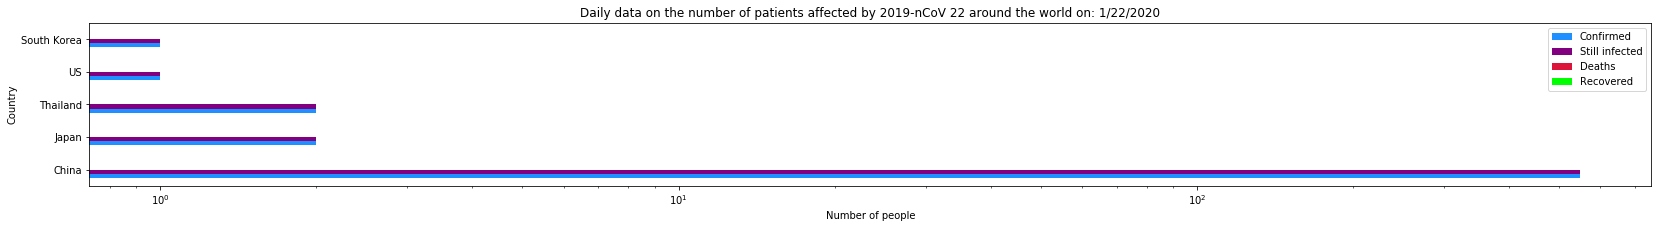

In [0]:
df = create_bar_chart(dict_date['1/22/2020 12:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/22/2020')

## 1/23/2020 12:00

>### Data table

In [0]:
pd.DataFrame(dict_date['1/23/2020 12:00'],[i+1 for i in range(len(dict_date['1/23/2020 12:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,China,1/23/2020 12:00,641,593,18,30
2,1/23/2020 12:00,Thailand,1/23/2020 12:00,3,3,0,0
3,1/23/2020 12:00,Hong Kong,1/23/2020 12:00,2,2,0,0
4,1/23/2020 12:00,Macau,1/23/2020 12:00,2,2,0,0
5,1/23/2020 12:00,Vietnam,1/23/2020 12:00,2,2,0,0
6,1/23/2020 12:00,Taiwan,1/23/2020 12:00,1,1,0,0
7,1/23/2020 12:00,US,1/23/2020 12:00,1,1,0,0
8,1/23/2020 12:00,Japan,1/23/2020 12:00,1,1,0,0
9,1/23/2020 12:00,South Korea,1/23/2020 12:00,1,1,0,0
10,1/23/2020 12:00,Singapore,1/23/2020 12:00,1,1,0,0


>### Data graph

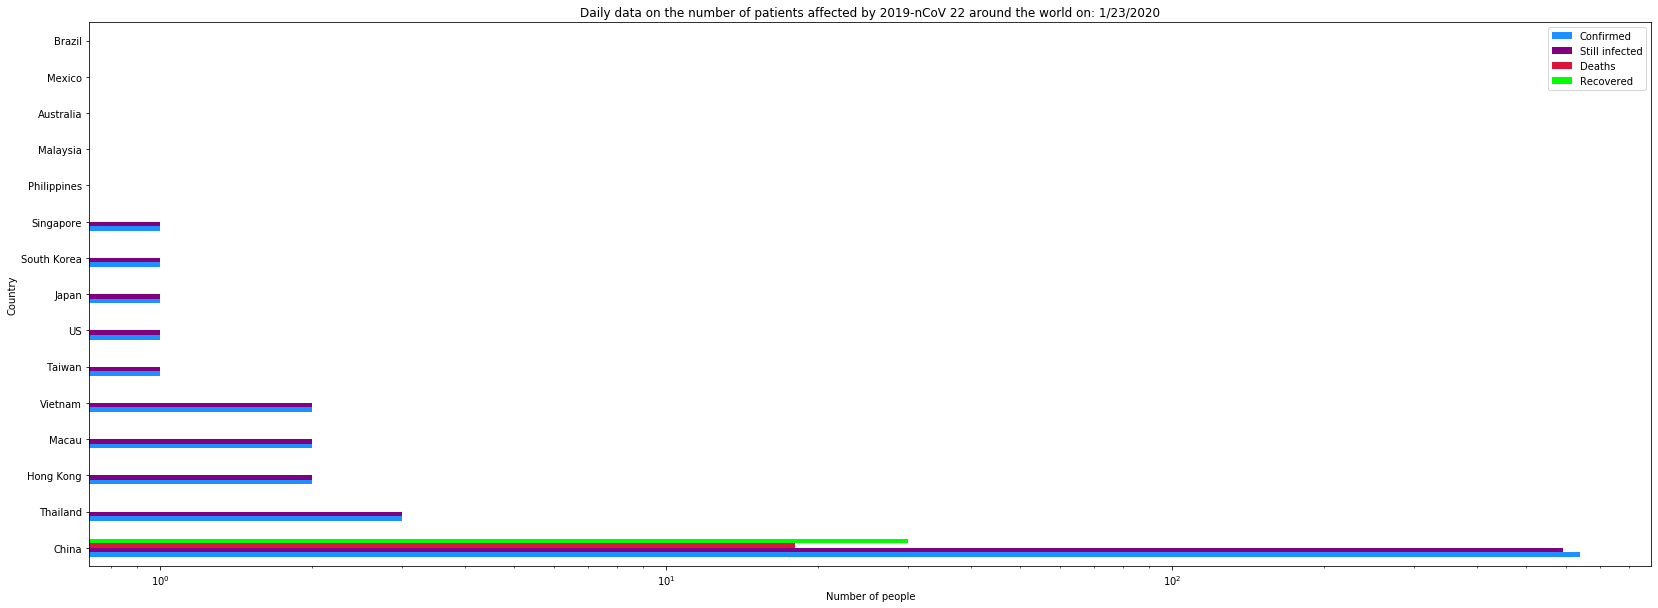

In [0]:
df = create_bar_chart(dict_date['1/23/2020 12:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/23/2020')

## 1/24/2020 12:00	

>### Data table

In [0]:
pd.DataFrame(dict_date['1/24/2020 12:00'],[i+1 for i in range(len(dict_date['1/24/2020 12:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/24/2020 12:00,China,1/24/2020 12:00,918,856,26,36
2,1/24/2020 12:00,Thailand,1/24/2020 12:00,5,5,0,0
3,1/24/2020 12:00,Taiwan,1/24/2020 12:00,3,3,0,0
4,1/24/2020 12:00,Singapore,1/24/2020 12:00,3,3,0,0
5,1/24/2020 12:00,Hong Kong,1/24/2020 12:00,2,2,0,0
6,1/24/2020 12:00,Macau,1/24/2020 12:00,2,2,0,0
7,1/24/2020 12:00,US,1/24/2020 12:00,2,2,0,0
8,1/24/2020 12:00,Japan,1/24/2020 12:00,2,2,0,0
9,1/24/2020 12:00,South Korea,1/24/2020 12:00,2,2,0,0
10,1/24/2020 12:00,Vietnam,1/24/2020 12:00,2,2,0,0


>### Data graph

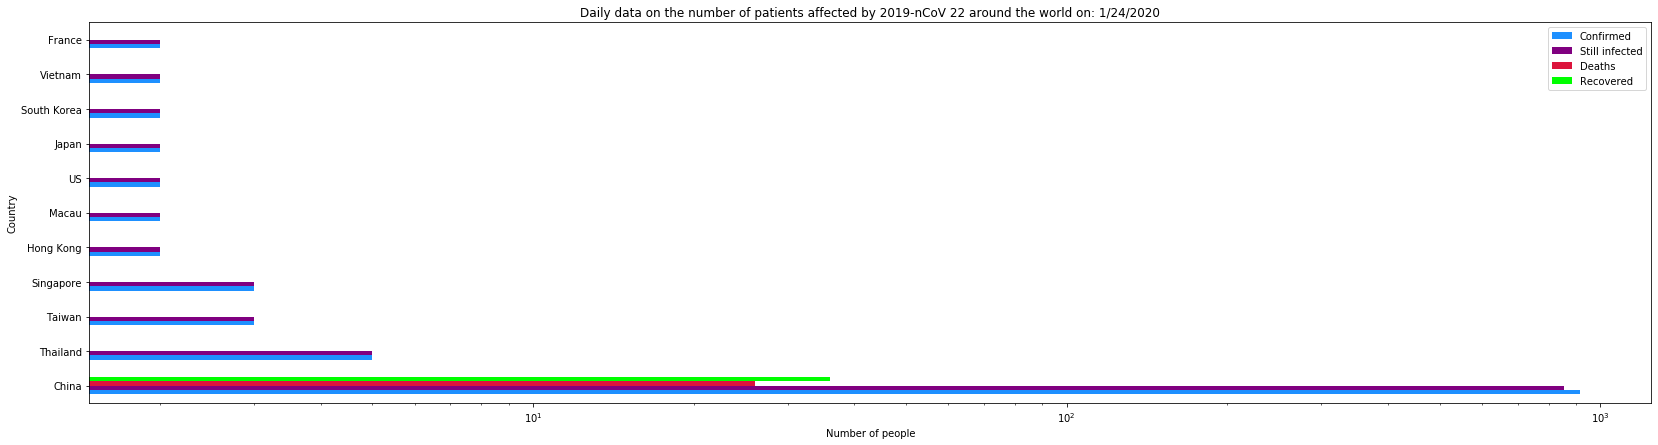

In [0]:
df = create_bar_chart(dict_date['1/24/2020 12:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/24/2020')

## 1/25/2020 22:00	

>### Data table

In [0]:
pd.DataFrame(dict_date['1/25/2020 22:00'],[i+1 for i in range(len(dict_date['1/25/2020 22:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/25/2020 22:00,China,1/25/2020 22:00,1981,1876,56,49
2,1/25/2020 22:00,Thailand,1/25/2020 12:00,7,7,0,0
3,1/25/2020 22:00,Hong Kong,1/25/2020 12:00,5,5,0,0
4,1/25/2020 22:00,Australia,1/25/2020 12:00,4,4,0,0
5,1/25/2020 22:00,Taiwan,1/25/2020 12:00,3,3,0,0
6,1/25/2020 22:00,US,1/25/2020 12:00,3,3,0,0
7,1/25/2020 22:00,South Korea,1/25/2020 12:00,3,3,0,0
8,1/25/2020 22:00,Singapore,1/25/2020 12:00,3,3,0,0
9,1/25/2020 22:00,France,1/25/2020 12:00,3,3,0,0
10,1/25/2020 22:00,Malaysia,1/25/2020 12:00,3,3,0,0


>### Data graph

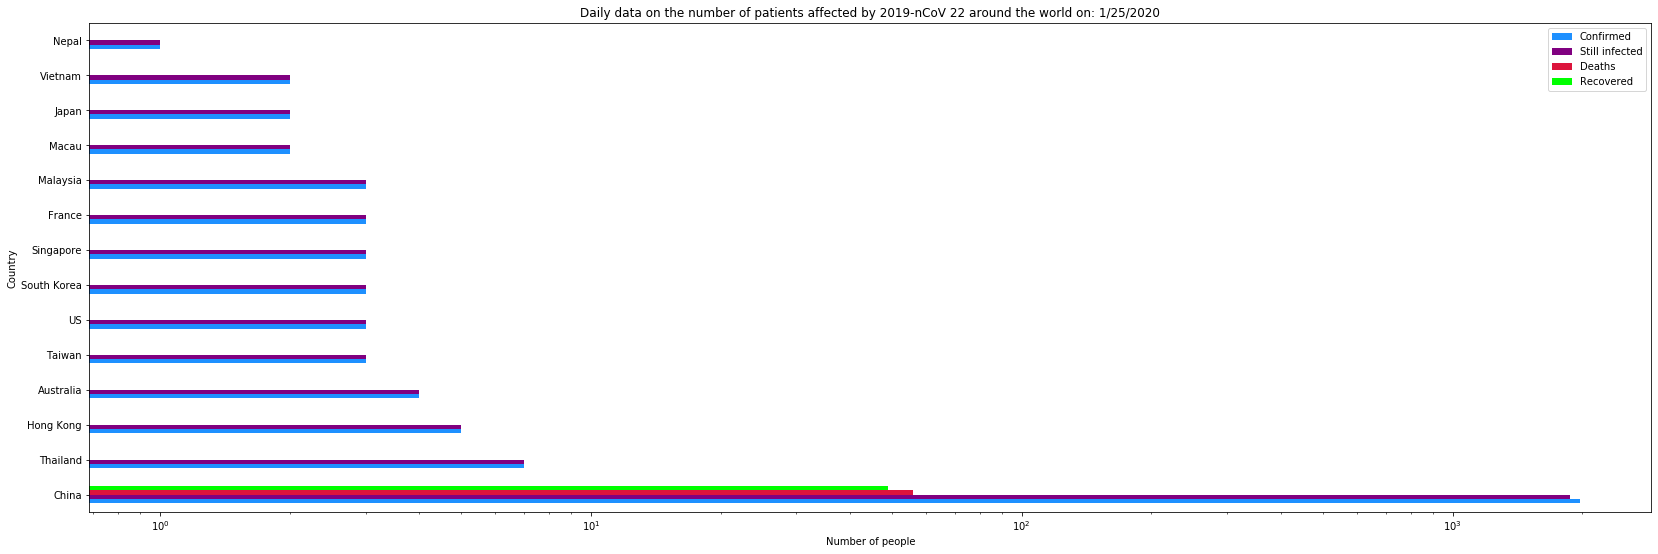

In [0]:
df = create_bar_chart(dict_date['1/25/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/25/2020')

## 1/26/2020 23:00	

>### Data table

In [0]:
pd.DataFrame(dict_date['1/26/2020 23:00'],[i+1 for i in range(len(dict_date['1/26/2020 23:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/26/2020 23:00,China,1/26/2020 23:00,2739,2608,80,51
2,1/26/2020 23:00,Hong Kong,1/26/2020 23:00,8,8,0,0
3,1/26/2020 23:00,Thailand,1/26/2020 23:00,8,6,0,2
4,1/26/2020 23:00,Macau,1/26/2020 23:00,6,6,0,0
5,1/26/2020 23:00,Taiwan,1/26/2020 23:00,4,4,0,0
6,1/26/2020 23:00,US,1/26/2020 23:00,4,4,0,0
7,1/26/2020 23:00,Singapore,1/26/2020 23:00,4,4,0,0
8,1/26/2020 23:00,Australia,1/26/2020 23:00,4,4,0,0
9,1/26/2020 23:00,Malaysia,1/26/2020 23:00,4,4,0,0
10,1/26/2020 23:00,Japan,1/26/2020 23:00,4,3,0,1


>### Data graph

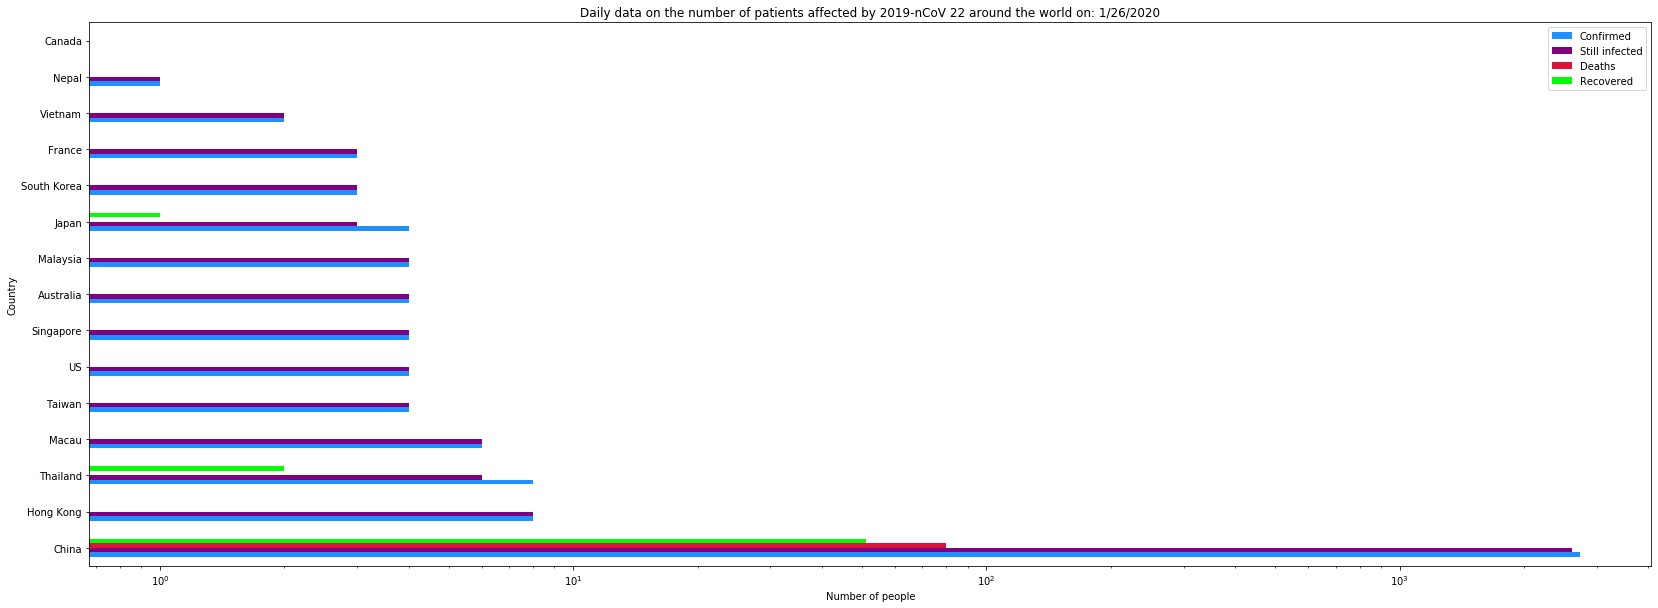

In [0]:
df = create_bar_chart(dict_date['1/26/2020 23:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/26/2020')

## 1/27/2020 20:30

>### Data table

In [0]:
pd.DataFrame(dict_date['1/27/2020 20:30'],[i+1 for i in range(len(dict_date['1/27/2020 20:30']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/27/2020 20:30,China,1/27/2020 20:30,4411,4244,107,60
2,1/27/2020 20:30,Hong Kong,1/27/2020 20:30,8,8,0,0
3,1/27/2020 20:30,Thailand,1/27/2020 20:30,8,6,0,2
4,1/27/2020 20:30,Macau,1/27/2020 20:30,6,6,0,0
5,1/27/2020 20:30,Taiwan,1/27/2020 20:30,5,5,0,0
6,1/27/2020 20:30,Singapore,1/27/2020 20:30,5,5,0,0
7,1/27/2020 20:30,Australia,1/27/2020 20:30,5,5,0,0
8,1/27/2020 20:30,US,1/27/2020 20:30,4,4,0,0
9,1/27/2020 20:30,South Korea,1/27/2020 20:30,4,4,0,0
10,1/27/2020 20:30,Malaysia,1/27/2020 20:30,4,4,0,0


>### Data graph

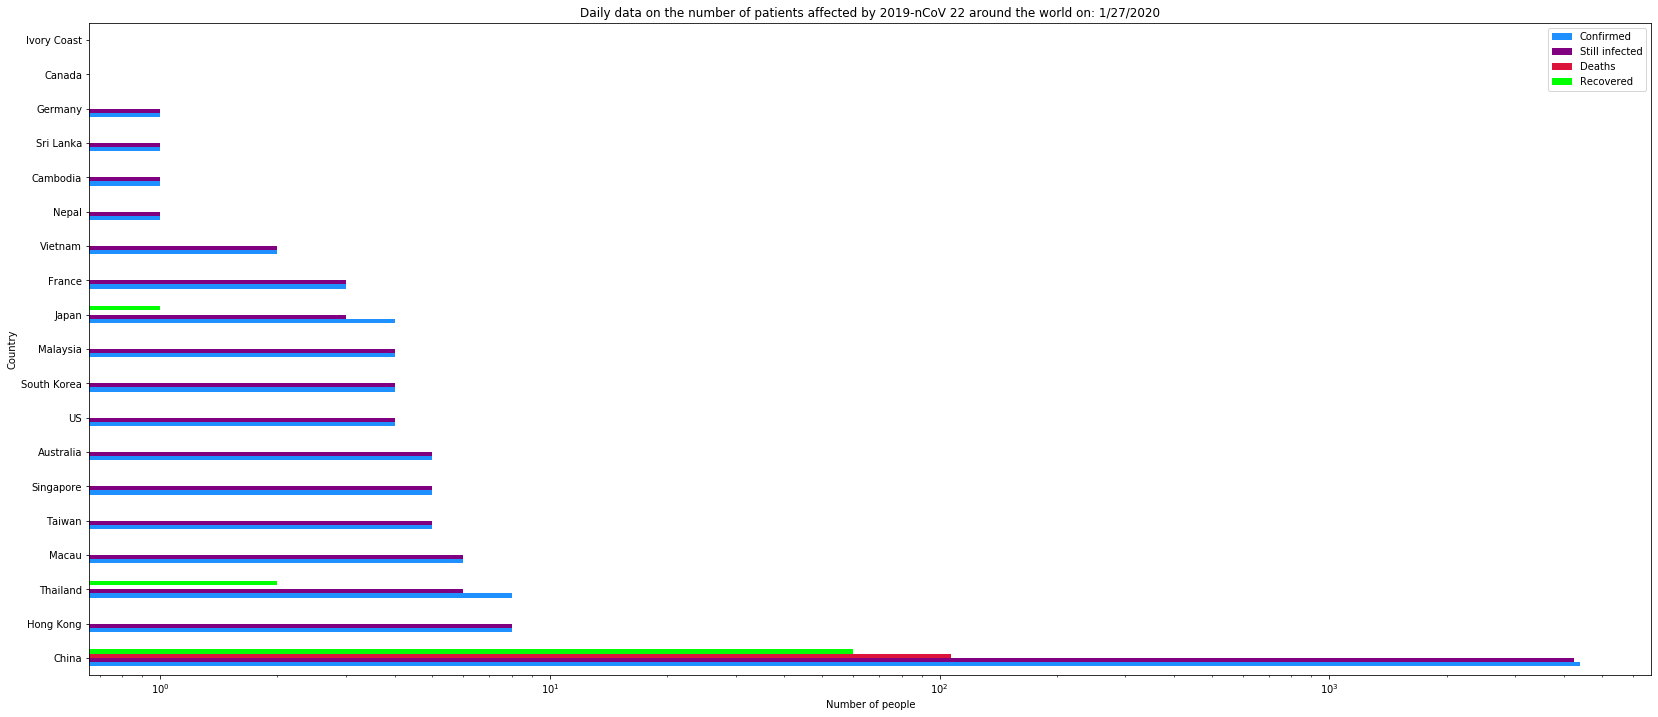

In [0]:
df = create_bar_chart(dict_date['1/27/2020 20:30'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/27/2020')

## 1/28/2020 23:00	

>### Data table

In [0]:
pd.DataFrame(dict_date['1/28/2020 23:00'],[i+1 for i in range(len(dict_date['1/28/2020 23:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/28/2020 23:00,China,1/28/2020 23:00,5972,5736,132,104
2,1/28/2020 23:00,Thailand,1/28/2020 23:00,14,9,0,5
3,1/28/2020 23:00,Hong Kong,1/28/2020 23:00,8,8,0,0
4,1/28/2020 23:00,Taiwan,1/28/2020 23:00,8,8,0,0
5,1/28/2020 23:00,Macau,1/28/2020 23:00,7,7,0,0
6,1/28/2020 23:00,Singapore,1/28/2020 23:00,7,7,0,0
7,1/28/2020 23:00,Malaysia,1/28/2020 23:00,7,7,0,0
8,1/28/2020 23:00,Japan,1/28/2020 23:00,7,6,0,1
9,1/28/2020 23:00,Australia,1/28/2020 23:00,5,5,0,0
10,1/28/2020 23:00,US,1/28/2020 23:00,4,4,0,0


>### Data graph

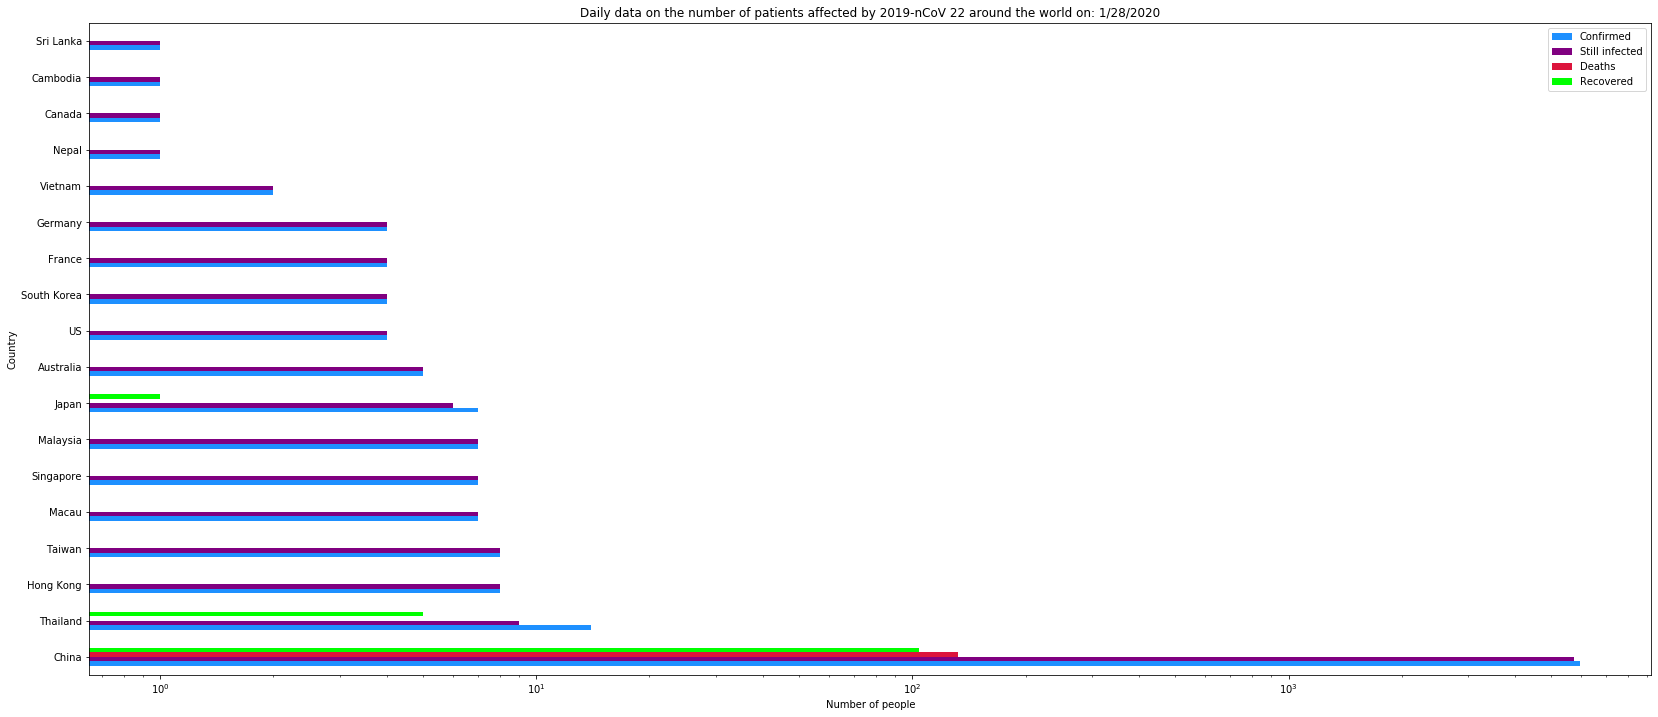

In [0]:
df = create_bar_chart(dict_date['1/28/2020 23:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/28/2020')

## 1/29/2020 21:00

>### Data table

In [0]:
pd.DataFrame(dict_date['1/29/2020 21:00'],[i+1 for i in range(len(dict_date['1/29/2020 21:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/29/2020 21:00,China,1/29/2020 21:00,7680,7383,170,127
2,1/29/2020 21:00,Thailand,1/29/2020 21:00,14,9,0,5
3,1/29/2020 21:00,Japan,1/29/2020 21:00,11,10,0,1
4,1/29/2020 21:00,Hong Kong,1/29/2020 21:00,10,10,0,0
5,1/29/2020 21:00,Singapore,1/29/2020 21:00,10,10,0,0
6,1/29/2020 21:00,Taiwan,1/29/2020 21:00,8,8,0,0
7,1/29/2020 21:00,Macau,1/29/2020 21:00,7,7,0,0
8,1/29/2020 21:00,Malaysia,1/29/2020 21:00,7,7,0,0
9,1/29/2020 21:00,Australia,1/29/2020 21:00,7,7,0,0
10,1/29/2020 21:00,France,1/29/2020 21:00,5,5,0,0


>### Data graph

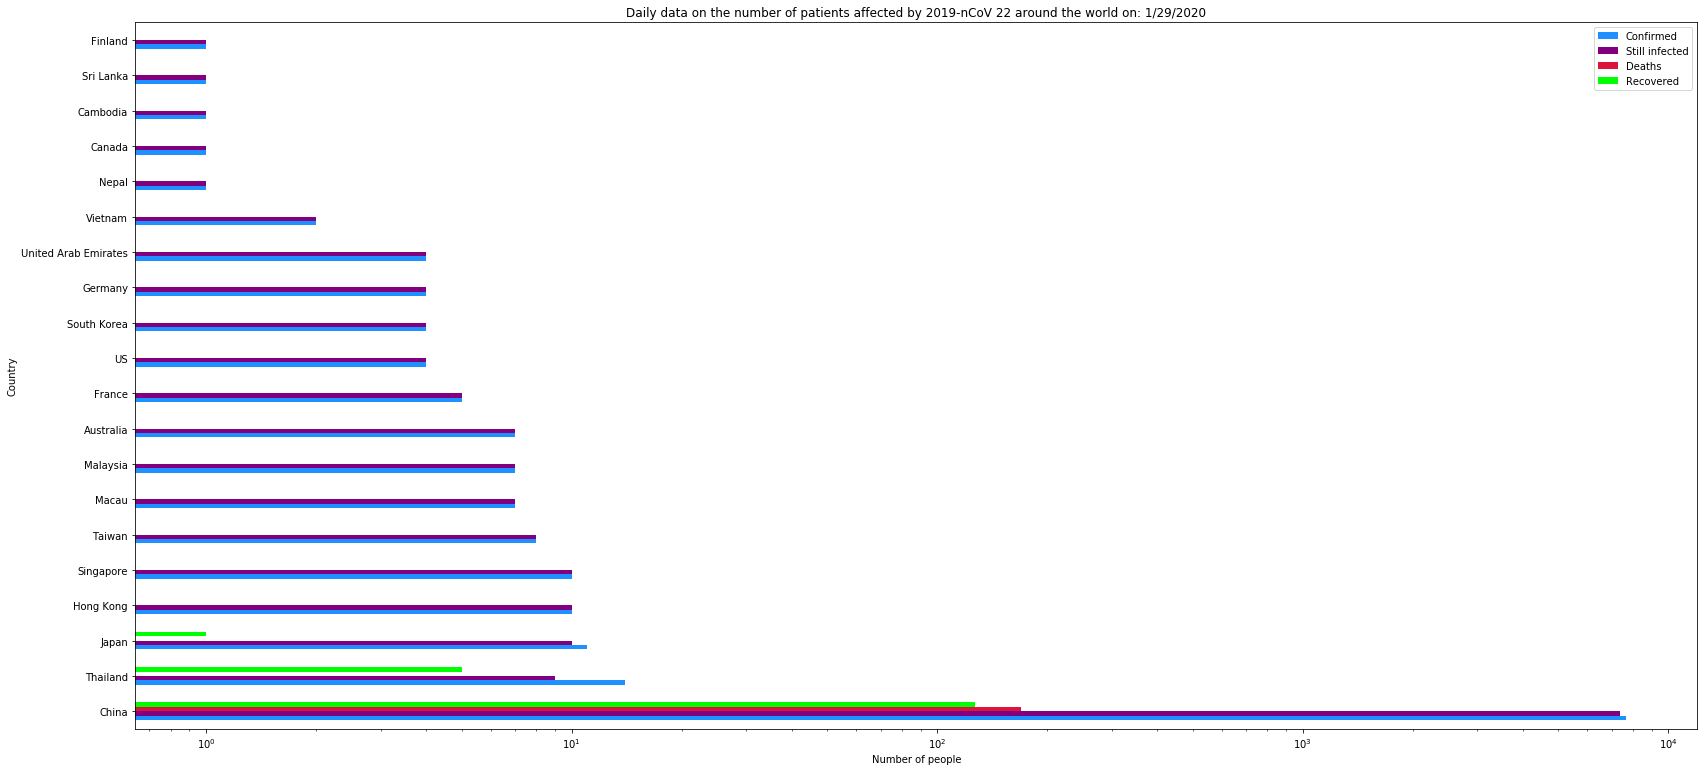

In [0]:
df = create_bar_chart(dict_date['1/29/2020 21:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/29/2020')

## 1/30/2020 21:30	

>### Data table

In [0]:
pd.DataFrame(dict_date['1/30/2020 21:30'],[i+1 for i in range(len(dict_date['1/30/2020 21:30']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/30/2020 21:30,China,1/30/2020 21:30,9660,9268,213,179
2,1/30/2020 21:30,Thailand,1/30/2020 21:30,14,9,0,5
3,1/30/2020 21:30,Hong Kong,1/30/2020 21:30,12,12,0,0
4,1/30/2020 21:30,Japan,1/30/2020 21:30,11,10,0,1
5,1/30/2020 21:30,Singapore,1/30/2020 21:30,10,10,0,0
6,1/30/2020 21:30,Taiwan,1/30/2020 21:30,9,9,0,0
7,1/30/2020 21:30,Australia,1/30/2020 21:30,9,7,0,2
8,1/30/2020 21:30,Malaysia,1/30/2020 21:30,8,8,0,0
9,1/30/2020 21:30,Macau,1/30/2020 21:30,7,7,0,0
10,1/30/2020 21:30,South Korea,1/30/2020 21:30,6,6,0,0


>### Data graph

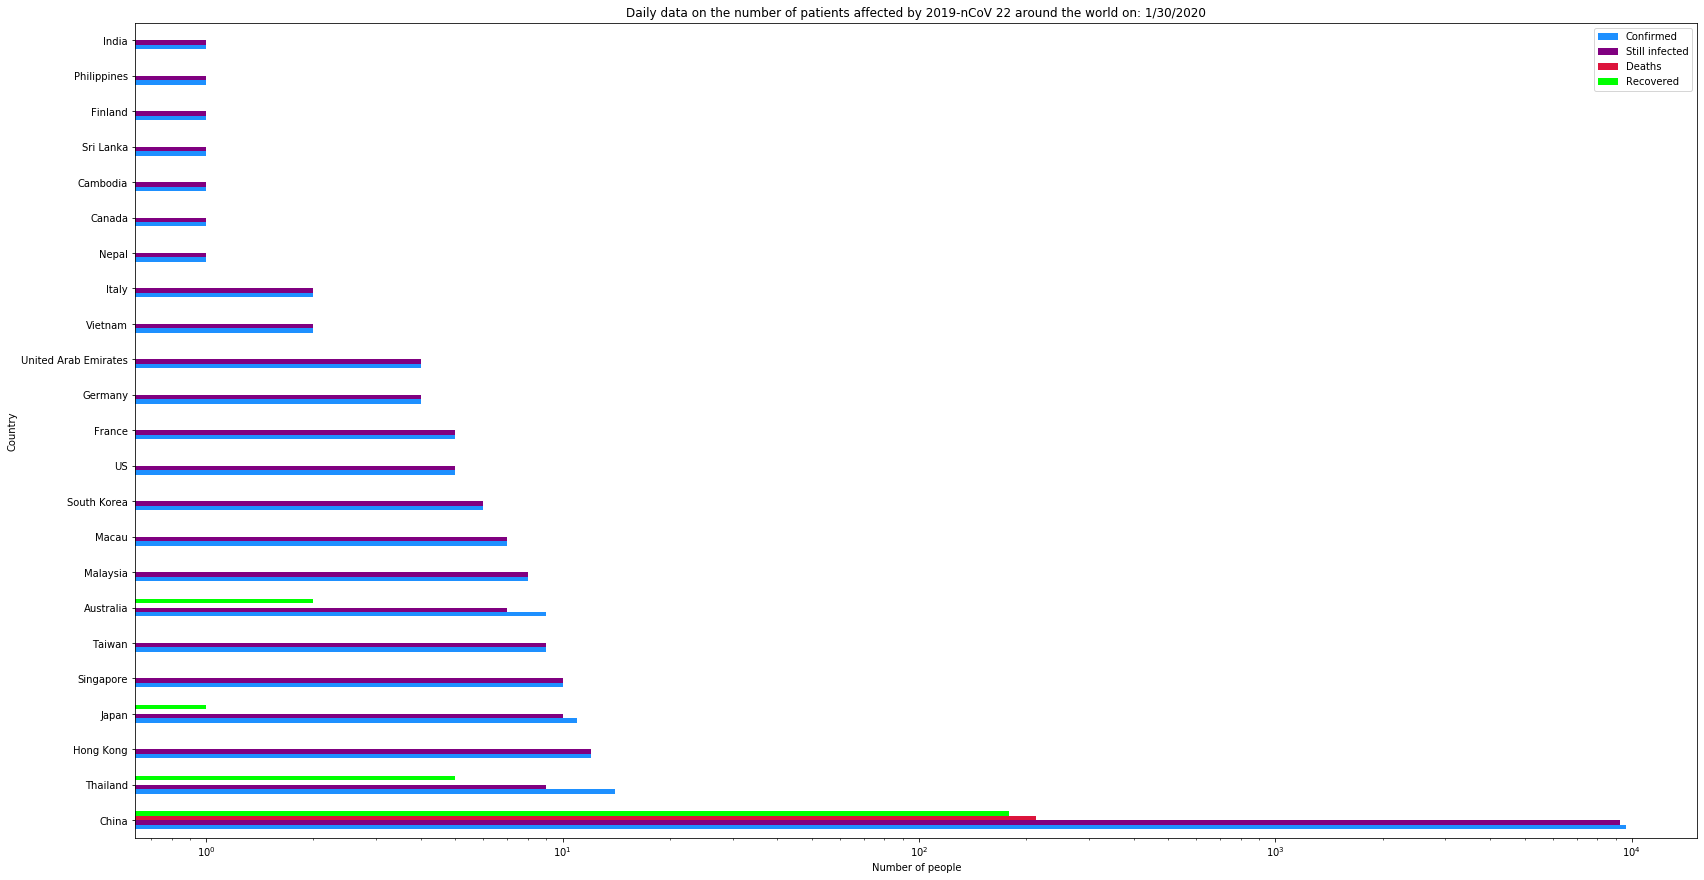

In [0]:
df = create_bar_chart(dict_date['1/30/2020 21:30'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/30/2020')

## 1/31/2020 19:00

>### Data table

In [0]:
pd.DataFrame(dict_date['1/31/2020 19:00'],[i+1 for i in range(len(dict_date['1/31/2020 19:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/31/2020 19:00,China,1/31/2020 19:00,11223,10722,259,242
2,1/31/2020 19:00,Thailand,1/31/2020 19:00,19,12,0,7
3,1/31/2020 19:00,Japan,1/31/2020 19:00,17,16,0,1
4,1/31/2020 19:00,Singapore,1/31/2020 19:00,16,16,0,0
5,1/31/2020 19:00,Hong Kong,1/31/2020 19:00,13,13,0,0
6,1/31/2020 19:00,South Korea,1/31/2020 19:00,11,11,0,0
7,1/31/2020 19:00,Taiwan,1/31/2020 19:00,10,10,0,0
8,1/31/2020 19:00,Australia,1/31/2020 19:00,9,7,0,2
9,1/31/2020 19:00,Malaysia,1/31/2020 19:00,8,8,0,0
10,1/31/2020 19:00,Macau,1/31/2020 19:00,7,7,0,0


>### Data graph

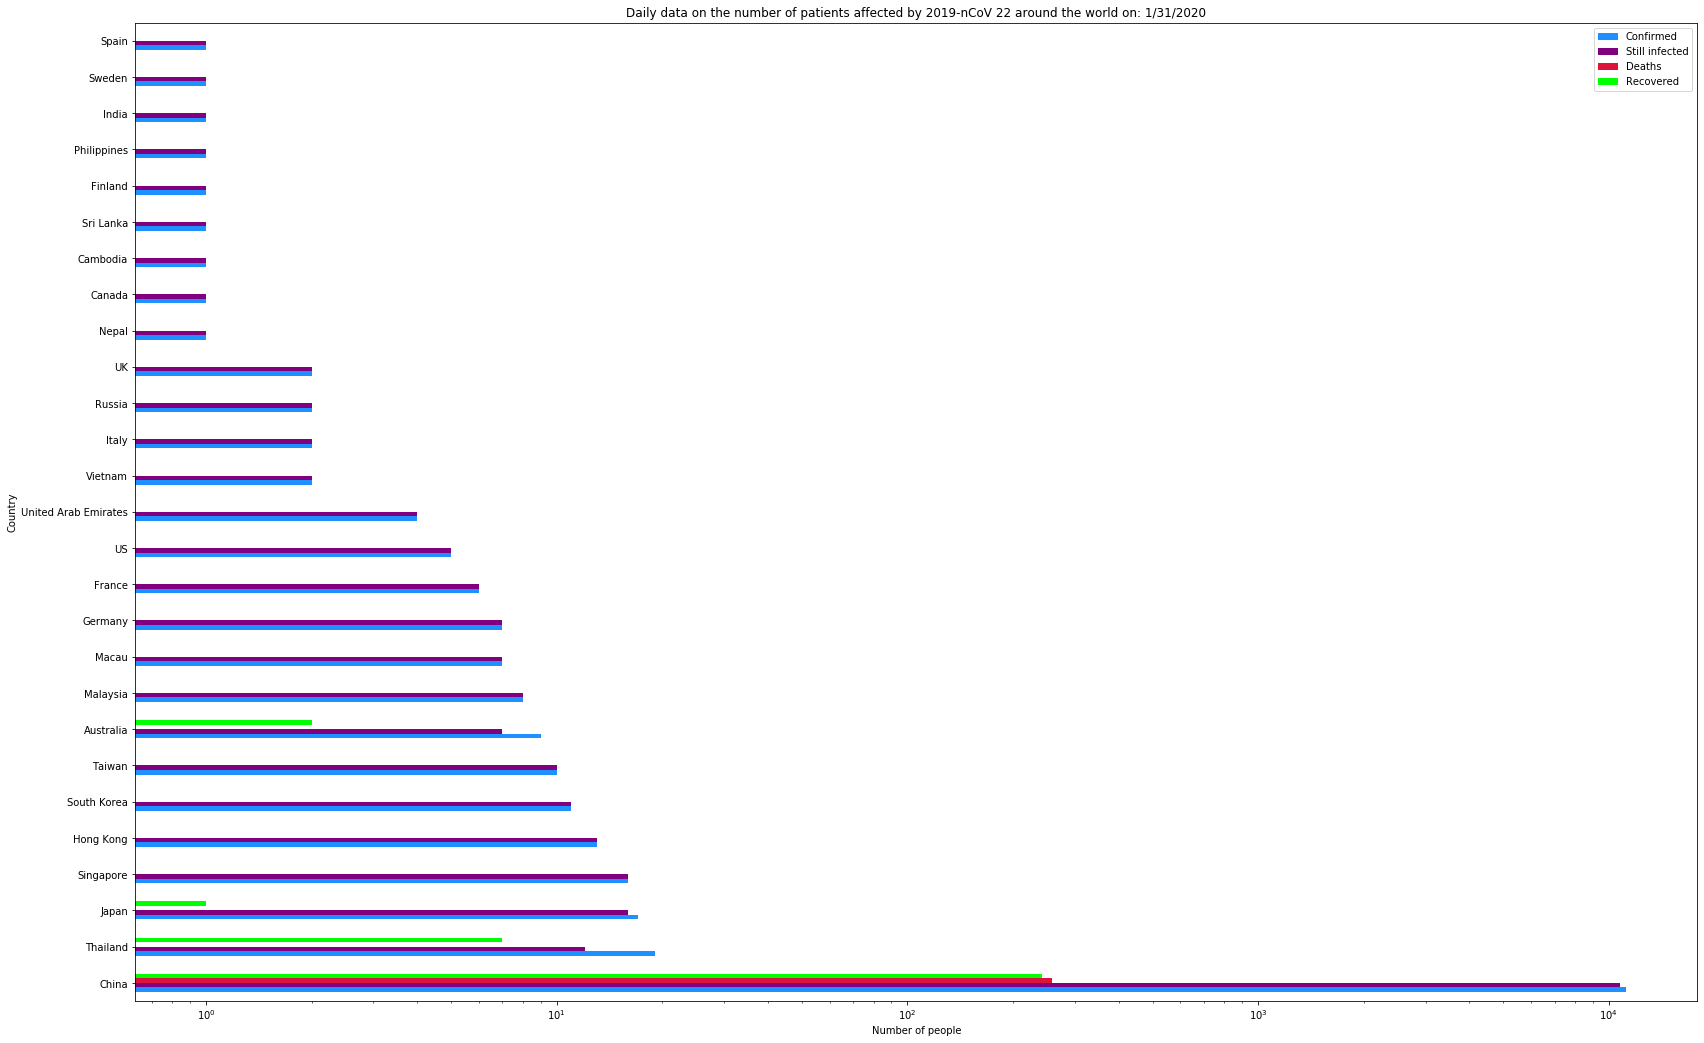

In [0]:
df = create_bar_chart(dict_date['1/31/2020 19:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 1/31/2020')

## 2/1/2020 23:00

>### Data table

In [0]:
pd.DataFrame(dict_date['2/1/2020 23:00'],[i+1 for i in range(len(dict_date['2/1/2020 23:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/1/2020 23:00,China,2/2/2020 2:13,14377,13742,304,331
2,2/1/2020 23:00,Japan,1/2/2020 18:53,20,19,0,1
3,2/1/2020 23:00,Thailand,1/31/2020 10:37,19,14,0,5
4,2/1/2020 23:00,Singapore,2/2/2020 1:03,18,18,0,0
5,2/1/2020 23:00,South Korea,2/2/2020 2:23,15,15,0,0
6,2/1/2020 23:00,Hong Kong,2/2/2020 1:03,14,14,0,0
7,2/1/2020 23:00,Australia,1/2/2020 18:12,12,10,0,2
8,2/1/2020 23:00,Taiwan,1/31/2020 15:20,10,10,0,0
9,2/1/2020 23:00,Germany,1/2/2020 23:33,8,8,0,0
10,2/1/2020 23:00,Malaysia,1/31/2020 8:15,8,8,0,0


>### Data graph

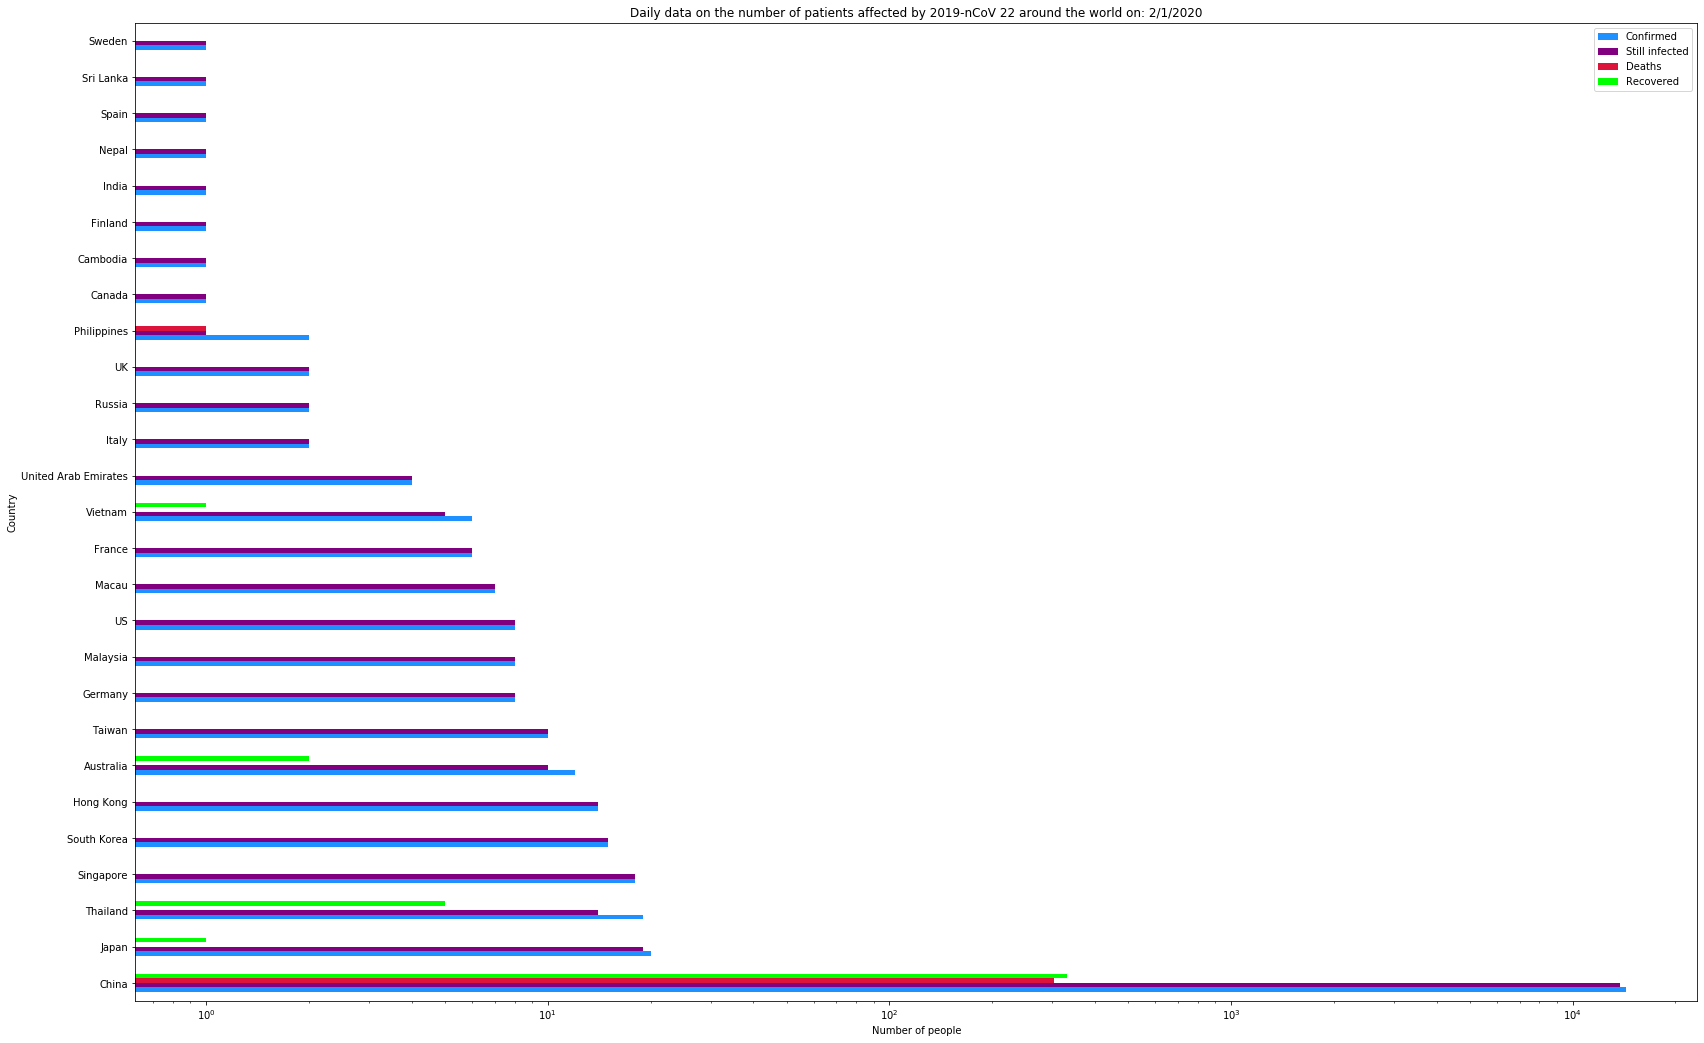

In [0]:
df = create_bar_chart(dict_date['2/1/2020 23:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/1/2020')

## 2/2/2020 21:00

>### Data table

In [0]:
pd.DataFrame(dict_date['2/2/2020 21:00'],[i+1 for i in range(len(dict_date['2/2/2020 21:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/2/2020 21:00,China,3/2/2020 1:33,17116,16277,361,478
2,2/2/2020 21:00,Japan,1/2/2020 18:53,20,19,0,1
3,2/2/2020 21:00,Thailand,1/31/2020 10:37,19,14,0,5
4,2/2/2020 21:00,Singapore,2/2/2020 1:03,18,18,0,0
5,2/2/2020 21:00,Hong Kong,2/2/2020 23:53,15,15,0,0
6,2/2/2020 21:00,South Korea,2/2/2020 2:23,15,15,0,0
7,2/2/2020 21:00,Australia,2/2/2020 22:33,12,10,0,2
8,2/2/2020 21:00,Germany,2/2/2020 18:03,10,10,0,0
9,2/2/2020 21:00,Taiwan,1/31/2020 15:20,10,10,0,0
10,2/2/2020 21:00,US,1/2/2020 19:43,9,9,0,0


>### Data graph

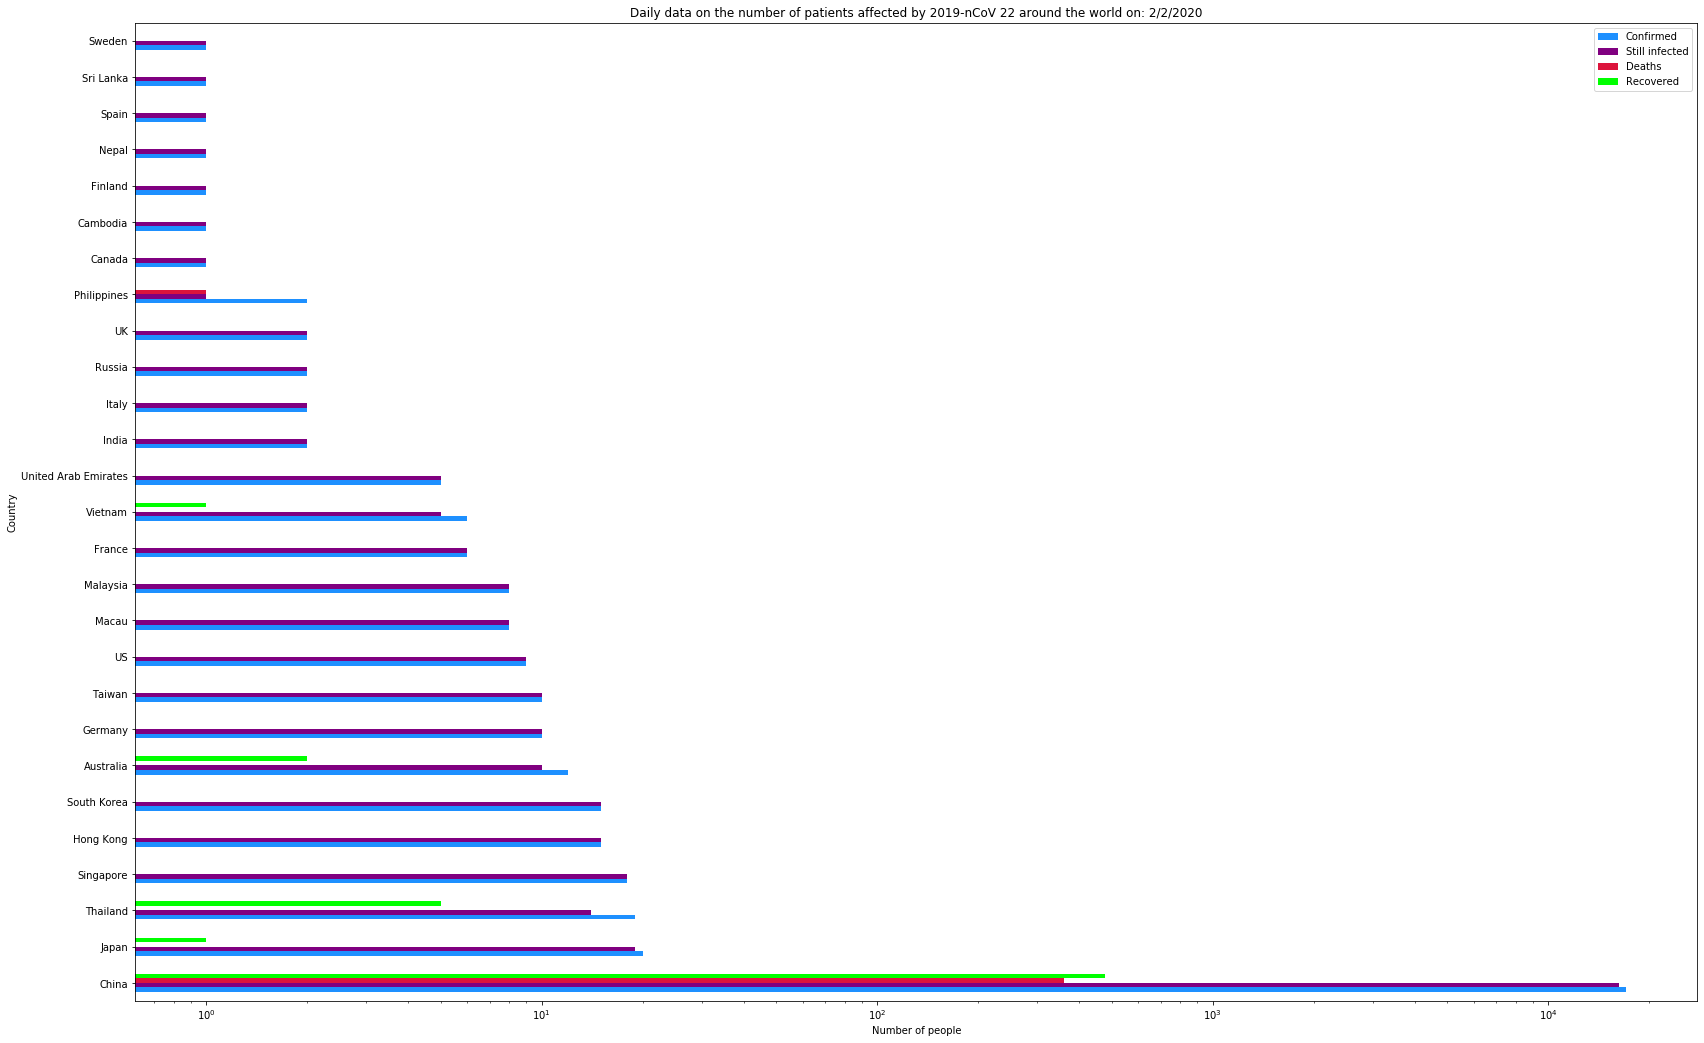

In [0]:
df = create_bar_chart(dict_date['2/2/2020 21:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/2/2020')

## 2/3/2020 21:40




>### Data table

In [0]:
pd.DataFrame(dict_date['2/3/2020 21:40'],[i+1 for i in range(len(dict_date['2/3/2020 21:40']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/3/2020 21:40,China,4/2/2020 1:43,20402,19342,425,635
2,2/3/2020 21:40,Japan,1/2/2020 18:53,20,19,0,1
3,2/3/2020 21:40,Thailand,1/31/2020 10:37,19,14,0,5
4,2/3/2020 21:40,Singapore,2/2/2020 1:03,18,18,0,0
5,2/3/2020 21:40,Hong Kong,2/2/2020 23:53,15,15,0,0
6,2/3/2020 21:40,South Korea,2/2/2020 2:23,15,15,0,0
7,2/3/2020 21:40,Germany,3/2/2020 20:53,12,12,0,0
8,2/3/2020 21:40,Australia,2/2/2020 22:33,12,10,0,2
9,2/3/2020 21:40,US,3/2/2020 3:53,11,11,0,0
10,2/3/2020 21:40,Taiwan,1/31/2020 15:20,10,10,0,0


>### Data graph

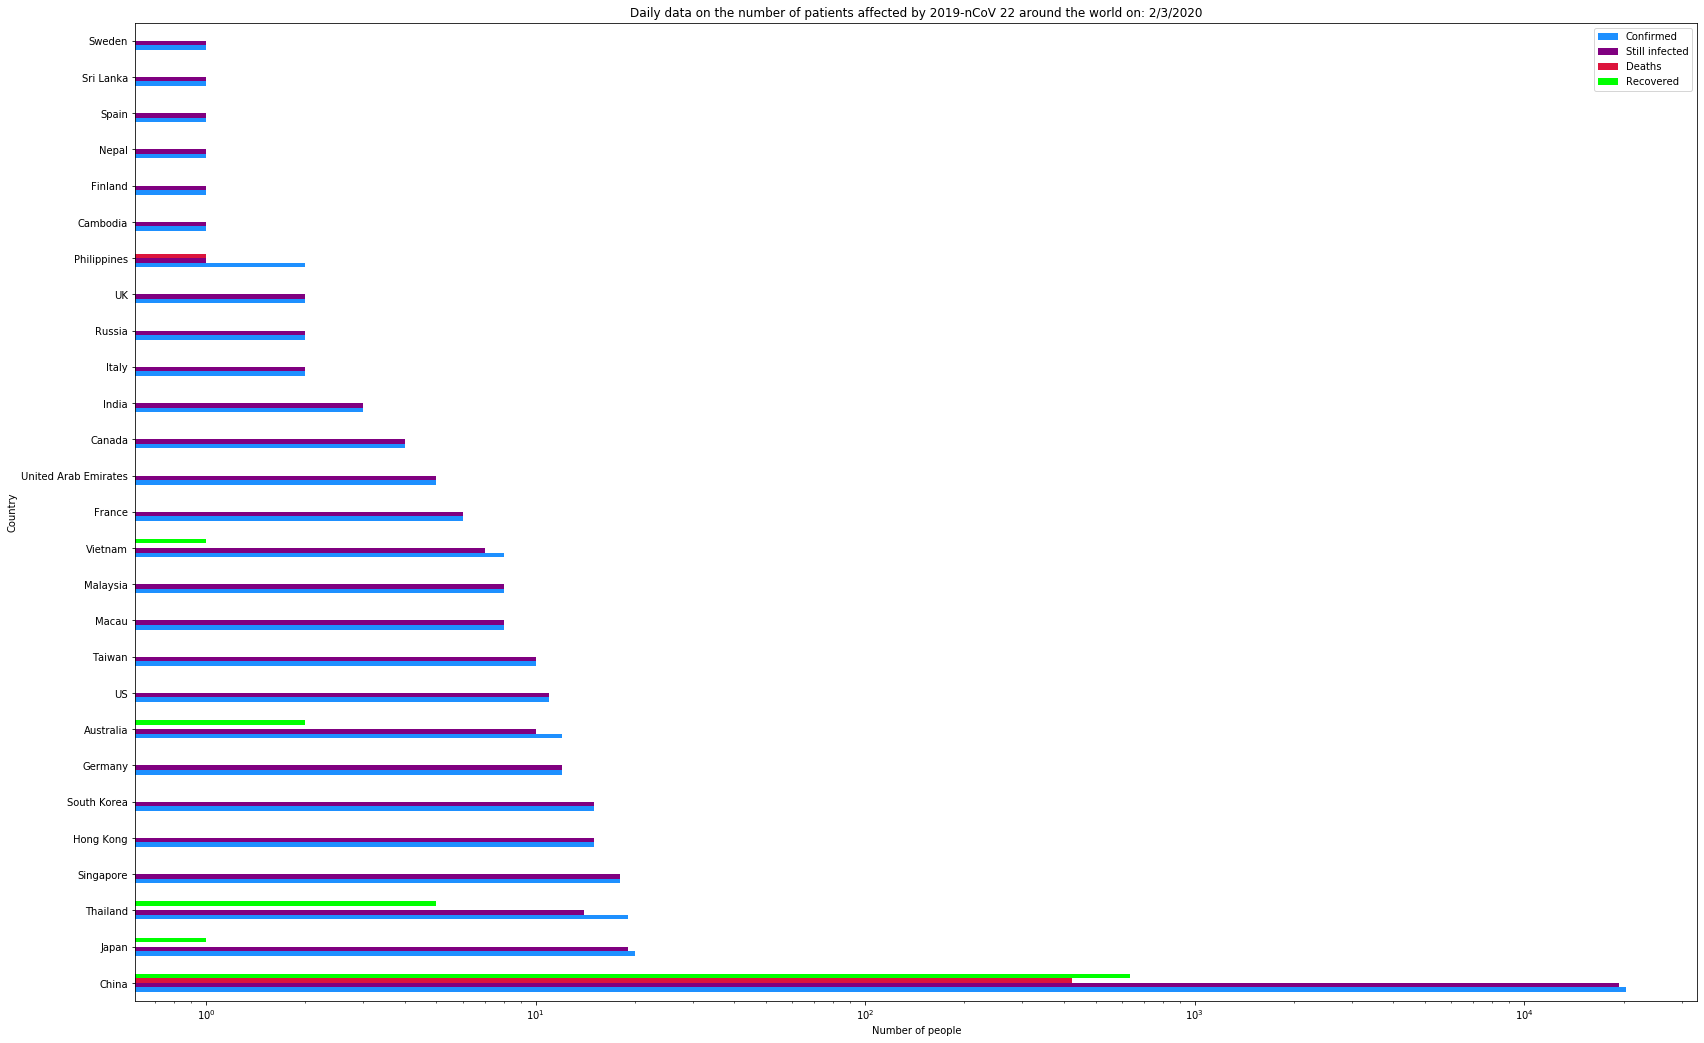

In [0]:
df = create_bar_chart(dict_date['2/3/2020 21:40'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/3/2020')

## 2/4/2020 22:00

>### Data table

In [0]:
pd.DataFrame(dict_date['2/4/2020 22:00'],[i+1 for i in range(len(dict_date['2/4/2020 22:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/4/2020 22:00,China,5/2/2020 1:33,24292,22912,490,890
2,2/4/2020 22:00,Thailand,4/2/2020 15:33,25,20,0,5
3,2/4/2020 22:00,Singapore,4/2/2020 15:33,24,24,0,0
4,2/4/2020 22:00,Japan,4/2/2020 16:43,22,21,0,1
5,2/4/2020 22:00,Hong Kong,5/2/2020 2:33,18,17,1,0
6,2/4/2020 22:00,South Korea,4/2/2020 15:33,16,16,0,0
7,2/4/2020 22:00,Australia,2/2/2020 22:33,13,11,0,2
8,2/4/2020 22:00,Germany,3/2/2020 20:53,12,12,0,0
9,2/4/2020 22:00,Taiwan,4/2/2020 14:53,11,11,0,0
10,2/4/2020 22:00,US,3/2/2020 3:53,11,11,0,0


>### Data graph

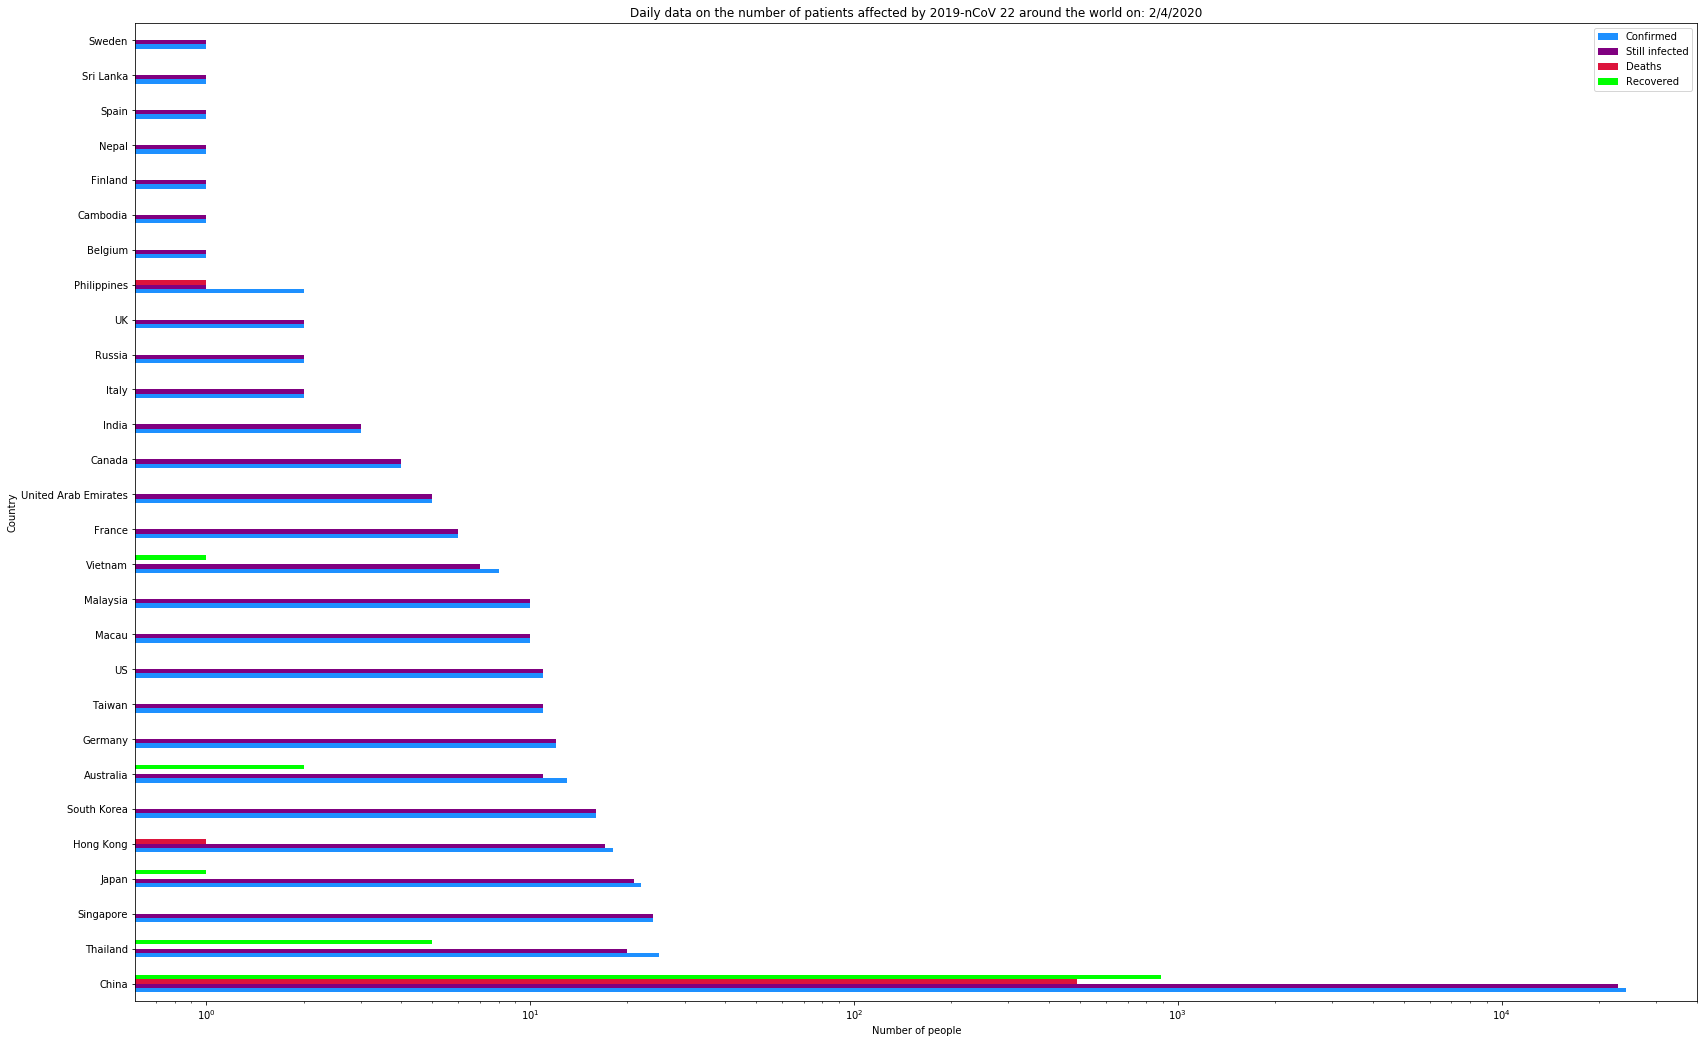

In [0]:
df = create_bar_chart(dict_date['2/4/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/4/2020')

## 2/5/2020 12:20

>### Data table

In [0]:
pd.DataFrame(dict_date['2/5/2020 12:20'],[i+1 for i in range(len(dict_date['2/5/2020 12:20']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/5/2020 12:20,China,5/2/2020 15:13,24407,22895,492,1020
2,2/5/2020 12:20,Singapore,5/2/2020 16:33,28,28,0,0
3,2/5/2020 12:20,Thailand,4/2/2020 15:33,25,20,0,5
4,2/5/2020 12:20,Japan,4/2/2020 16:43,22,21,0,1
5,2/5/2020 12:20,Hong Kong,5/2/2020 13:13,21,20,1,0
6,2/5/2020 12:20,South Korea,5/2/2020 15:33,19,19,0,0
7,2/5/2020 12:20,Australia,2/2/2020 22:33,13,11,0,2
8,2/5/2020 12:20,Germany,3/2/2020 20:53,12,12,0,0
9,2/5/2020 12:20,Malaysia,5/2/2020 15:43,12,12,0,0
10,2/5/2020 12:20,Taiwan,4/2/2020 14:53,11,11,0,0


>### Data graph

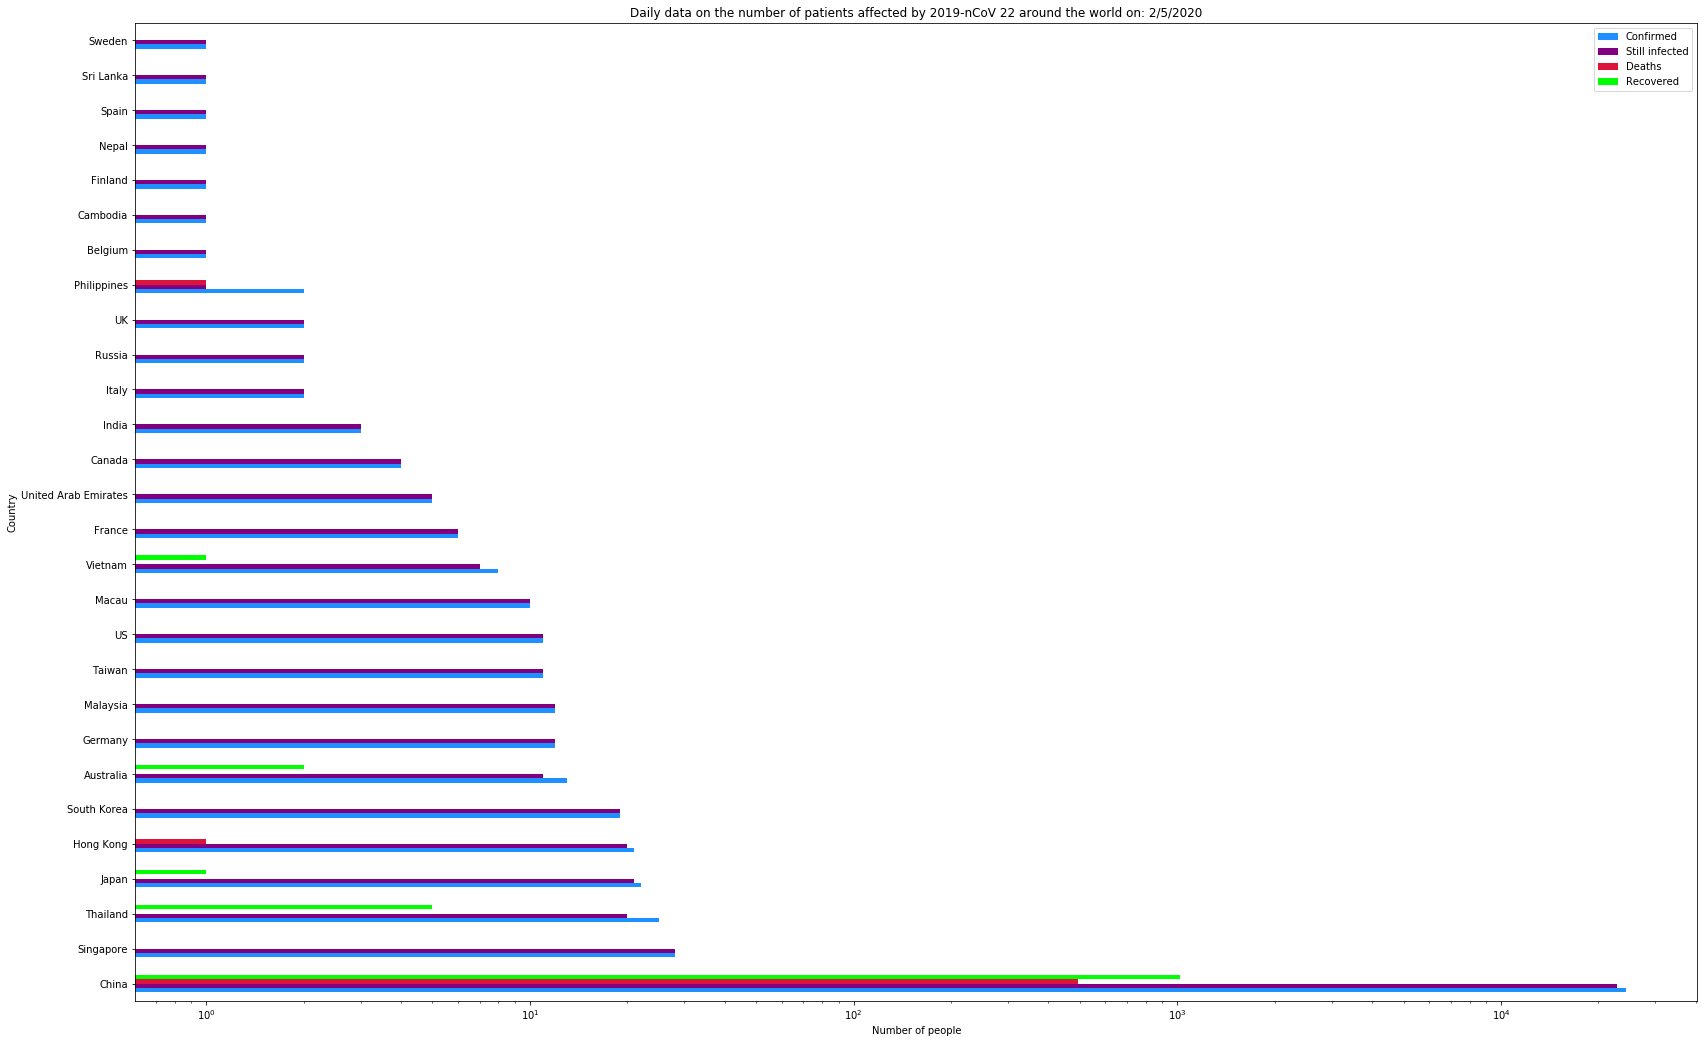

In [0]:
df = create_bar_chart(dict_date['2/5/2020 12:20'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/5/2020')

## 2/6/2020 20:05

>### Data table

In [0]:
pd.DataFrame(dict_date['2/6/2020 20:05'],[i+1 for i in range(len(dict_date['2/6/2020 20:05']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/6/2020 20:05,China,6/2/2020 10:53,30543,28435,632,1476
2,2/6/2020 20:05,Japan,6/2/2020 2:53,45,44,0,1
3,2/6/2020 20:05,Singapore,5/2/2020 16:33,28,28,0,0
4,2/6/2020 20:05,Thailand,4/2/2020 15:33,25,20,0,5
5,2/6/2020 20:05,Hong Kong,6/2/2020 14:43,24,23,1,0
6,2/6/2020 20:05,South Korea,6/2/2020 2:53,23,23,0,0
7,2/6/2020 20:05,Taiwan,6/2/2020 15:03,16,15,0,1
8,2/6/2020 20:05,Australia,2/2/2020 22:33,14,12,0,2
9,2/6/2020 20:05,Germany,3/2/2020 20:53,12,12,0,0
10,2/6/2020 20:05,Malaysia,5/2/2020 15:43,12,12,0,0


>### Data graph

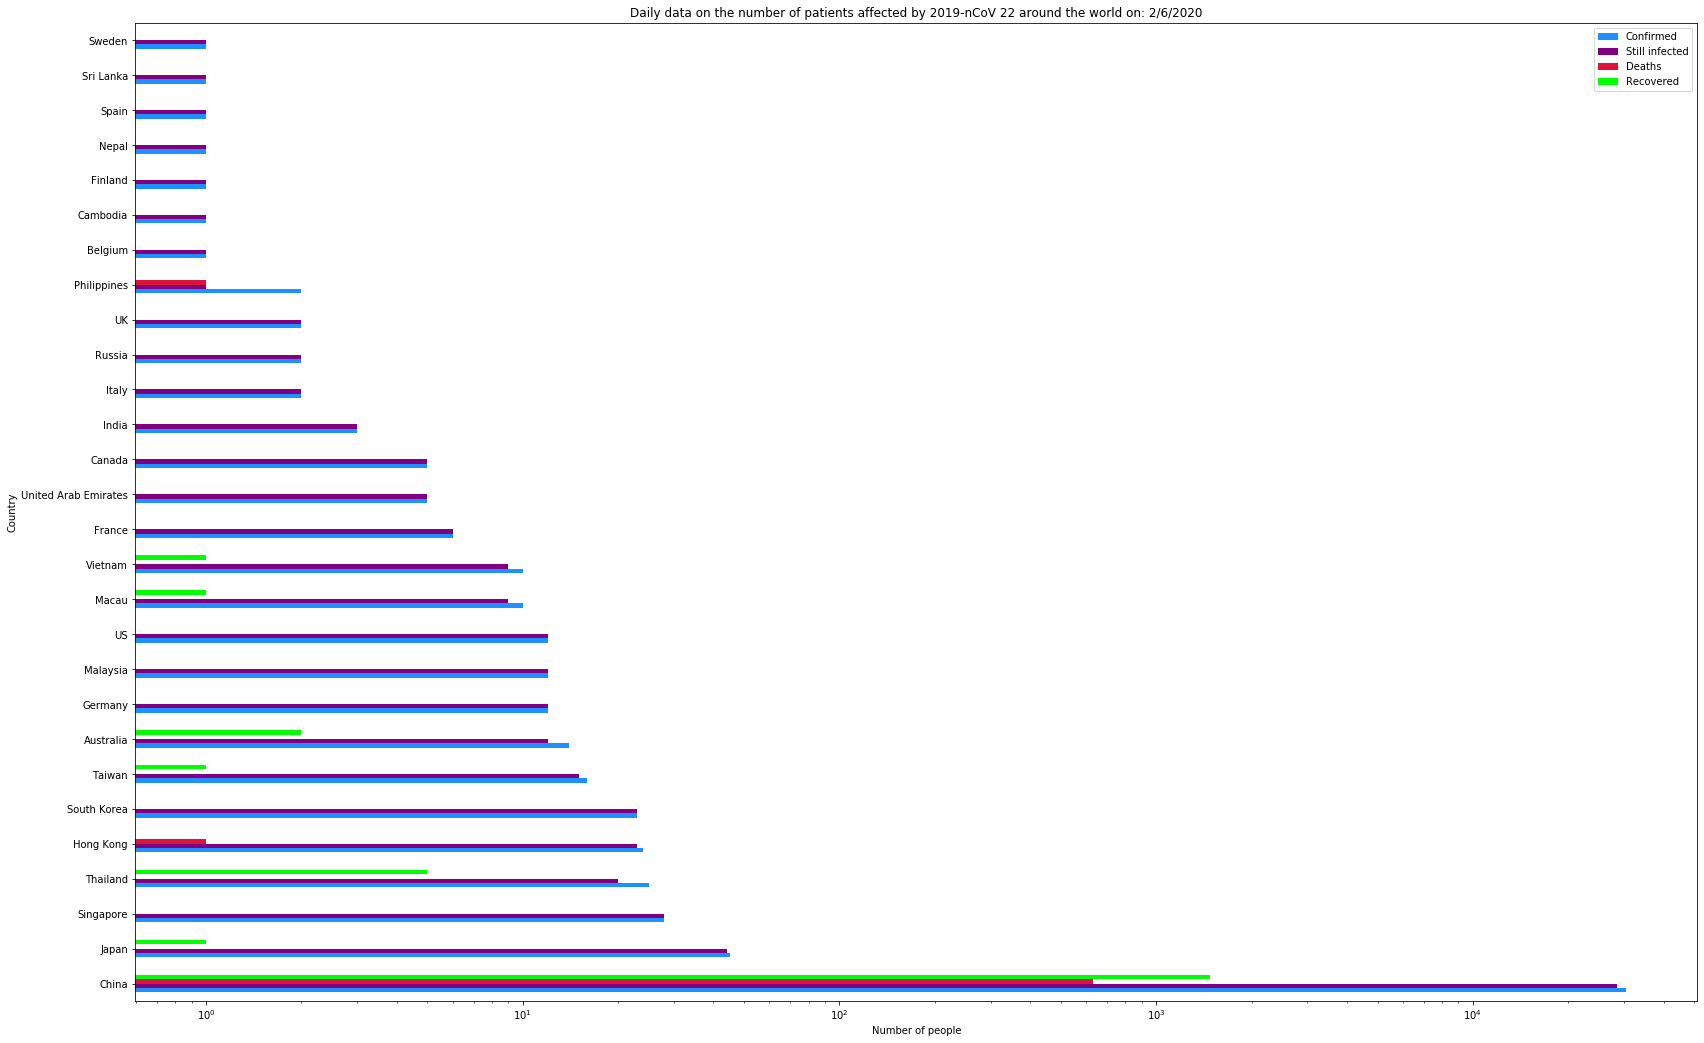

In [0]:
df = create_bar_chart(dict_date['2/6/2020 20:05'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/6/2020')

## 2/7/2020 20:24

>### Data table

In [0]:
pd.DataFrame(dict_date['2/7/2020 20:24'],[i+1 for i in range(len(dict_date['2/7/2020 20:24']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/7/2020 20:24,China,7/2/2020 11:33,31217,28831,636,1750
2,2/7/2020 20:24,Others,7/2/2020 16:33,61,61,0,0
3,2/7/2020 20:24,Singapore,7/2/2020 3:03,30,30,0,0
4,2/7/2020 20:24,Hong Kong,7/2/2020 11:53,25,24,1,0
5,2/7/2020 20:24,Japan,7/2/2020 4:13,25,24,0,1
6,2/7/2020 20:24,Thailand,4/2/2020 15:33,25,20,0,5
7,2/7/2020 20:24,South Korea,7/2/2020 3:03,24,23,0,1
8,2/7/2020 20:24,Taiwan,6/2/2020 15:03,16,15,0,1
9,2/7/2020 20:24,Australia,2/2/2020 22:33,15,13,0,2
10,2/7/2020 20:24,Germany,7/2/2020 16:33,13,13,0,0


>###  Data graph

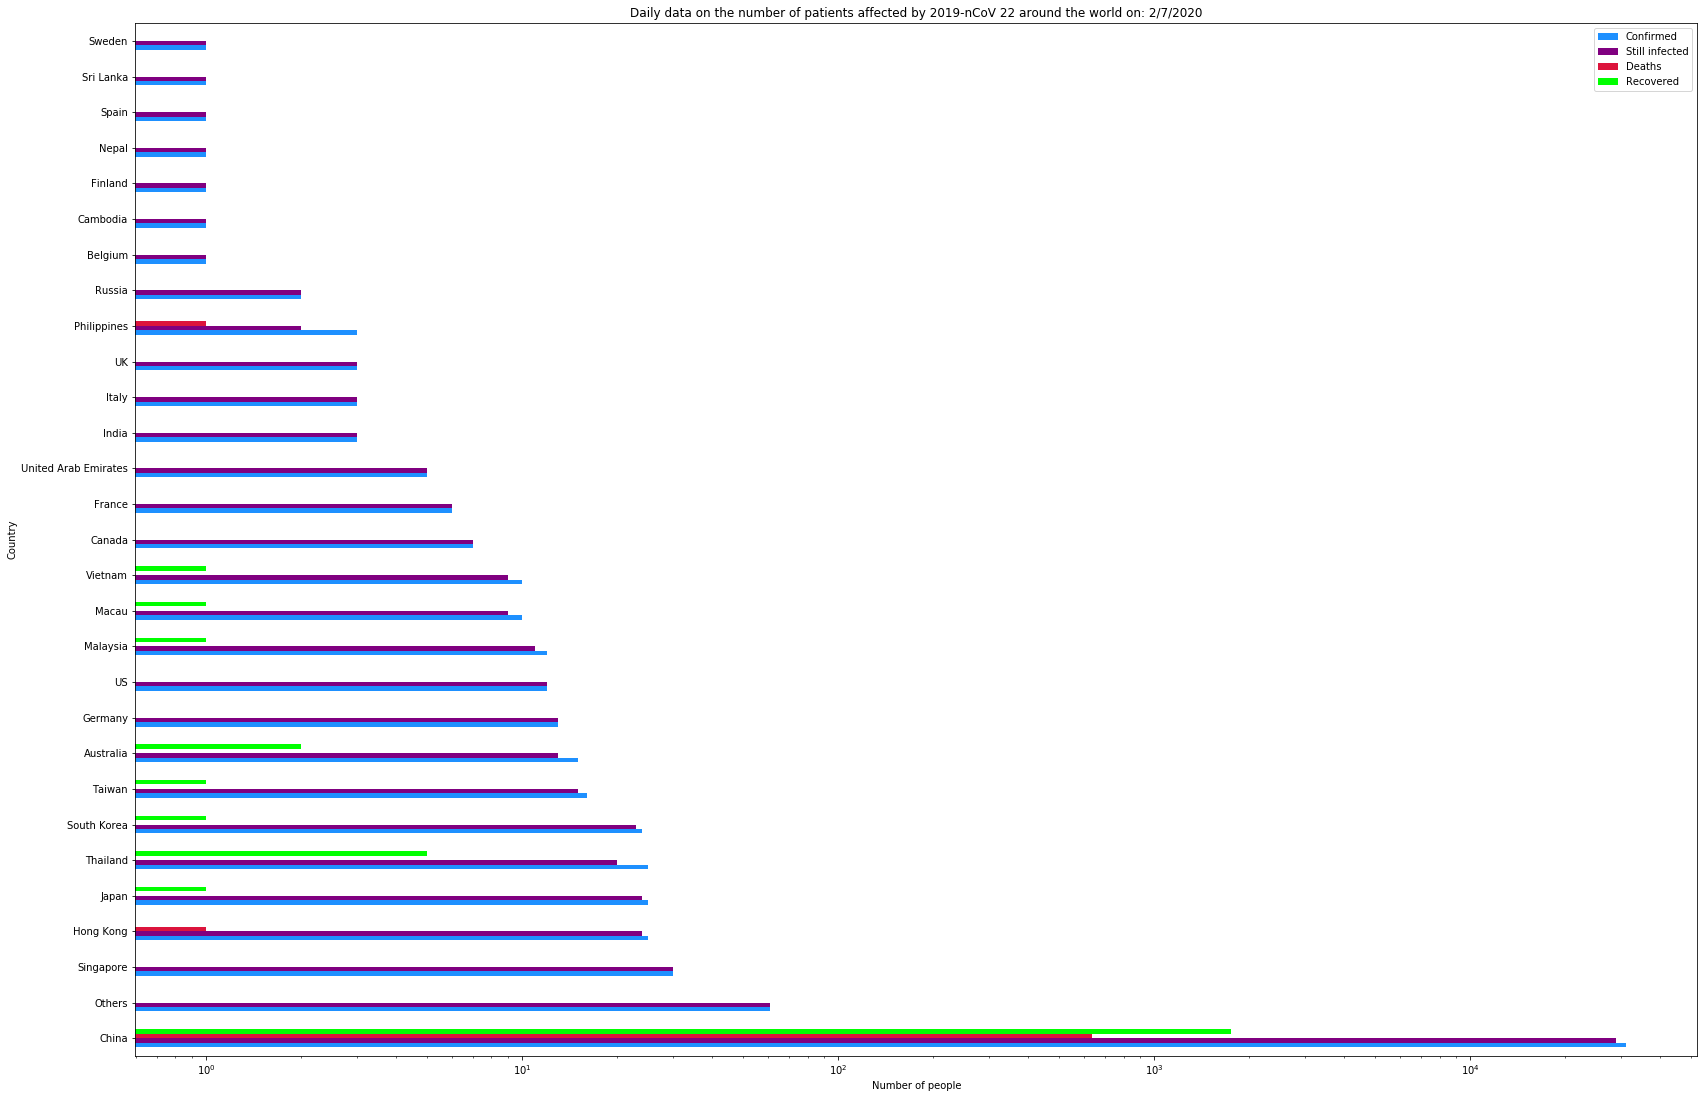

In [0]:
df = create_bar_chart(dict_date['2/7/2020 20:24'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/7/2020')

## 2/8/2020 23:04

>### Data table

In [0]:
pd.DataFrame(dict_date['2/8/2020 23:04'],[i+1 for i in range(len(dict_date['2/8/2020 23:04']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/8/2020 23:04,China,9/2/2020 3:03,37200,33711,811,2678
2,2/8/2020 23:04,Others,7/2/2020 16:33,61,61,0,0
3,2/8/2020 23:04,Singapore,9/2/2020 2:43,40,38,0,2
4,2/8/2020 23:04,Thailand,8/2/2020 12:53,32,22,0,10
5,2/8/2020 23:04,Hong Kong,8/2/2020 0:03,26,25,1,0
6,2/8/2020 23:04,Japan,7/2/2020 4:13,25,24,0,1
7,2/8/2020 23:04,South Korea,9/2/2020 2:33,25,22,0,3
8,2/8/2020 23:04,Taiwan,8/2/2020 5:23,17,16,0,1
9,2/8/2020 23:04,Malaysia,8/2/2020 10:23,16,15,0,1
10,2/8/2020 23:04,Australia,2/2/2020 22:33,15,13,0,2


>### Data graph

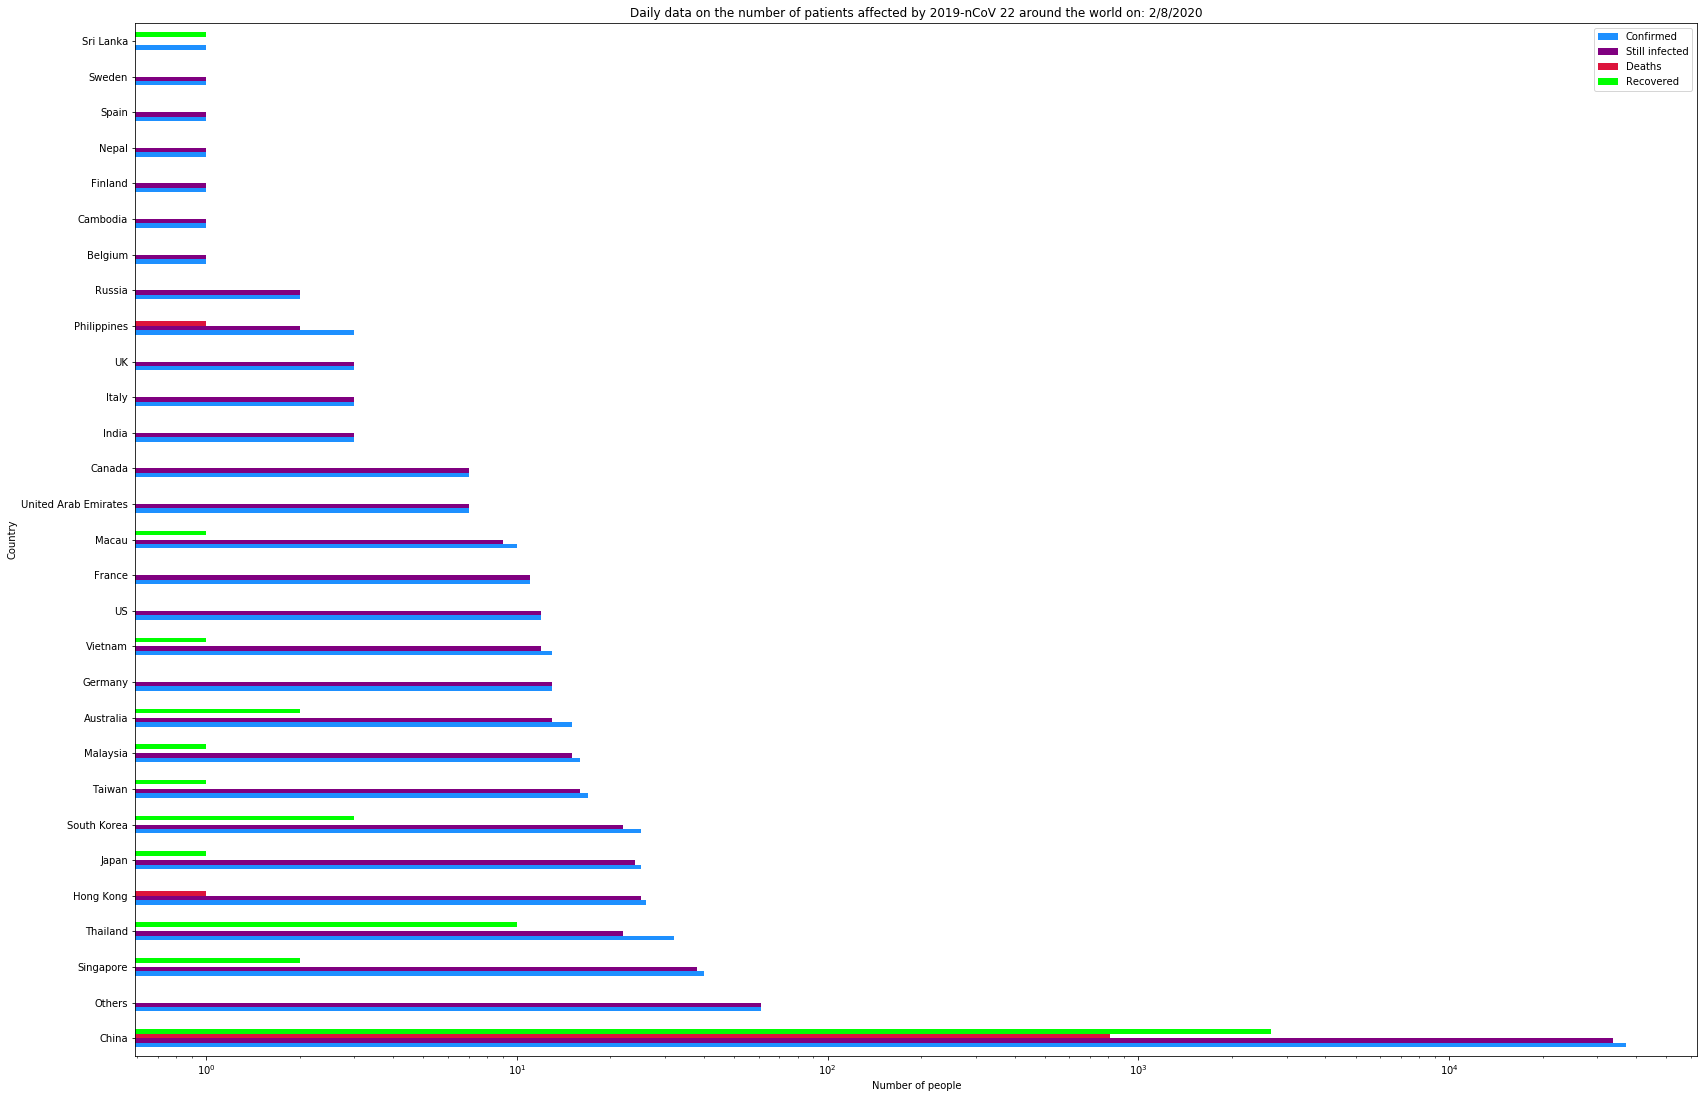

In [0]:
df = create_bar_chart(dict_date['2/8/2020 23:04'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/8/2020')

## 2/9/2020 23:20

>### Data table

In [0]:
pd.DataFrame(dict_date['2/9/2020 23:20'],[i+1 for i in range(len(dict_date['2/9/2020 23:20']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/9/2020 23:20,China,2/10/2020 1:13,40162,35968,908,3286
2,2/9/2020 23:20,Others,2/9/2020 6:13,125,125,0,0
3,2/9/2020 23:20,Singapore,2/10/2020 3:03,43,41,0,2
4,2/9/2020 23:20,Hong Kong,2/10/2020 0:03,36,35,1,0
5,2/9/2020 23:20,Thailand,2/8/2020 12:53,32,22,0,10
6,2/9/2020 23:20,South Korea,2/10/2020 3:03,27,24,0,3
7,2/9/2020 23:20,Japan,2/9/2020 6:13,26,25,0,1
8,2/9/2020 23:20,Malaysia,2/10/2020 3:03,18,17,0,1
9,2/9/2020 23:20,Taiwan,2/9/2020 9:13,18,17,0,1
10,2/9/2020 23:20,Australia,2/2/2020 22:33,15,13,0,2


>### Data graph

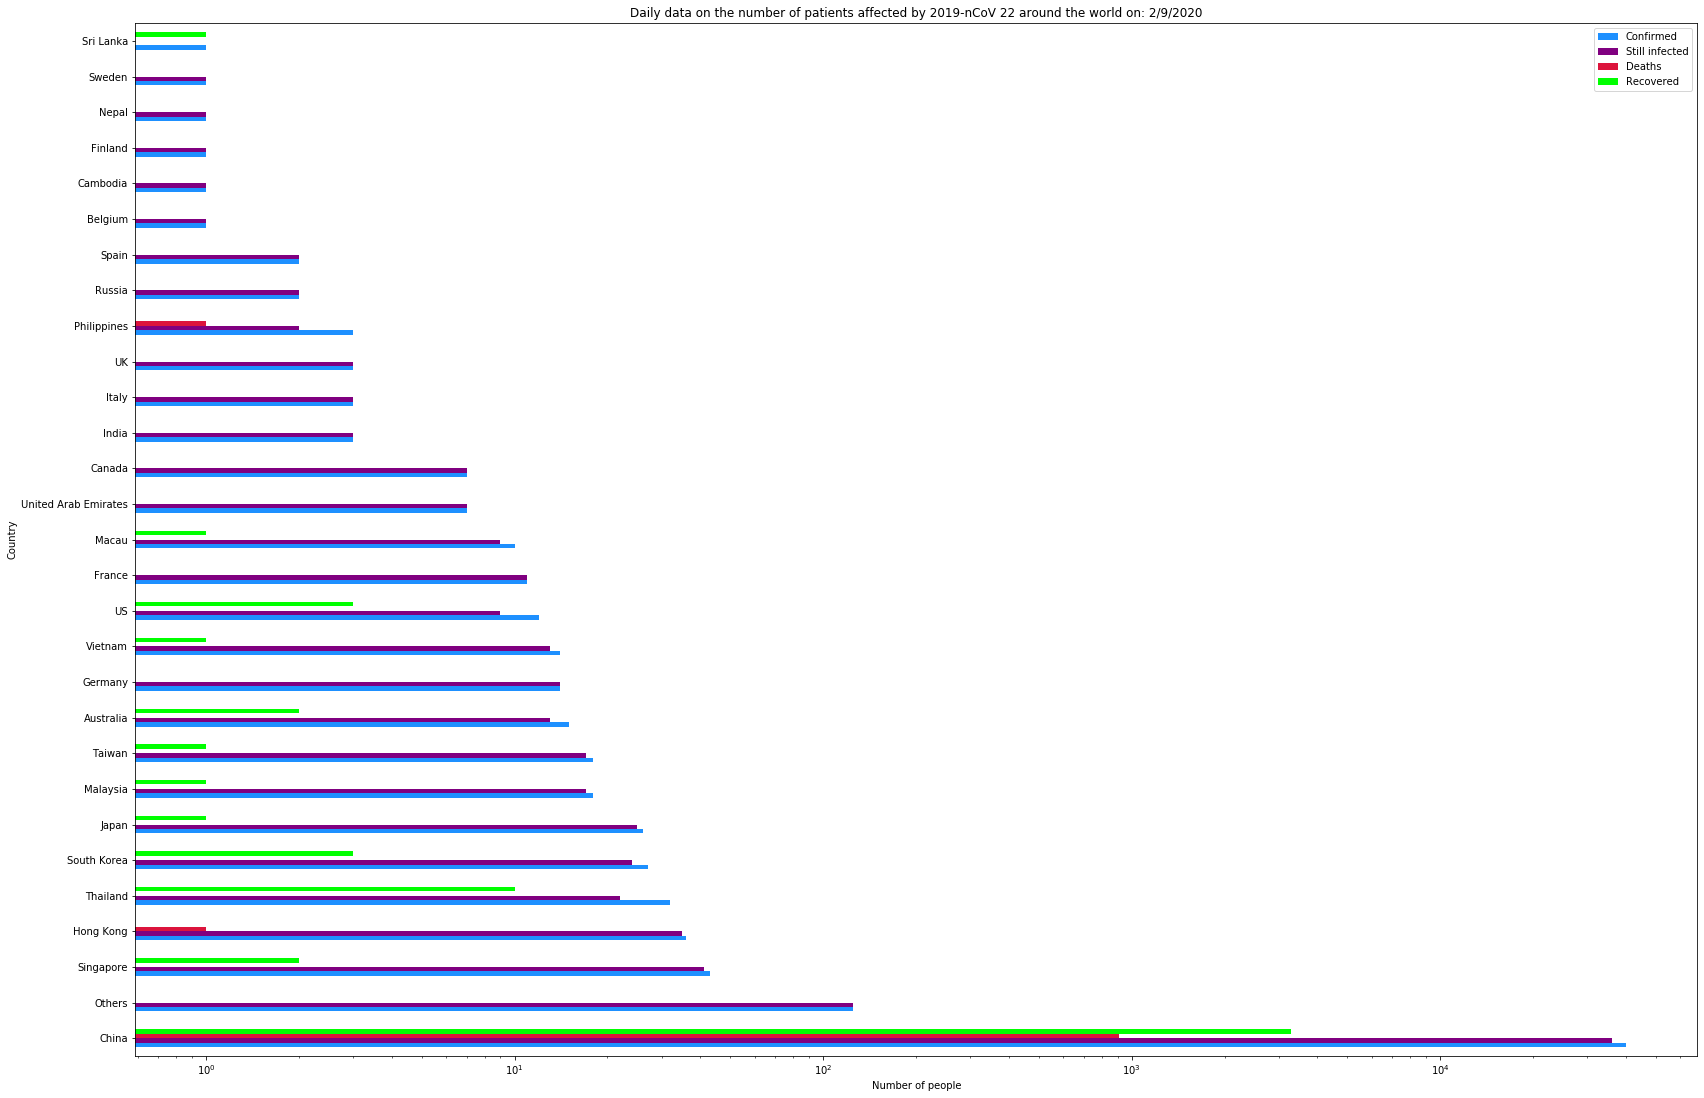

In [0]:
df = create_bar_chart(dict_date['2/9/2020 23:20'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/9/2020')

## 2/10/2020 19:30

>### Data table

In [0]:
pd.DataFrame(dict_date['2/10/2020 19:30'],[i+1 for i in range(len(dict_date['2/10/2020 19:30']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/10/2020 19:30,China,2/10/2020 14:13,42312,37380,1011,3921
2,2/10/2020 19:30,Others,2/10/2020 16:03,196,196,0,0
3,2/10/2020 19:30,Singapore,2/10/2020 19:03,45,43,0,2
4,2/10/2020 19:30,Hong Kong,2/10/2020 10:13,38,37,1,0
5,2/10/2020 19:30,Thailand,2/8/2020 12:53,32,22,0,10
6,2/10/2020 19:30,South Korea,2/10/2020 3:03,27,24,0,3
7,2/10/2020 19:30,Japan,2/10/2020 21:33,26,22,0,4
8,2/10/2020 19:30,Malaysia,2/10/2020 3:03,18,17,0,1
9,2/10/2020 19:30,Taiwan,2/9/2020 9:13,18,17,0,1
10,2/10/2020 19:30,Australia,2/2/2020 22:33,15,13,0,2


>### Data graph

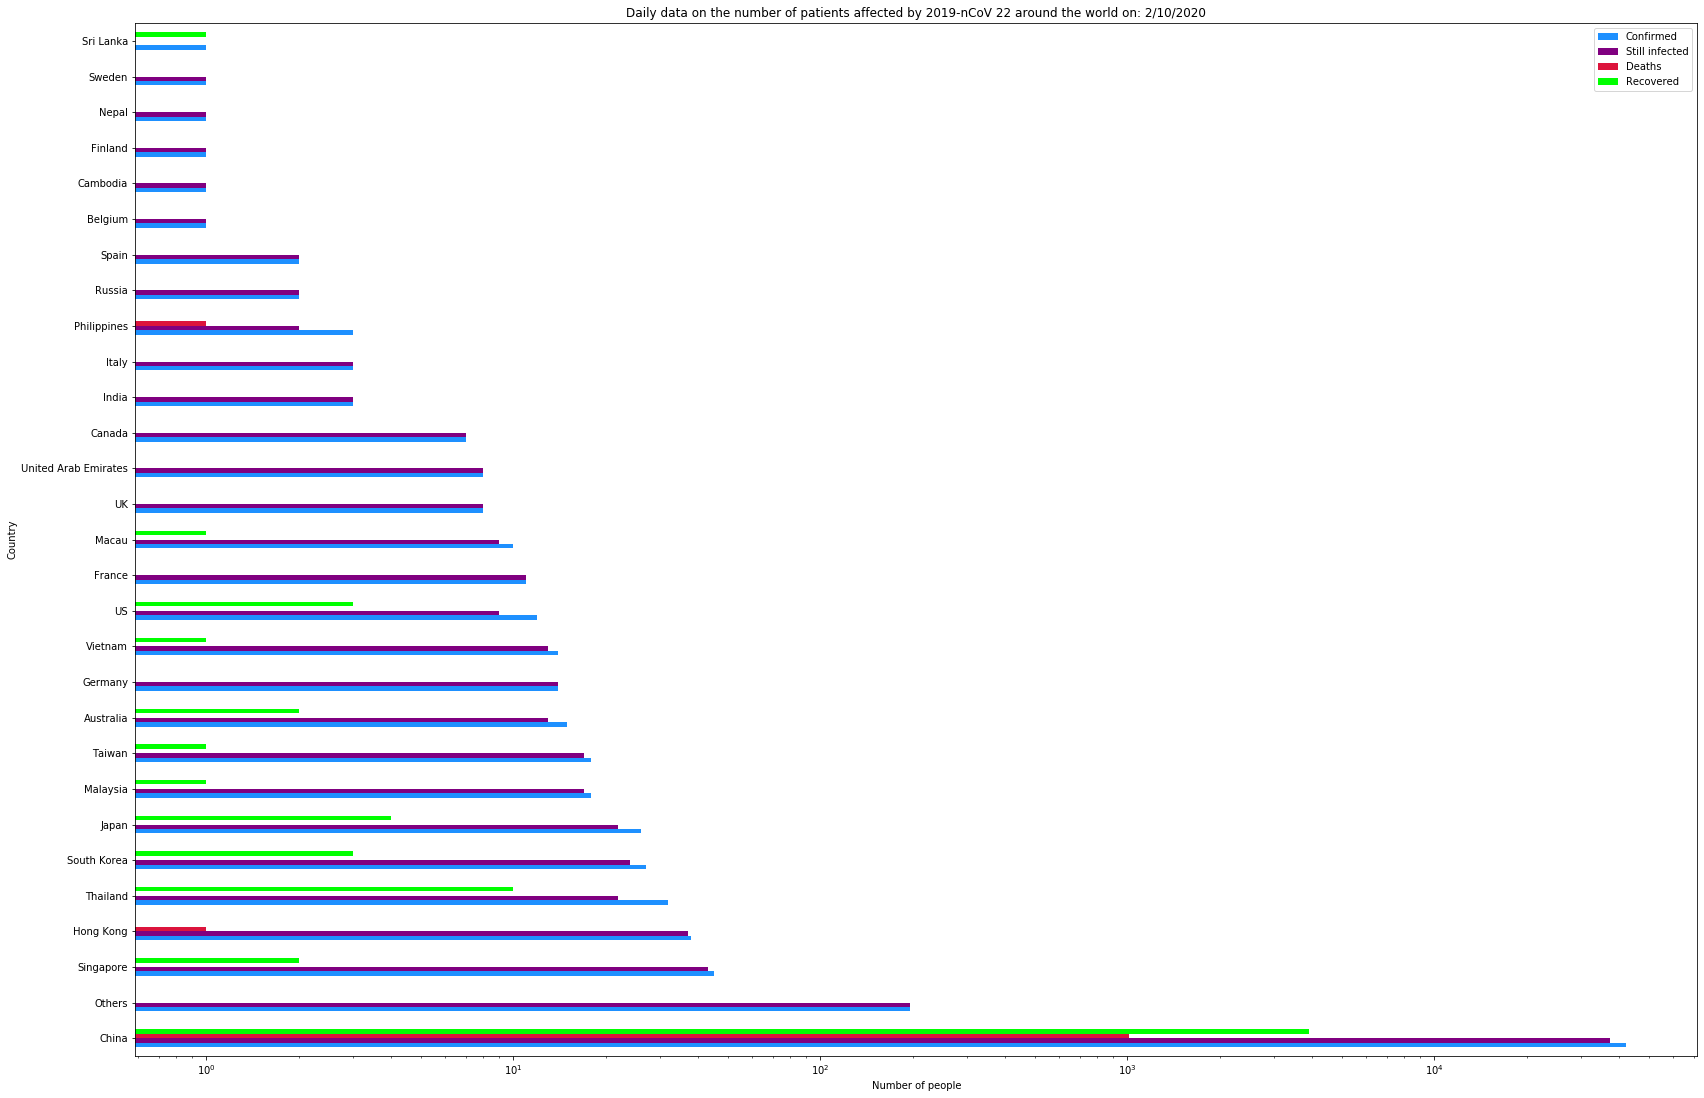

In [0]:
df = create_bar_chart(dict_date['2/10/2020 19:30'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/10/2020')

## 2/11/2020 20:44

>### Data table

In [0]:
pd.DataFrame(dict_date['2/11/2020 20:44'],[i+1 for i in range(len(dict_date['2/11/2020 20:44']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/11/2020 20:44,China,2/12/2020 1:23,44643,38800,1113,4730
2,2/11/2020 20:44,Others,2/10/2020 16:03,196,196,0,0
3,2/11/2020 20:44,Hong Kong,2/11/2020 9:43,49,48,1,0
4,2/11/2020 20:44,Singapore,2/11/2020 16:43,47,38,0,9
5,2/11/2020 20:44,Thailand,2/11/2020 18:43,33,23,0,10
6,2/11/2020 20:44,South Korea,2/12/2020 0:03,28,24,0,4
7,2/11/2020 20:44,Japan,2/11/2020 2:53,26,17,0,9
8,2/11/2020 20:44,Taiwan,2/9/2020 9:13,18,17,0,1
9,2/11/2020 20:44,Malaysia,2/11/2020 3:13,18,15,0,3
10,2/11/2020 20:44,Germany,2/11/2020 19:33,16,16,0,0


>### Data graph

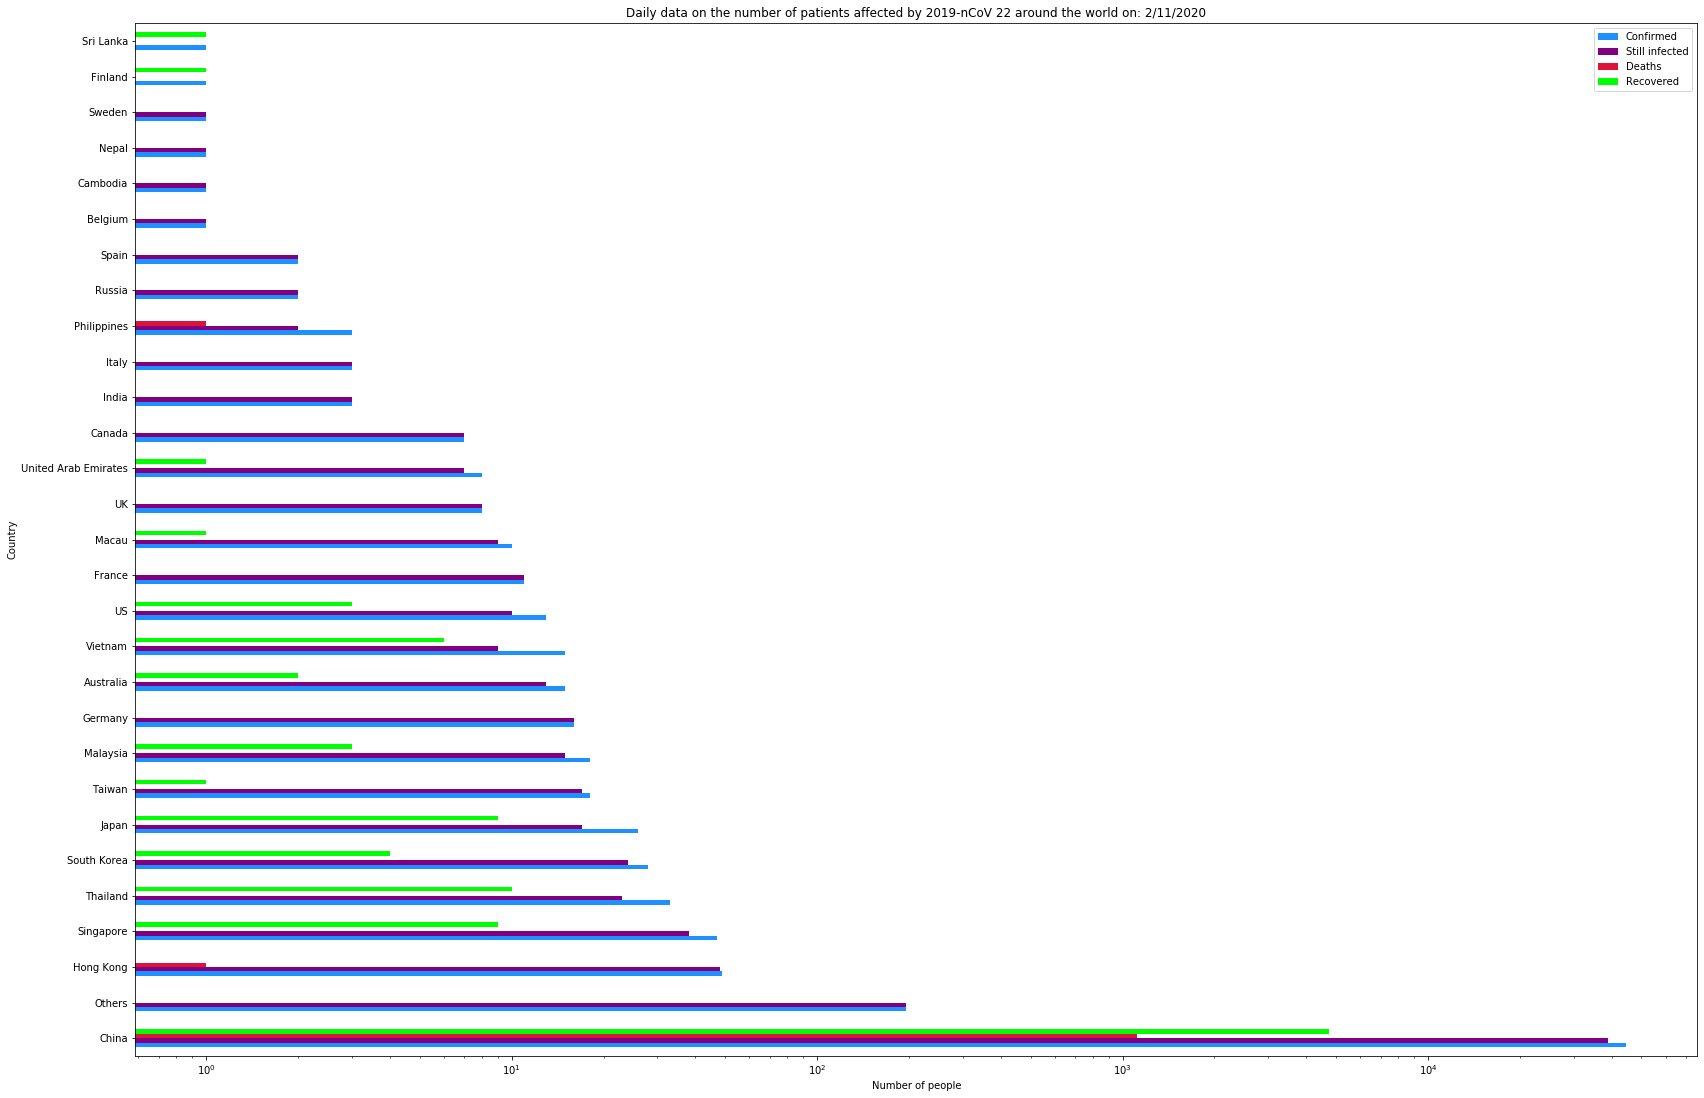

In [0]:
df = create_bar_chart(dict_date['2/11/2020 20:44'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/11/2020')

## 2/12/2020 22:00

>### Data table

In [0]:
pd.DataFrame(dict_date['2/12/2020 22:00'],[i+1 for i in range(len(dict_date['2/12/2020 22:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/12/2020 22:00,China,2/13/2020 1:23,59807,52526,1366,5915
2,2/12/2020 22:00,Others,2/12/2020 4:23,236,236,0,0
3,2/12/2020 22:00,Hong Kong,2/12/2020 9:53,50,48,1,1
4,2/12/2020 22:00,Singapore,2/12/2020 19:53,50,35,0,15
5,2/12/2020 22:00,Thailand,2/11/2020 18:43,33,23,0,10
6,2/12/2020 22:00,South Korea,2/12/2020 14:43,28,21,0,7
7,2/12/2020 22:00,Japan,2/12/2020 2:43,28,19,0,9
8,2/12/2020 22:00,Taiwan,2/9/2020 9:13,18,17,0,1
9,2/12/2020 22:00,Malaysia,2/11/2020 3:13,18,15,0,3
10,2/12/2020 22:00,Germany,2/11/2020 19:33,16,16,0,0


>### Data graph

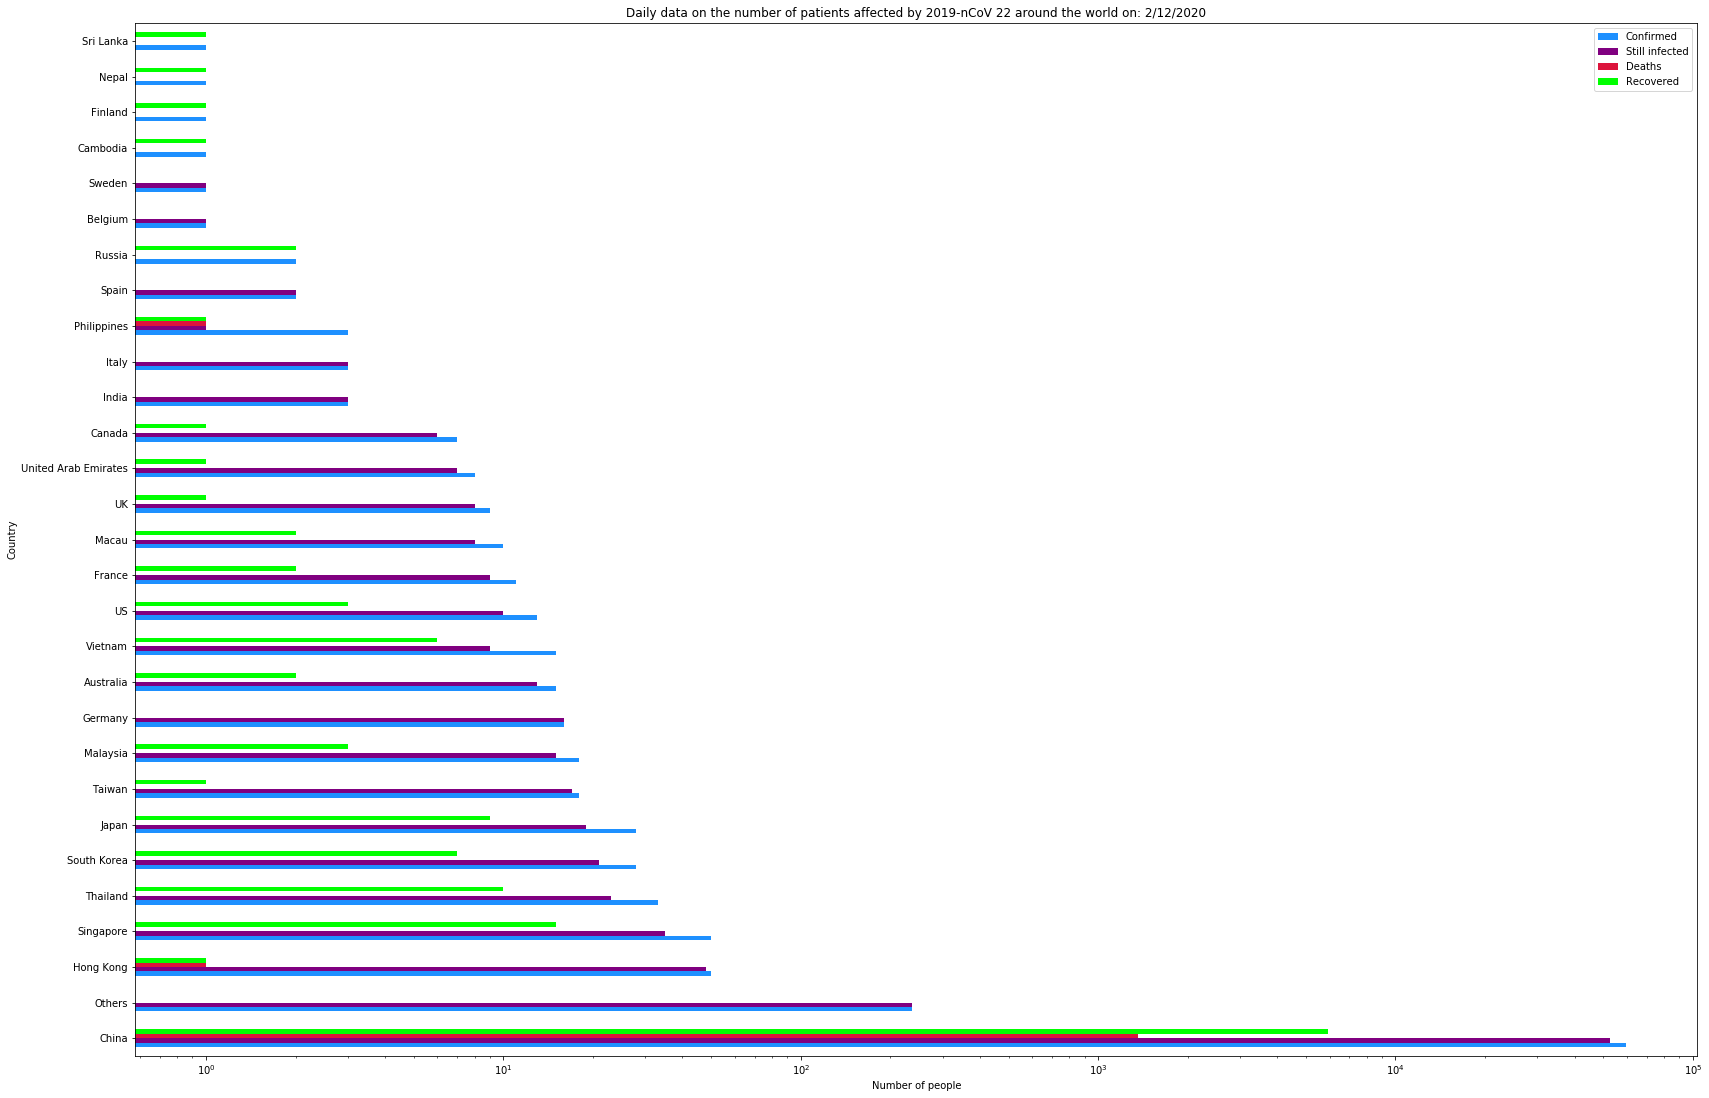

In [0]:
df = create_bar_chart(dict_date['2/12/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/12/2020')

## 2/13/2020 21:15

>### Data table

In [0]:
pd.DataFrame(dict_date['2/13/2020 21:15'],[i+1 for i in range(len(dict_date['2/13/2020 21:15']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/13/2020 21:15,China,2/14/2020 1:13,63843,55373,1488,6982
2,2/13/2020 21:15,Others,2/14/2020 0:13,279,279,0,0
3,2/13/2020 21:15,Singapore,2/13/2020 14:33,58,43,0,15
4,2/13/2020 21:15,Hong Kong,2/13/2020 14:53,53,51,1,1
5,2/13/2020 21:15,Thailand,2/13/2020 17:53,33,21,0,12
6,2/13/2020 21:15,South Korea,2/12/2020 14:43,28,21,0,7
7,2/13/2020 21:15,Japan,2/13/2020 12:23,28,18,1,9
8,2/13/2020 21:15,Malaysia,2/13/2020 10:53,19,16,0,3
9,2/13/2020 21:15,Taiwan,2/9/2020 9:13,18,17,0,1
10,2/13/2020 21:15,Germany,2/13/2020 15:13,16,15,0,1


>### Data graph

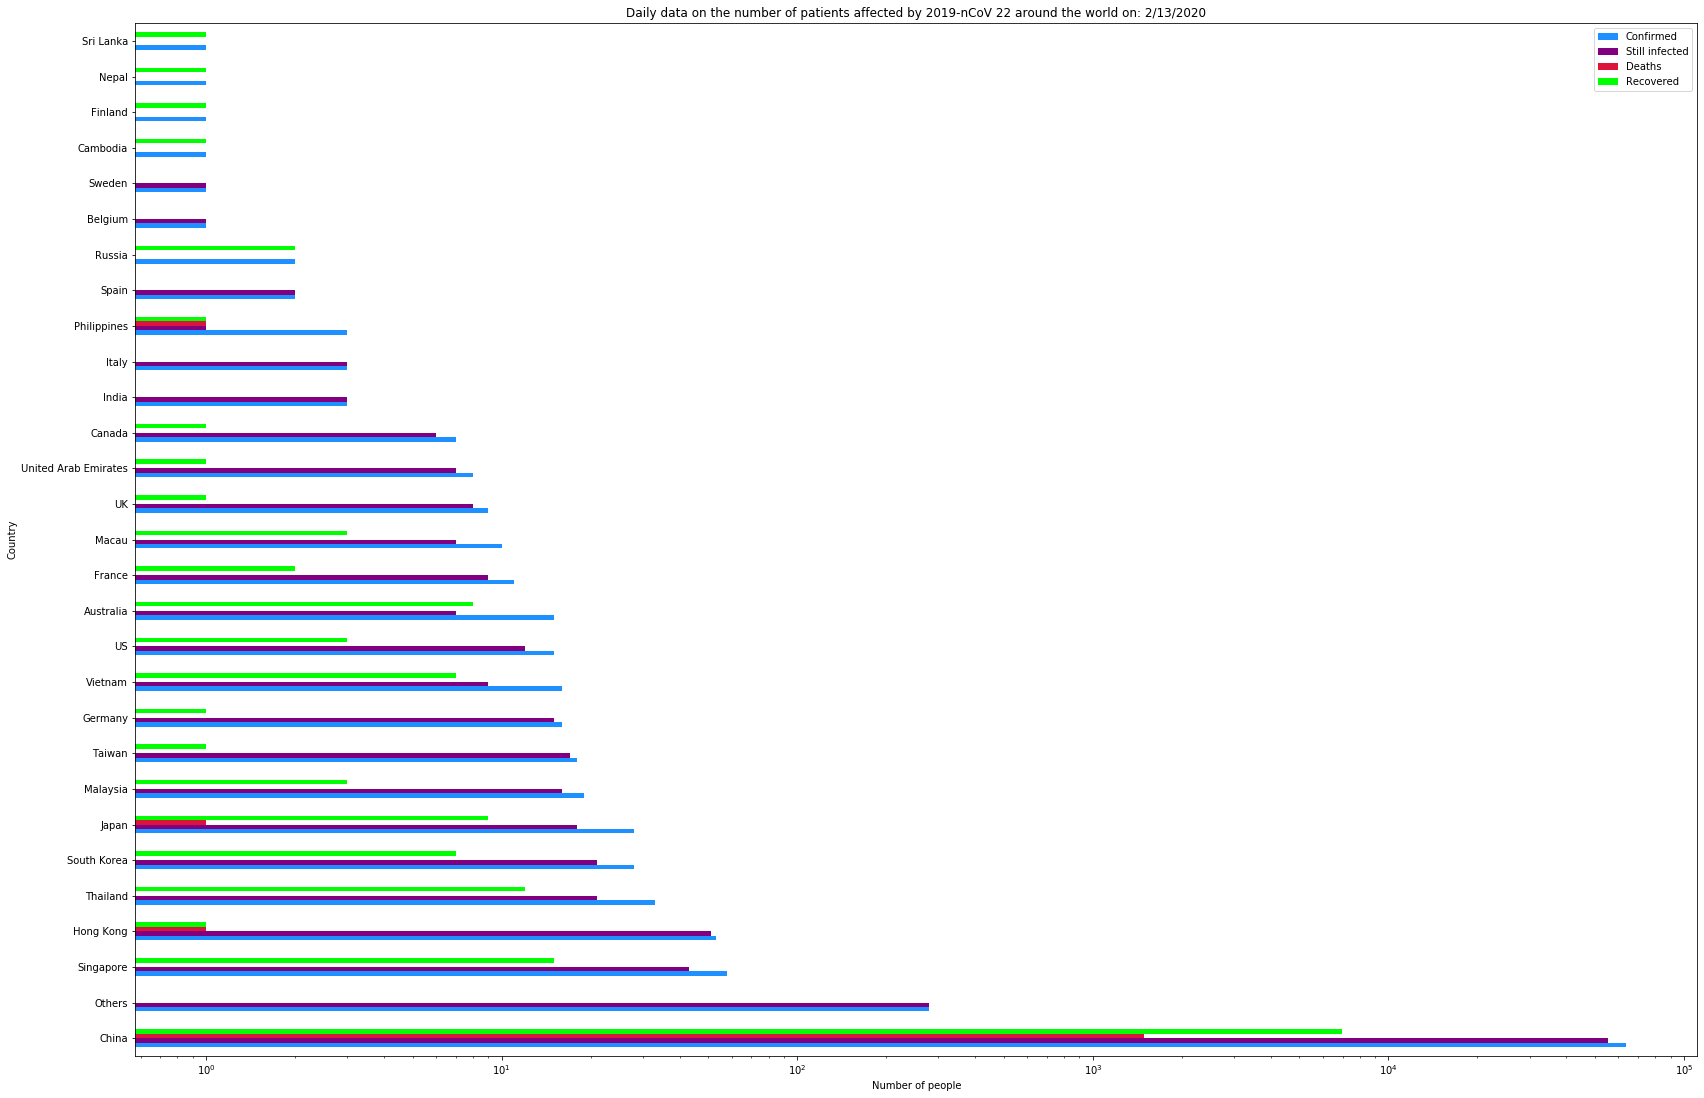

In [0]:
df = create_bar_chart(dict_date['2/13/2020 21:15'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/13/2020')

## 2/14/2020 22:00

>### Data table

In [0]:
pd.DataFrame(dict_date['2/14/2020 22:00'],[i+1 for i in range(len(dict_date['2/14/2020 22:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/14/2020 22:00,China,2/14/2020 14:13,66294,56801,1520,7973
2,2/14/2020 22:00,Others,2/14/2020 00:13,279,279,0,0
3,2/14/2020 22:00,Singapore,2/14/2020 12:43,67,50,0,17
4,2/14/2020 22:00,Hong Kong,2/14/2020 09:03,56,54,1,1
5,2/14/2020 22:00,Thailand,2/13/2020 17:53,33,21,0,12
6,2/14/2020 22:00,Japan,2/14/2020 03:53,29,19,1,9
7,2/14/2020 22:00,South Korea,2/12/2020 14:43,28,21,0,7
8,2/14/2020 22:00,Malaysia,2/13/2020 10:53,19,16,0,3
9,2/14/2020 22:00,Taiwan,2/14/2020 02:13,18,16,0,2
10,2/14/2020 22:00,Germany,2/13/2020 15:13,16,15,0,1


>### Data graph

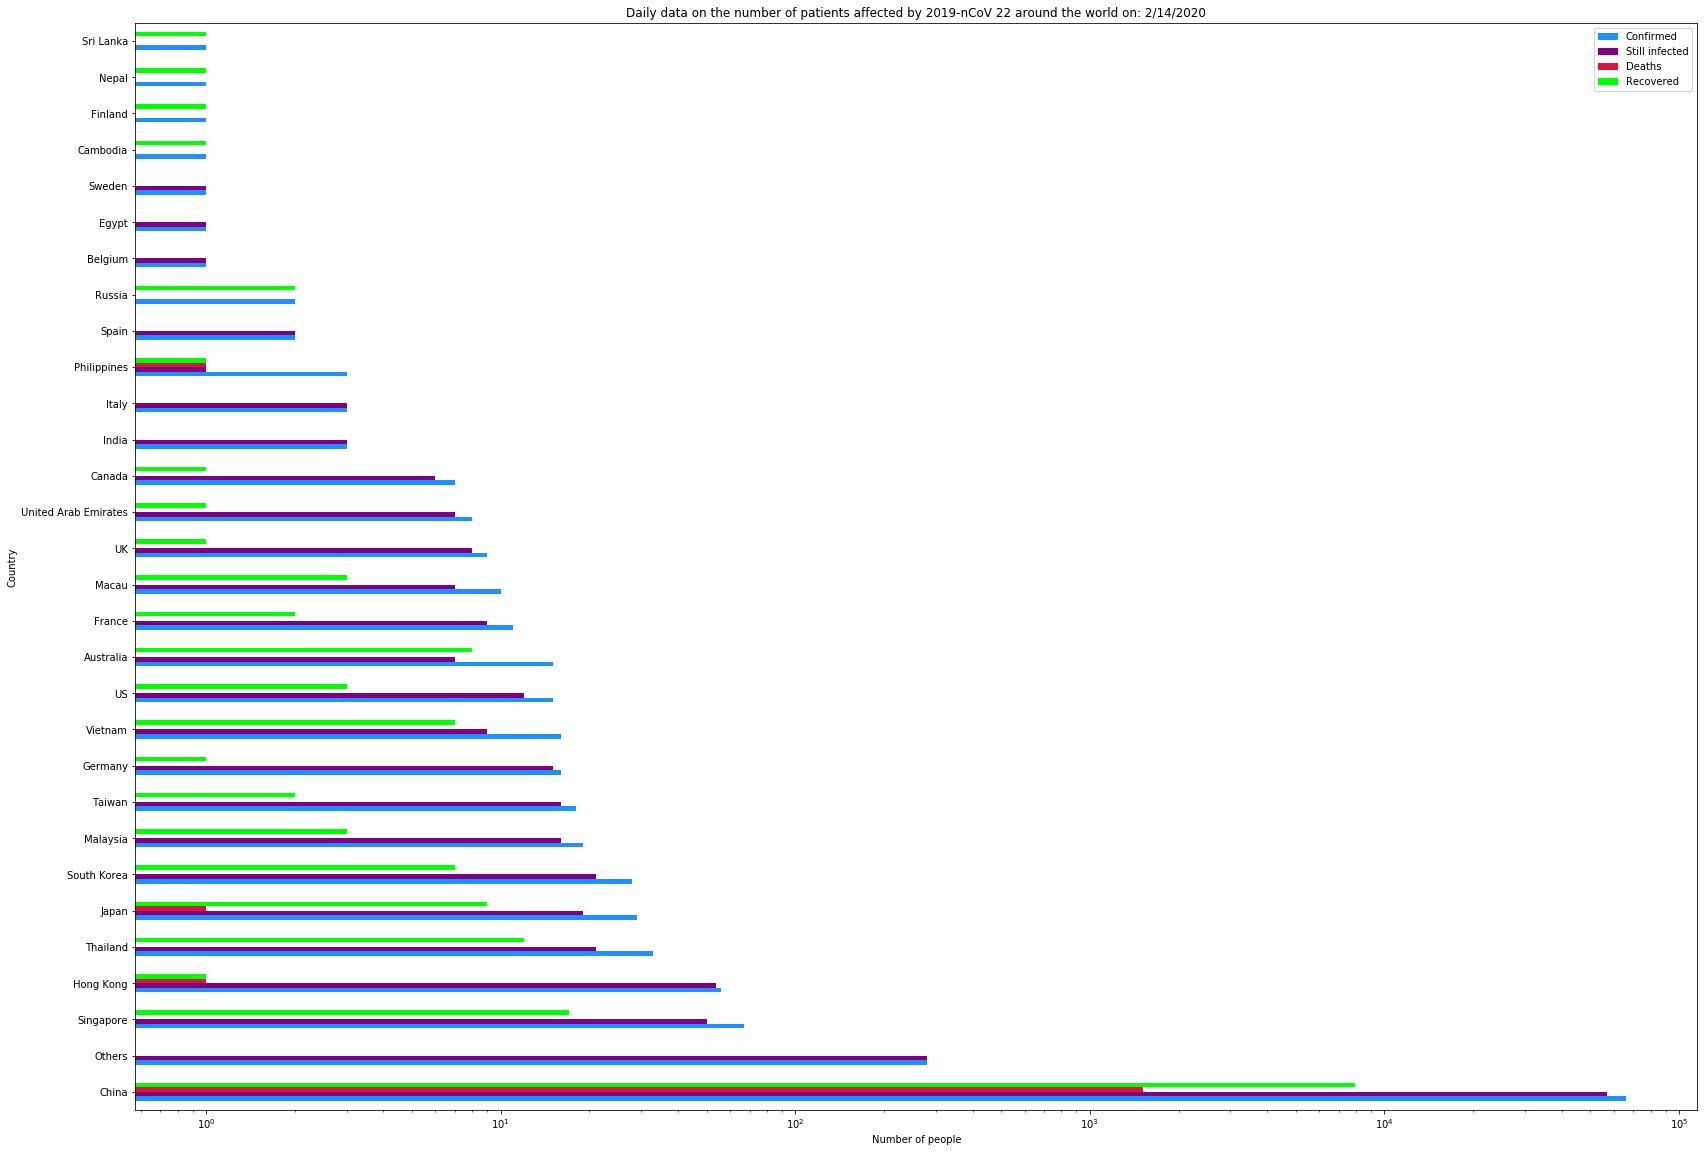

In [0]:
df = create_bar_chart(dict_date['2/14/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/14/2020')

## 2/15/2020 22:00	

>### Data table

In [0]:
pd.DataFrame(dict_date['2/15/2020 22:00'],[i+1 for i in range(len(dict_date['2/15/2020 22:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/15/2020 22:00,China,2/15/2020 11:23,68349,57393,1662,9294
2,2/15/2020 22:00,Others,2/15/2020 17:03,346,346,0,0
3,2/15/2020 22:00,Singapore,2/15/2020 23:53,72,54,0,18
4,2/15/2020 22:00,Hong Kong,2/14/2020 09:03,56,54,1,1
5,2/15/2020 22:00,Japan,2/15/2020 17:43,43,30,1,12
6,2/15/2020 22:00,Thailand,2/13/2020 17:53,33,21,0,12
7,2/15/2020 22:00,South Korea,2/15/2020 23:33,28,19,0,9
8,2/15/2020 22:00,Malaysia,2/15/2020 23:43,22,15,0,7
9,2/15/2020 22:00,Taiwan,2/15/2020 03:43,18,16,0,2
10,2/15/2020 22:00,Germany,2/13/2020 15:13,16,15,0,1


>### Data graph

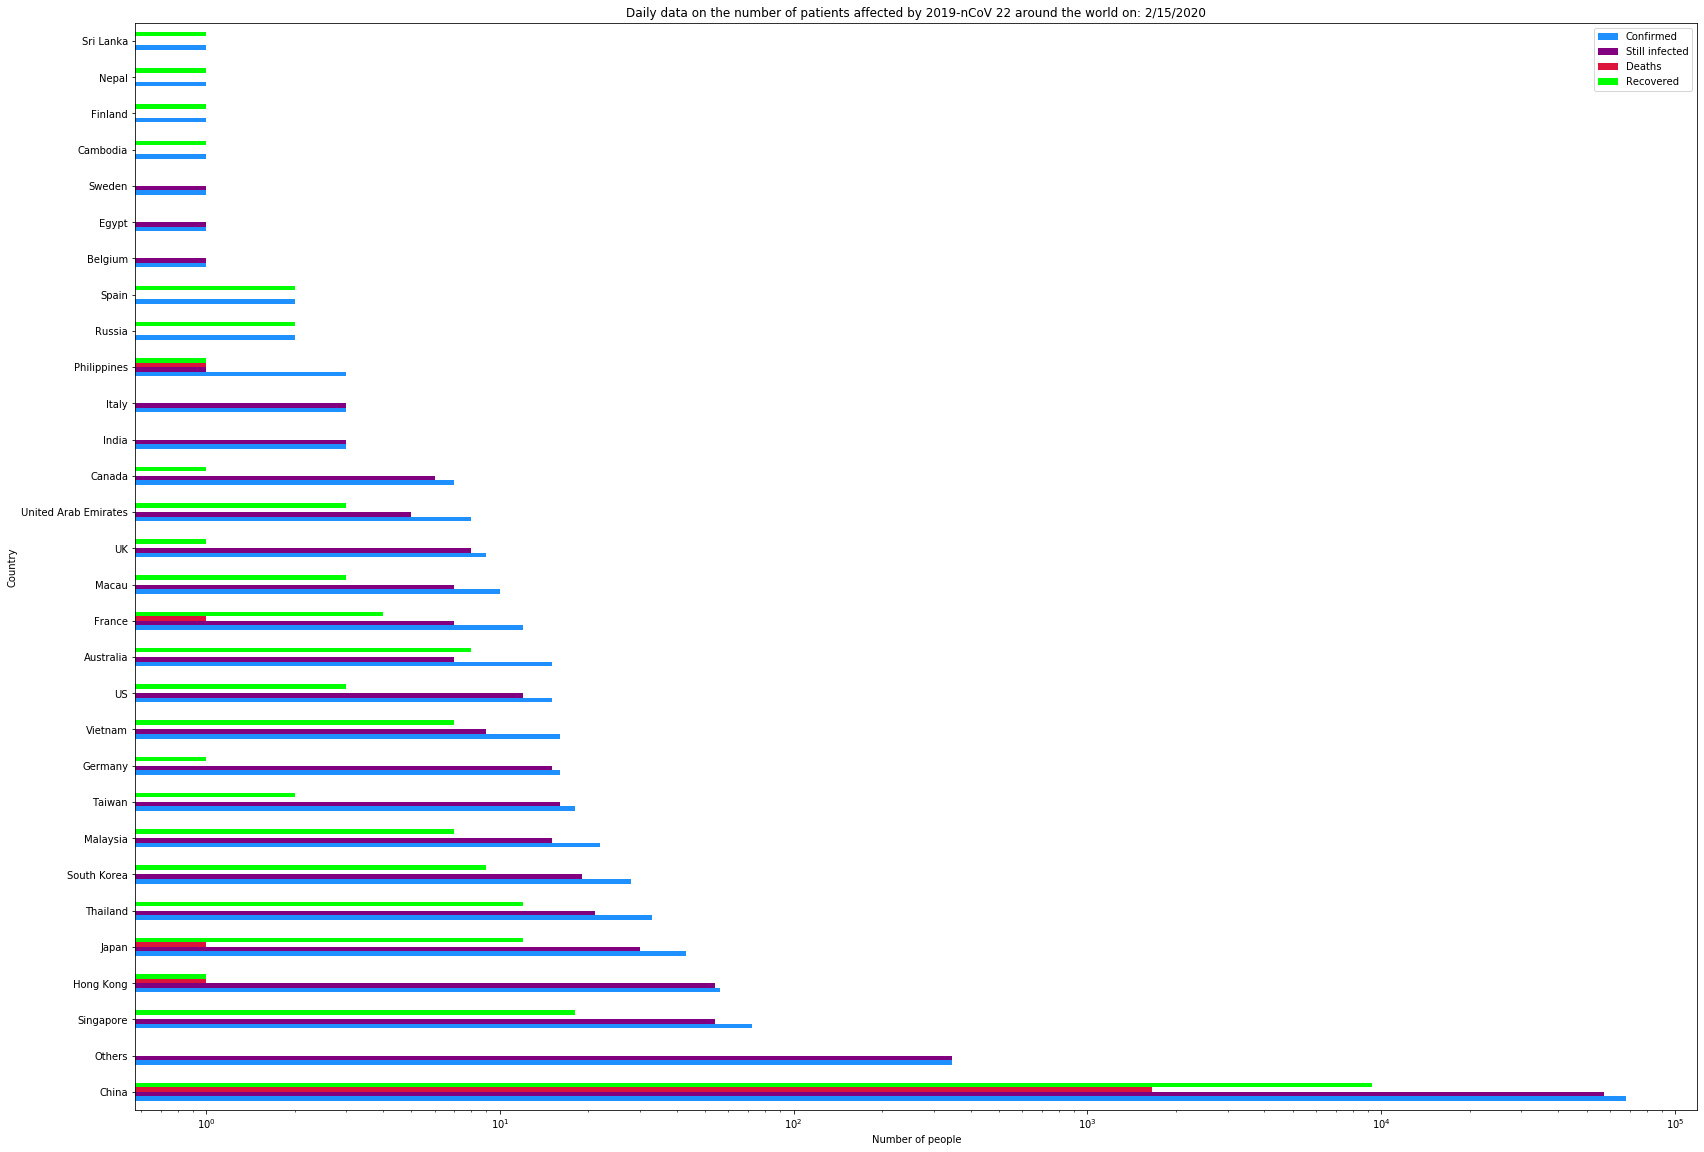

In [0]:
df = create_bar_chart(dict_date['2/15/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/15/2020')

## 2/16/2020 22:00	

>### Data table

In [0]:
pd.DataFrame(dict_date['2/16/2020 22:00'],[i+1 for i in range(len(dict_date['2/16/2020 22:00']))],HEAD)

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/16/2020 22:00,China,2/16/2020 09:33,70448,57935,1765,10748
2,2/16/2020 22:00,Others,2/16/2020 03:43,416,416,0,0
3,2/16/2020 22:00,Singapore,2/16/2020 16:23,75,57,0,18
4,2/16/2020 22:00,Japan,2/16/2020 17:43,59,46,1,12
5,2/16/2020 22:00,Hong Kong,2/16/2020 09:53,57,54,1,2
6,2/16/2020 22:00,Thailand,2/16/2020 18:03,34,20,0,14
7,2/16/2020 22:00,South Korea,2/16/2020 01:33,29,20,0,9
8,2/16/2020 22:00,Malaysia,2/15/2020 23:43,22,15,0,7
9,2/16/2020 22:00,Taiwan,2/16/2020 11:23,20,17,1,2
10,2/16/2020 22:00,Germany,2/13/2020 15:13,16,15,0,1


>### Data graph

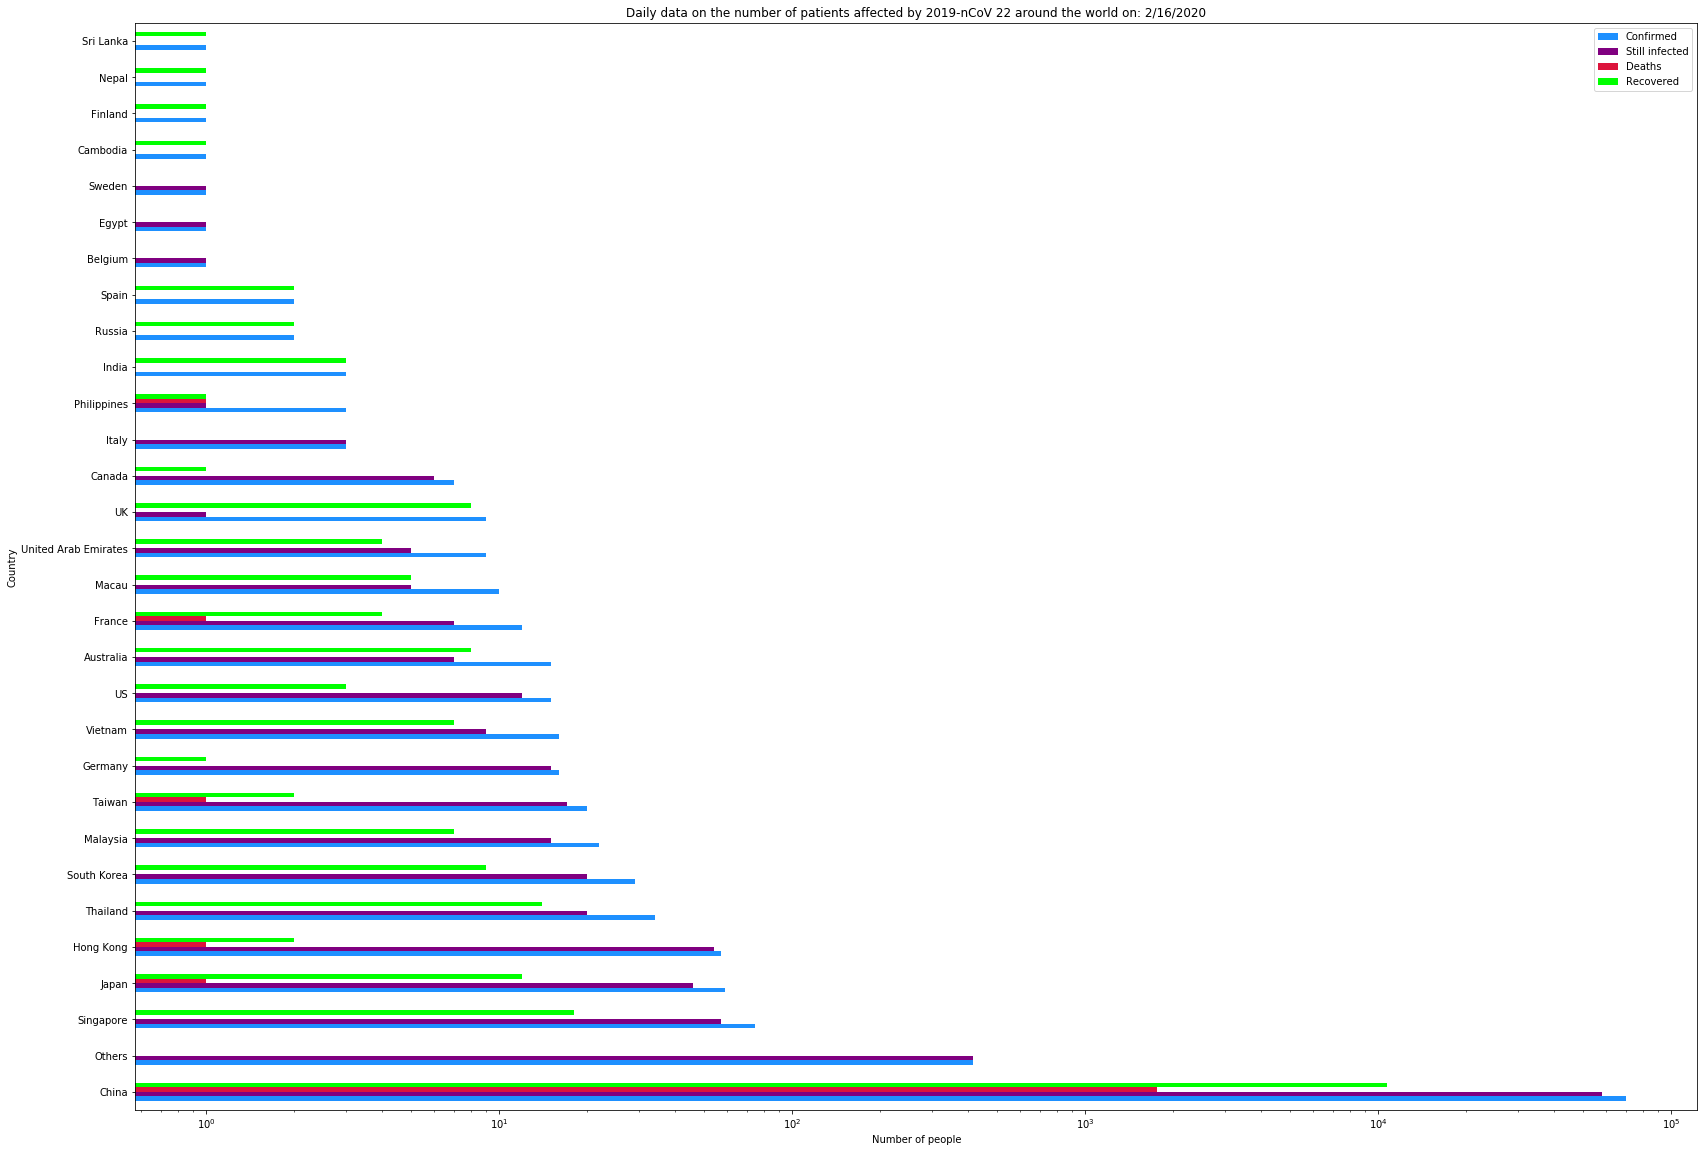

In [0]:
df = create_bar_chart(dict_date['2/16/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/16/2020')

## 2/17/2020 22:00

>### Data table

In [0]:
df_last_date = pd.DataFrame(dict_date['2/17/2020 22:00'],[i+1 for i in range(len(dict_date['2/17/2020 22:00']))],HEAD)
df_last_date

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/17/2020 22:00,China,2/17/2020 11:23,72366,58048,1863,12455
2,2/17/2020 22:00,Others,2/17/2020 14:33,515,515,0,0
3,2/17/2020 22:00,Singapore,2/17/2020 14:33,77,53,0,24
4,2/17/2020 22:00,Japan,2/17/2020 14:33,66,53,1,12
5,2/17/2020 22:00,Hong Kong,2/17/2020 22:53,60,57,1,2
6,2/17/2020 22:00,Thailand,2/17/2020 07:33,35,20,0,15
7,2/17/2020 22:00,South Korea,2/17/2020 23:43,30,20,0,10
8,2/17/2020 22:00,Taiwan,2/17/2020 15:43,22,19,1,2
9,2/17/2020 22:00,Malaysia,2/15/2020 23:43,22,15,0,7
10,2/17/2020 22:00,Germany,2/13/2020 15:13,16,15,0,1


>### Data graph

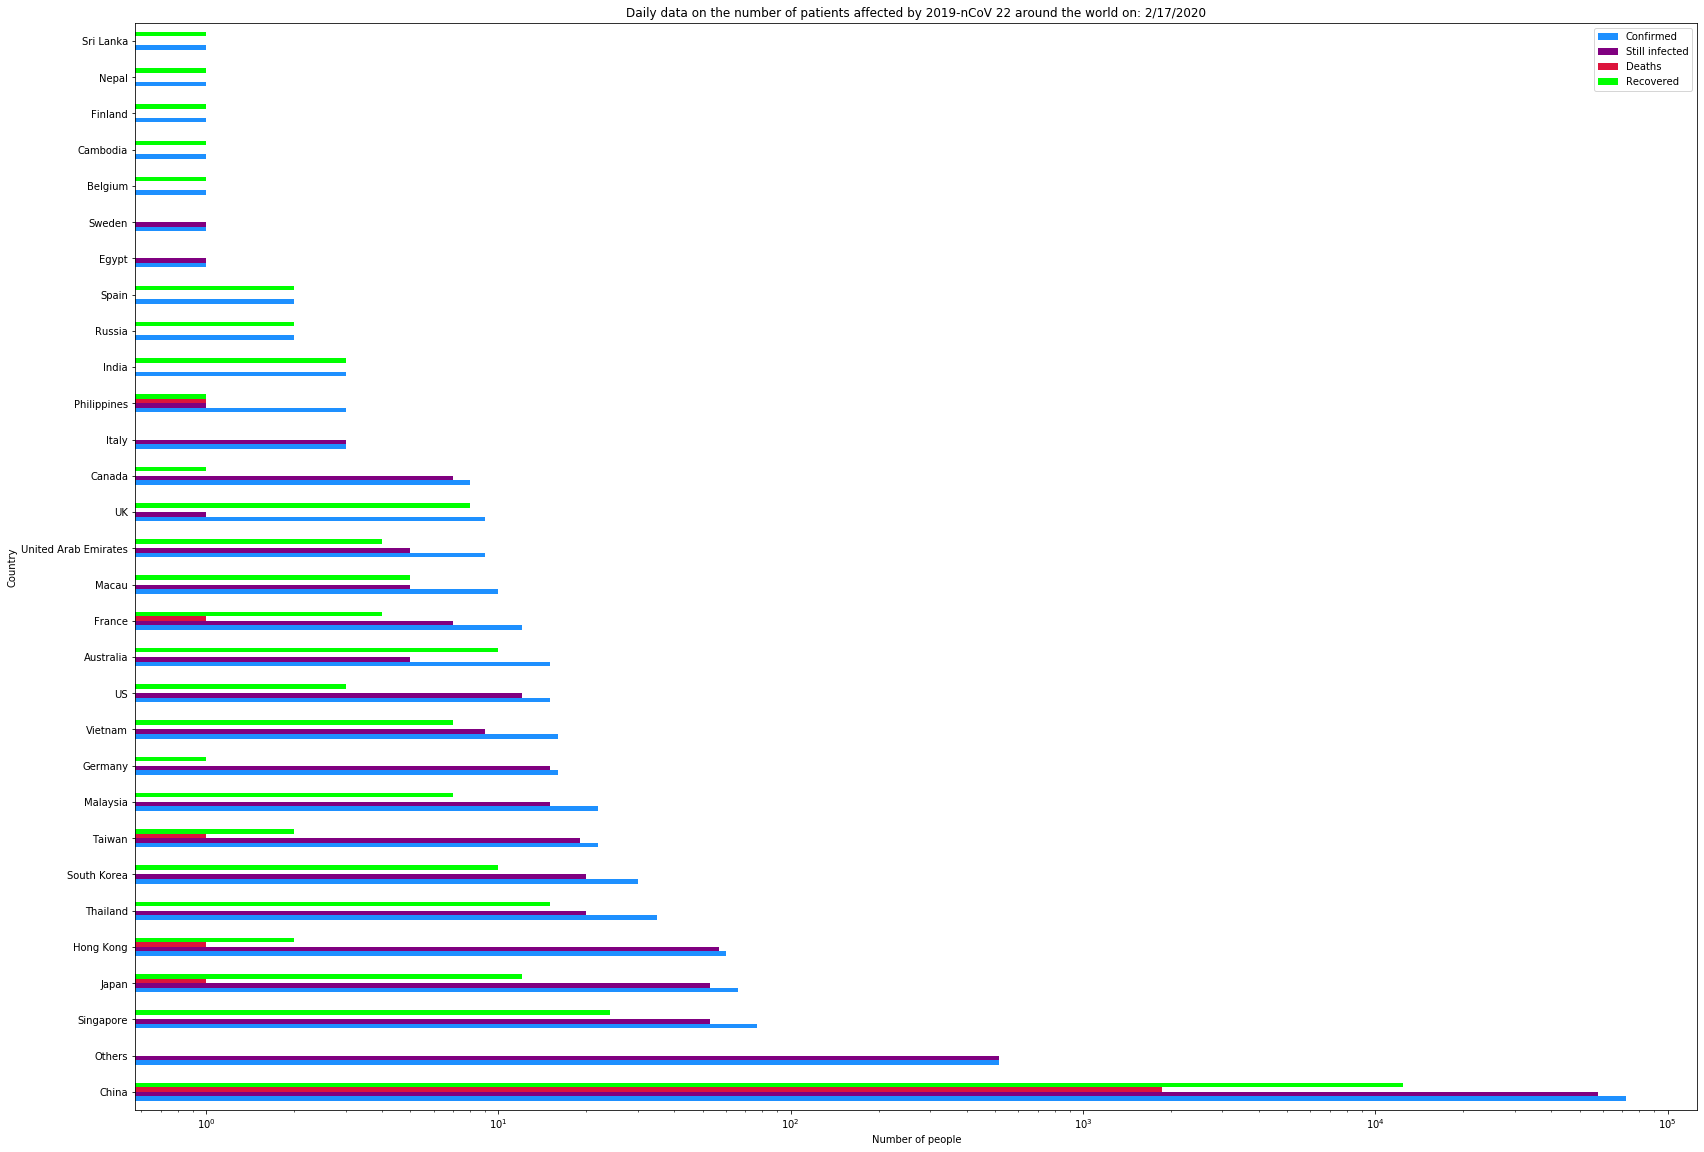

In [0]:
df = create_bar_chart(dict_date['2/17/2020 22:00'],'Daily data on the number of patients affected by 2019-nCoV 22 around the world on: 2/17/2020')

# World  data

>### Data table

In [0]:
pd.DataFrame(list_world,[i+1 for i in range(len(list_world))],head_world)

,Date,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,555,555,0,0
2,1/23/2020 12:00,655,607,18,30
3,1/24/2020 12:00,943,881,26,36
4,1/25/2020 22:00,2022,1917,56,49
5,1/26/2020 23:00,2794,2660,80,54
6,1/27/2020 20:30,4473,4303,107,63
7,1/28/2020 23:00,6057,5815,132,110
8,1/29/2020 21:00,7782,7479,170,133
9,1/30/2020 21:30,9775,9375,213,187
10,1/31/2020 19:00,11372,10861,259,252


> ### Data graph

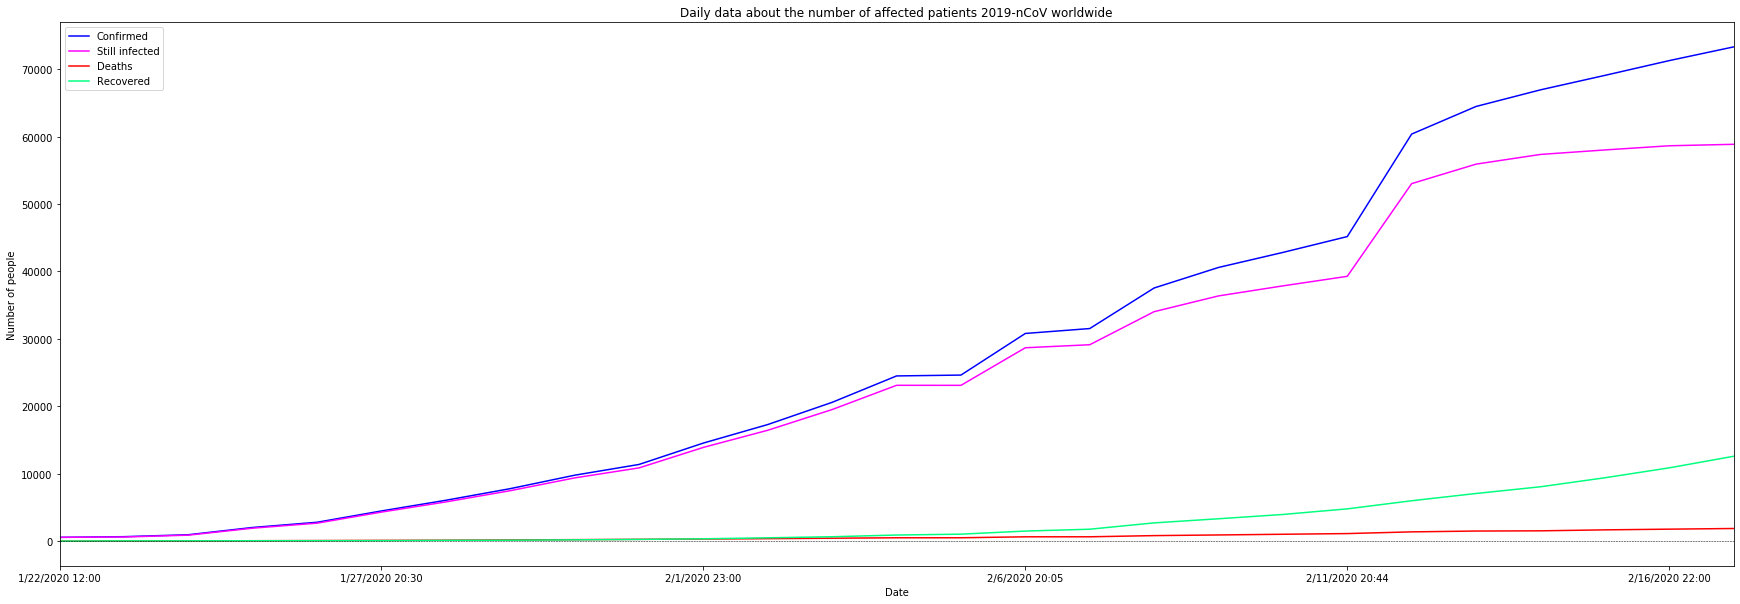

In [0]:
plot_line_graph(list_world,'Daily data about the number of affected patients 2019-nCoV worldwide')

> ### Graph Daily geographic information 2019-nCoV 

In [0]:
graph_geo_about_2019_nCoV(df_nCoV)

# Country information

## China

>### Data table

In [0]:
df_China = pd.DataFrame(dict_data['China'],[i+1 for i in range(len(dict_data['China']))],HEAD )
df_China

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,China,1/22/2020 12:00,549,549,0,0
2,1/23/2020 12:00,China,1/23/2020 12:00,641,593,18,30
3,1/24/2020 12:00,China,1/24/2020 12:00,918,856,26,36
4,1/25/2020 22:00,China,1/25/2020 22:00,1981,1876,56,49
5,1/26/2020 23:00,China,1/26/2020 23:00,2739,2608,80,51
6,1/27/2020 20:30,China,1/27/2020 20:30,4411,4244,107,60
7,1/28/2020 23:00,China,1/28/2020 23:00,5972,5736,132,104
8,1/29/2020 21:00,China,1/29/2020 21:00,7680,7383,170,127
9,1/30/2020 21:30,China,1/30/2020 21:30,9660,9268,213,179
10,1/31/2020 19:00,China,1/31/2020 19:00,11223,10722,259,242


>### Data graph

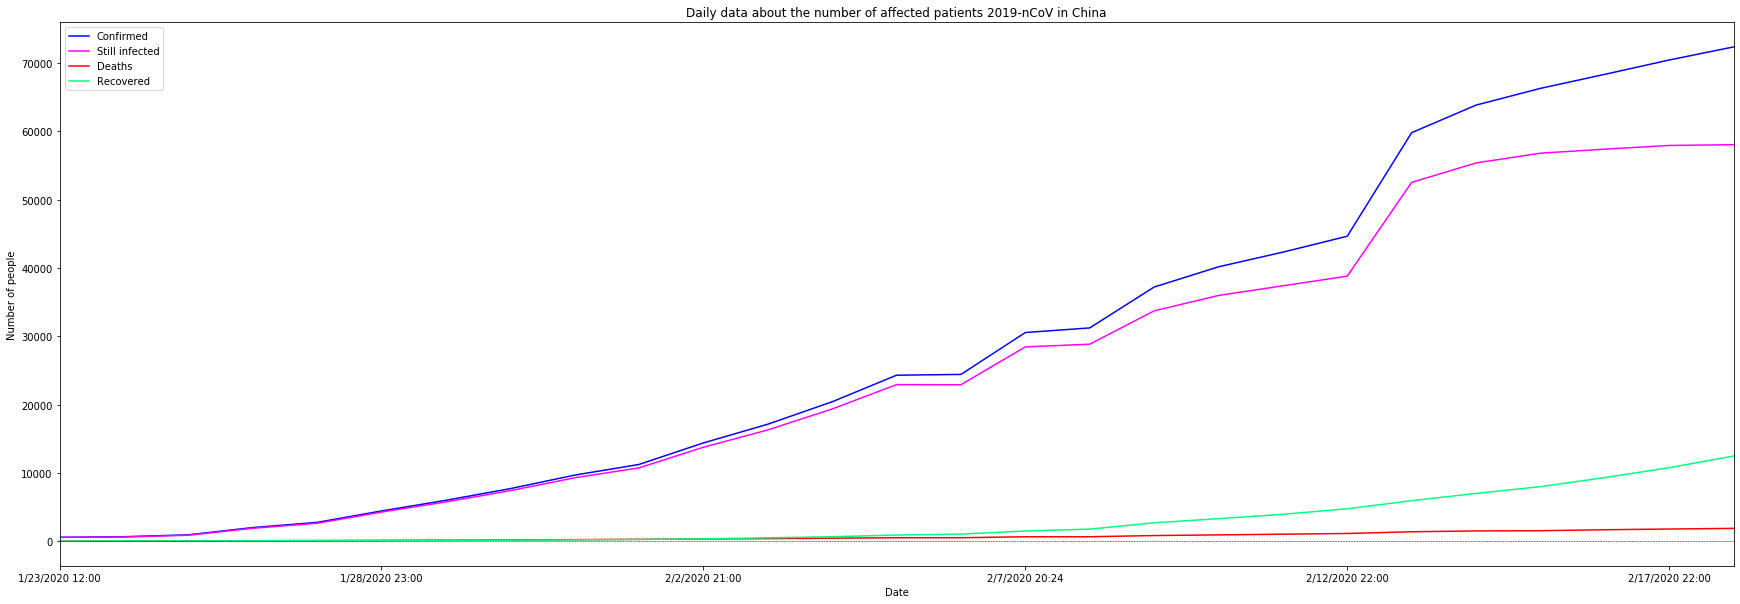

In [0]:
list_China = create_list_country('China', list_date, dict_date)
plot_line_graph(list_China,'Daily data about the number of affected patients 2019-nCoV in China')

## Thailand

>### Data table

In [0]:
df_Thai = pd.DataFrame(dict_data['Thailand'],[i+1 for i in range(len(dict_data['Thailand']))],HEAD)
df_Thai

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,Thailand,1/22/2020 12:00,2,2,0,0
2,1/23/2020 12:00,Thailand,1/23/2020 12:00,3,3,0,0
3,1/24/2020 12:00,Thailand,1/24/2020 12:00,5,5,0,0
4,1/25/2020 22:00,Thailand,1/25/2020 12:00,7,7,0,0
5,1/26/2020 23:00,Thailand,1/26/2020 23:00,8,6,0,2
6,1/27/2020 20:30,Thailand,1/27/2020 20:30,8,6,0,2
7,1/28/2020 23:00,Thailand,1/28/2020 23:00,14,9,0,5
8,1/29/2020 21:00,Thailand,1/29/2020 21:00,14,9,0,5
9,1/30/2020 21:30,Thailand,1/30/2020 21:30,14,9,0,5
10,1/31/2020 19:00,Thailand,1/31/2020 19:00,19,12,0,7


>### Data graph

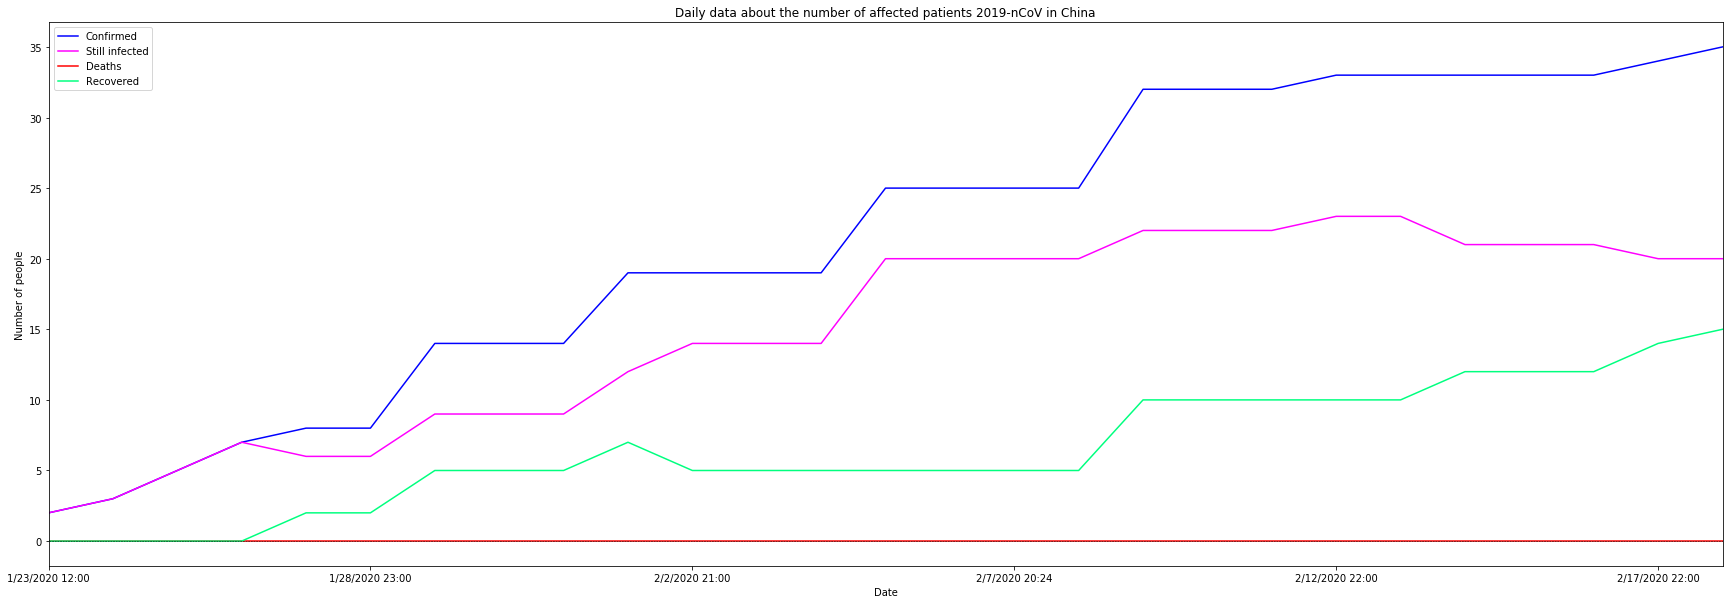

In [0]:
list_thai = create_list_country('Thailand', list_date, dict_date)
plot_line_graph(list_thai,'Daily data about the number of affected patients 2019-nCoV in China')

## United States

>### Data table

In [0]:
df_US = pd.DataFrame(dict_data['US'],[i+1 for i in range(len(dict_data['US']))],HEAD)
df_US

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,US,1/22/2020 12:00,1,1,0,0
2,1/23/2020 12:00,US,1/23/2020 12:00,1,1,0,0
3,1/24/2020 12:00,US,1/24/2020 12:00,2,2,0,0
4,1/25/2020 22:00,US,1/25/2020 12:00,3,3,0,0
5,1/26/2020 23:00,US,1/26/2020 23:00,4,4,0,0
6,1/27/2020 20:30,US,1/27/2020 20:30,4,4,0,0
7,1/28/2020 23:00,US,1/28/2020 23:00,4,4,0,0
8,1/29/2020 21:00,US,1/29/2020 21:00,4,4,0,0
9,1/30/2020 21:30,US,1/30/2020 21:30,5,5,0,0
10,1/31/2020 19:00,US,1/31/2020 19:00,5,5,0,0


>### Data graph

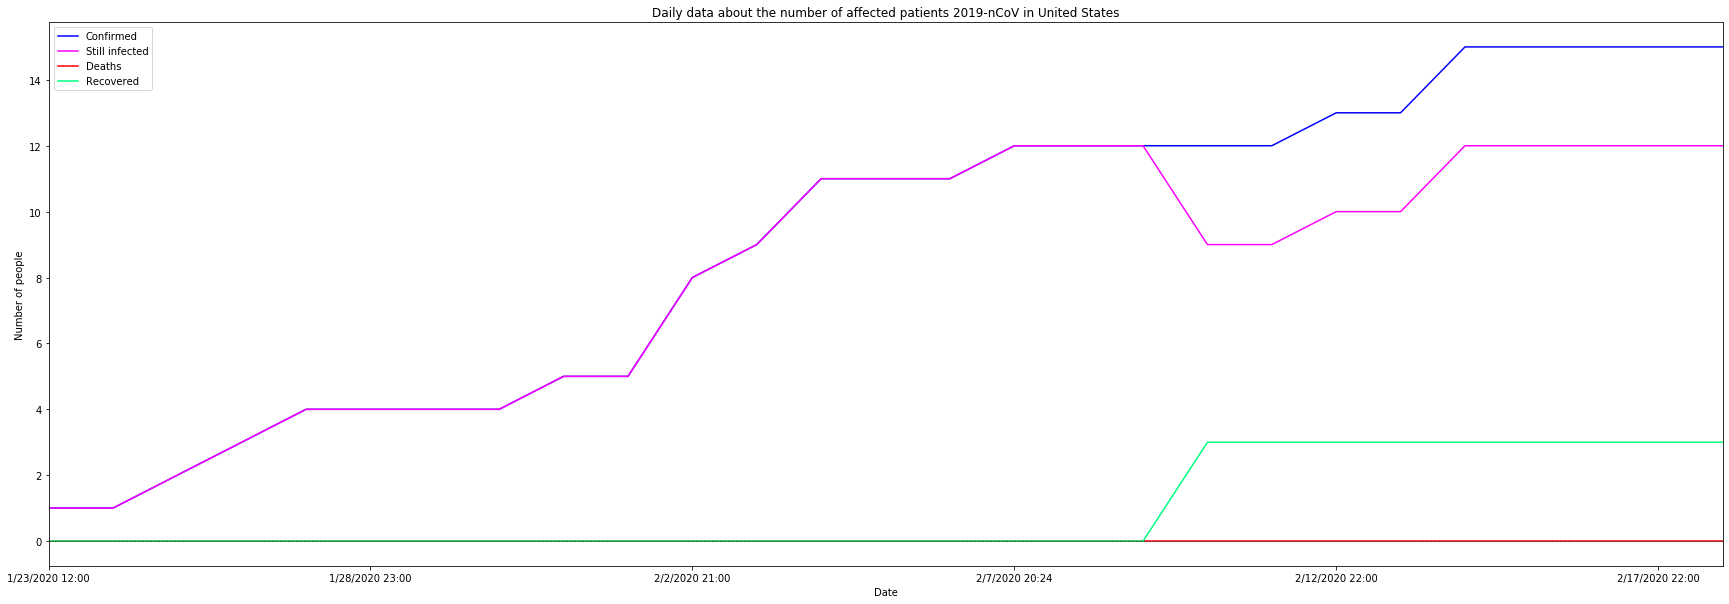

In [0]:
list_US = create_list_country('US', list_date, dict_date)
plot_line_graph(list_US,'Daily data about the number of affected patients 2019-nCoV in United States')

## Japan


>### Data table

In [0]:
df_Japan = pd.DataFrame(dict_data['Japan'],[i+1 for i in range(len(dict_data['Japan']))],HEAD)
df_Japan

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,Japan,1/22/2020 12:00,2,2,0,0
2,1/23/2020 12:00,Japan,1/23/2020 12:00,1,1,0,0
3,1/24/2020 12:00,Japan,1/24/2020 12:00,2,2,0,0
4,1/25/2020 22:00,Japan,1/25/2020 12:00,2,2,0,0
5,1/26/2020 23:00,Japan,1/26/2020 23:00,4,3,0,1
6,1/27/2020 20:30,Japan,1/27/2020 20:30,4,3,0,1
7,1/28/2020 23:00,Japan,1/28/2020 23:00,7,6,0,1
8,1/29/2020 21:00,Japan,1/29/2020 21:00,11,10,0,1
9,1/30/2020 21:30,Japan,1/30/2020 21:30,11,10,0,1
10,1/31/2020 19:00,Japan,1/31/2020 19:00,17,16,0,1


>### Data graph

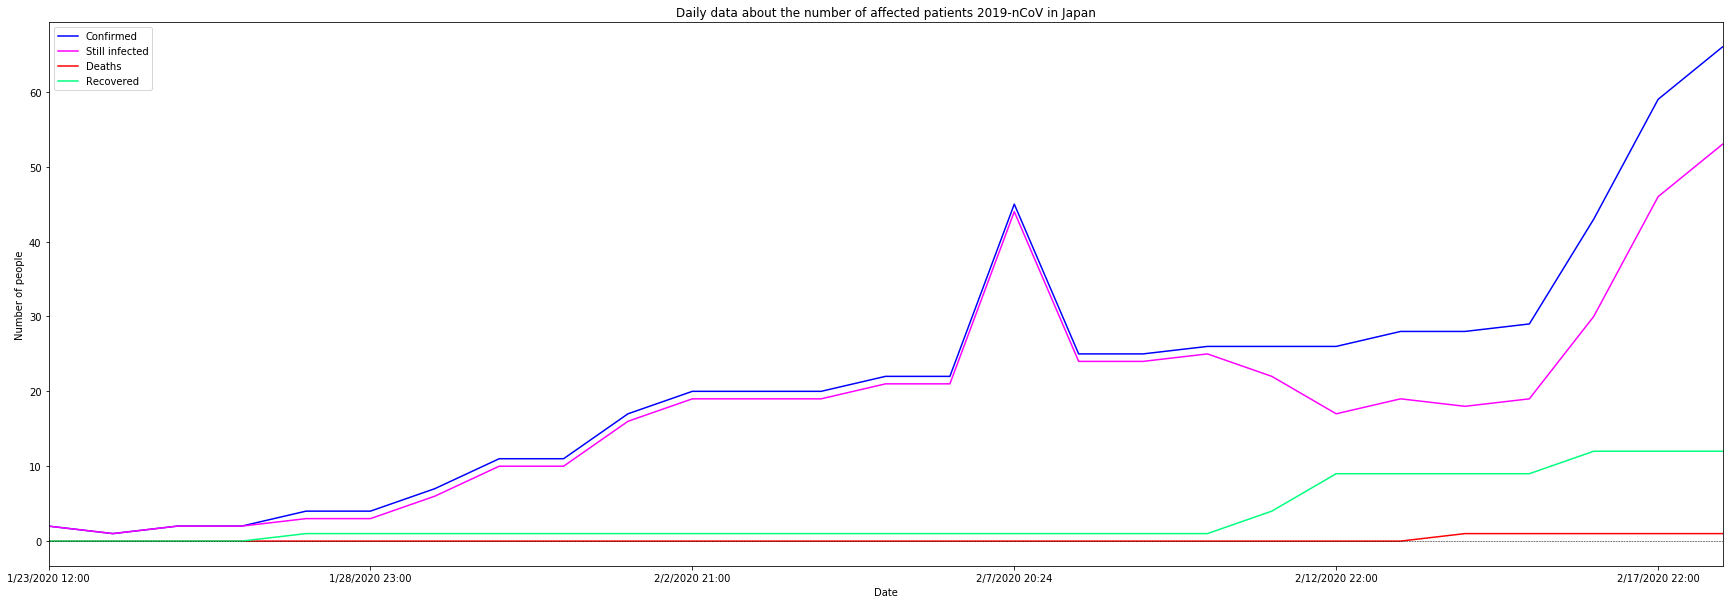

In [0]:
list_Japan = create_list_country('Japan', list_date, dict_date)
plot_line_graph(list_Japan,'Daily data about the number of affected patients 2019-nCoV in Japan')

## South Korea

>### Data table

In [0]:
df_South_Korea = pd.DataFrame(dict_data['South Korea'],[i+1 for i in range(len(dict_data['South Korea']))],HEAD)
df_South_Korea

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/22/2020 12:00,South Korea,1/22/2020 12:00,1,1,0,0
2,1/23/2020 12:00,South Korea,1/23/2020 12:00,1,1,0,0
3,1/24/2020 12:00,South Korea,1/24/2020 12:00,2,2,0,0
4,1/25/2020 22:00,South Korea,1/25/2020 12:00,3,3,0,0
5,1/26/2020 23:00,South Korea,1/26/2020 23:00,3,3,0,0
6,1/27/2020 20:30,South Korea,1/27/2020 20:30,4,4,0,0
7,1/28/2020 23:00,South Korea,1/28/2020 23:00,4,4,0,0
8,1/29/2020 21:00,South Korea,1/29/2020 21:00,4,4,0,0
9,1/30/2020 21:30,South Korea,1/30/2020 21:30,6,6,0,0
10,1/31/2020 19:00,South Korea,1/31/2020 19:00,11,11,0,0


>### Data graph

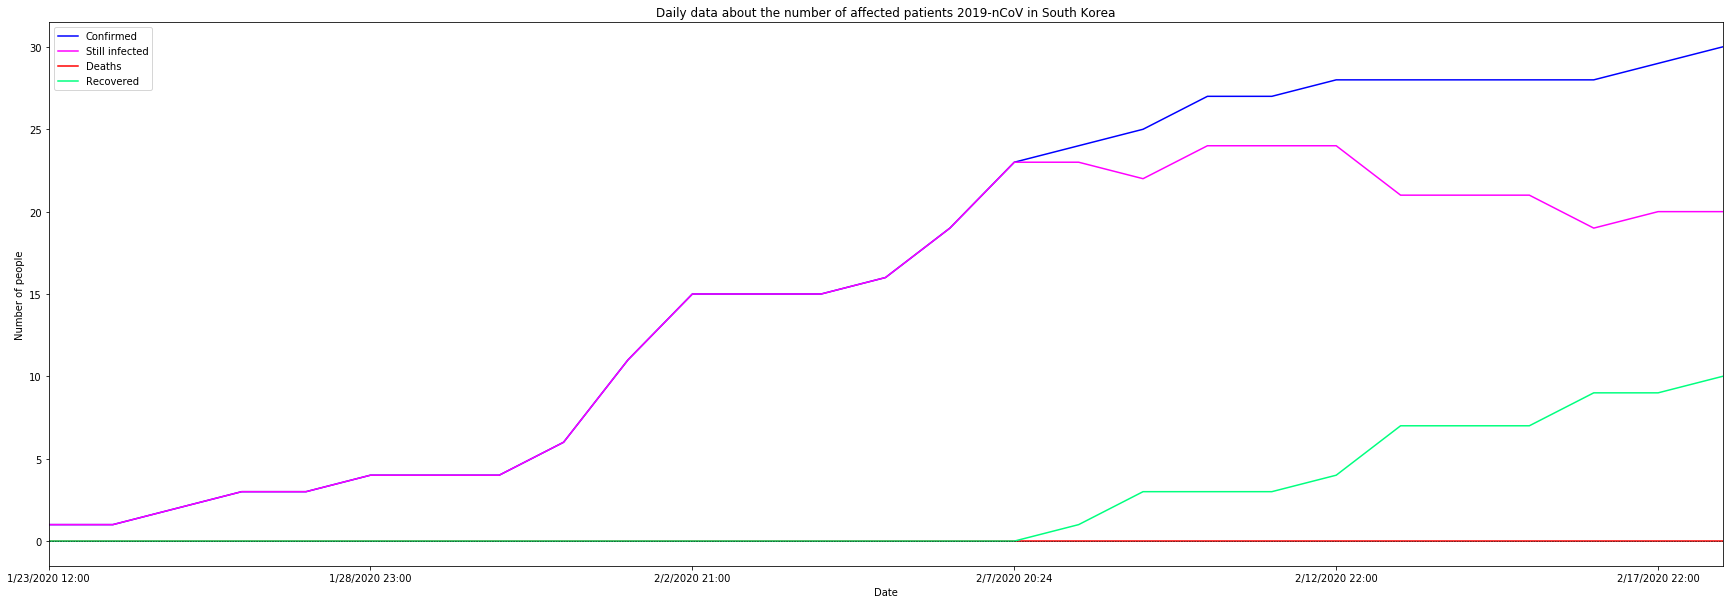

In [0]:
list_South_Korea = create_list_country('South Korea', list_date, dict_date)
plot_line_graph(list_South_Korea,'Daily data about the number of affected patients 2019-nCoV in South Korea')

##Hong Kong

>### Data table

In [0]:
df_Hong_Kong = pd.DataFrame(dict_data['Hong Kong'],[i+1 for i in range(len(dict_data['Hong Kong']))],HEAD)
df_Hong_Kong

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Hong Kong,1/23/2020 12:00,2,2,0,0
2,1/24/2020 12:00,Hong Kong,1/24/2020 12:00,2,2,0,0
3,1/25/2020 22:00,Hong Kong,1/25/2020 12:00,5,5,0,0
4,1/26/2020 23:00,Hong Kong,1/26/2020 23:00,8,8,0,0
5,1/27/2020 20:30,Hong Kong,1/27/2020 20:30,8,8,0,0
6,1/28/2020 23:00,Hong Kong,1/28/2020 23:00,8,8,0,0
7,1/29/2020 21:00,Hong Kong,1/29/2020 21:00,10,10,0,0
8,1/30/2020 21:30,Hong Kong,1/30/2020 21:30,12,12,0,0
9,1/31/2020 19:00,Hong Kong,1/31/2020 19:00,13,13,0,0
10,2/1/2020 23:00,Hong Kong,2/2/2020 1:03,14,14,0,0


>### Data graph

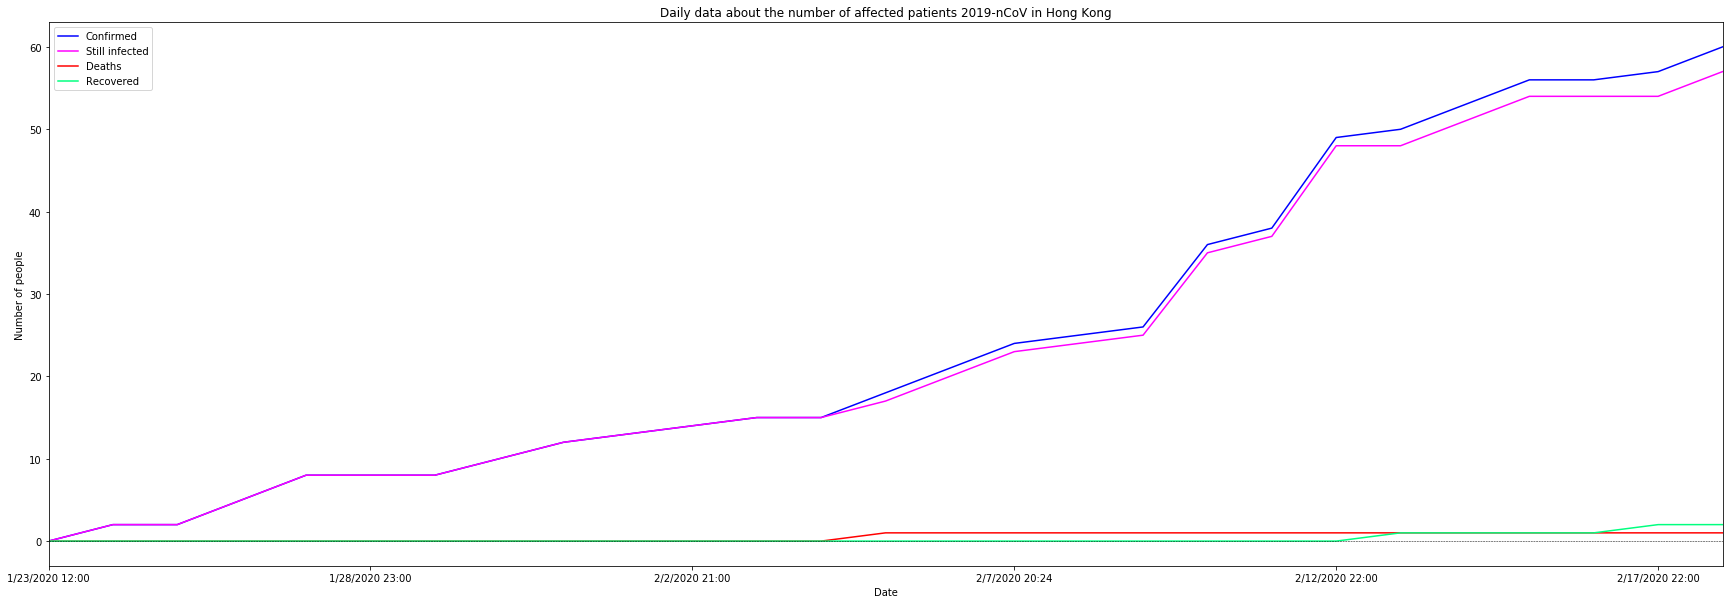

In [0]:
list_Hong_Kong = create_list_country('Hong Kong', list_date, dict_date)
plot_line_graph(list_Hong_Kong,'Daily data about the number of affected patients 2019-nCoV in Hong Kong')

##Macau

>### Data table

In [0]:
df_Macau = pd.DataFrame(dict_data['Macau'],[i+1 for i in range(len(dict_data['Macau']))],HEAD)
df_Macau

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Macau,1/23/2020 12:00,2,2,0,0
2,1/24/2020 12:00,Macau,1/24/2020 12:00,2,2,0,0
3,1/25/2020 22:00,Macau,1/25/2020 12:00,2,2,0,0
4,1/26/2020 23:00,Macau,1/26/2020 23:00,6,6,0,0
5,1/27/2020 20:30,Macau,1/27/2020 20:30,6,6,0,0
6,1/28/2020 23:00,Macau,1/28/2020 23:00,7,7,0,0
7,1/29/2020 21:00,Macau,1/29/2020 21:00,7,7,0,0
8,1/30/2020 21:30,Macau,1/30/2020 21:30,7,7,0,0
9,1/31/2020 19:00,Macau,1/31/2020 19:00,7,7,0,0
10,2/1/2020 23:00,Macau,1/31/2020 8:15,7,7,0,0


>### Data graph

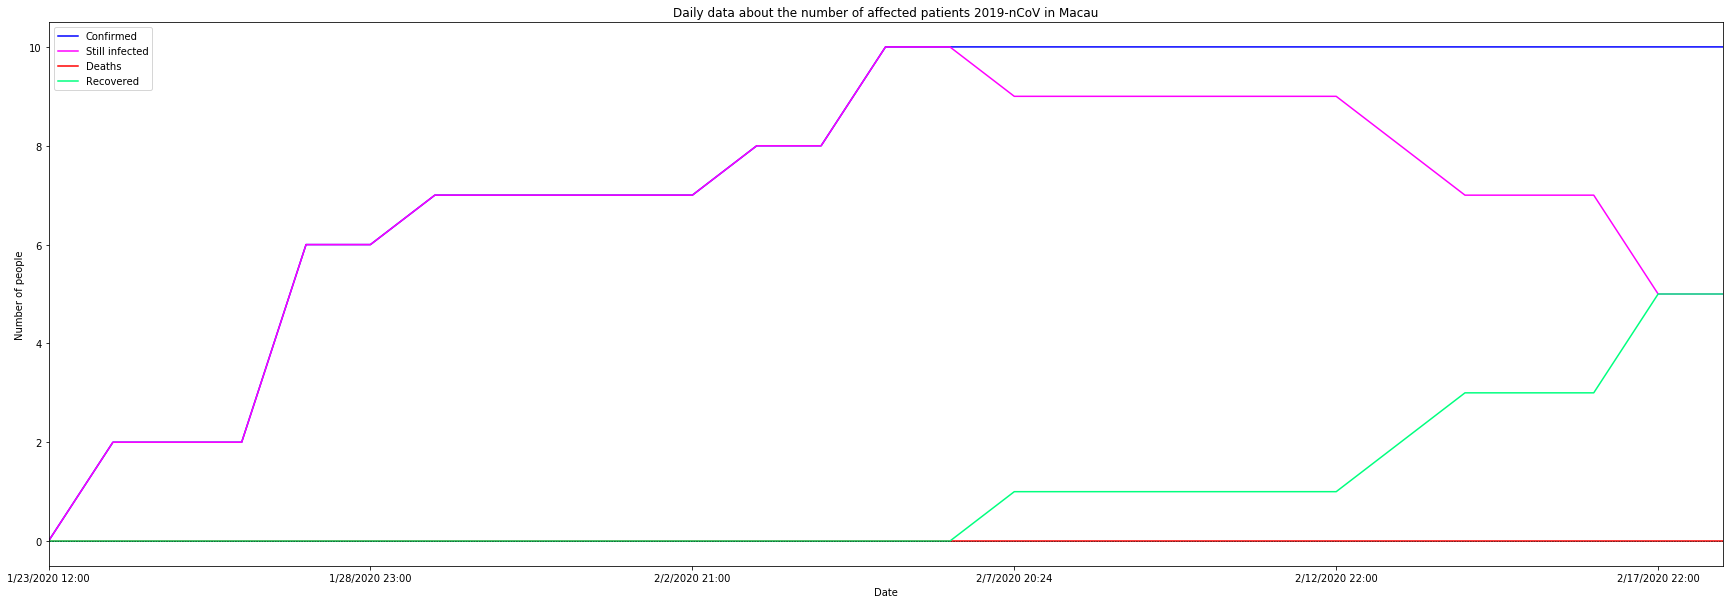

In [0]:
list_Macau = create_list_country('Macau', list_date, dict_date)
plot_line_graph(list_Macau,'Daily data about the number of affected patients 2019-nCoV in Macau')

## Taiwan

>### Data table

In [0]:
df_Taiwan = pd.DataFrame(dict_data['Taiwan'],[i+1 for i in range(len(dict_data['Taiwan']))],HEAD)
df_Taiwan

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Taiwan,1/23/2020 12:00,1,1,0,0
2,1/24/2020 12:00,Taiwan,1/24/2020 12:00,3,3,0,0
3,1/25/2020 22:00,Taiwan,1/25/2020 12:00,3,3,0,0
4,1/26/2020 23:00,Taiwan,1/26/2020 23:00,4,4,0,0
5,1/27/2020 20:30,Taiwan,1/27/2020 20:30,5,5,0,0
6,1/28/2020 23:00,Taiwan,1/28/2020 23:00,8,8,0,0
7,1/29/2020 21:00,Taiwan,1/29/2020 21:00,8,8,0,0
8,1/30/2020 21:30,Taiwan,1/30/2020 21:30,9,9,0,0
9,1/31/2020 19:00,Taiwan,1/31/2020 19:00,10,10,0,0
10,2/1/2020 23:00,Taiwan,1/31/2020 15:20,10,10,0,0


>### Data graph

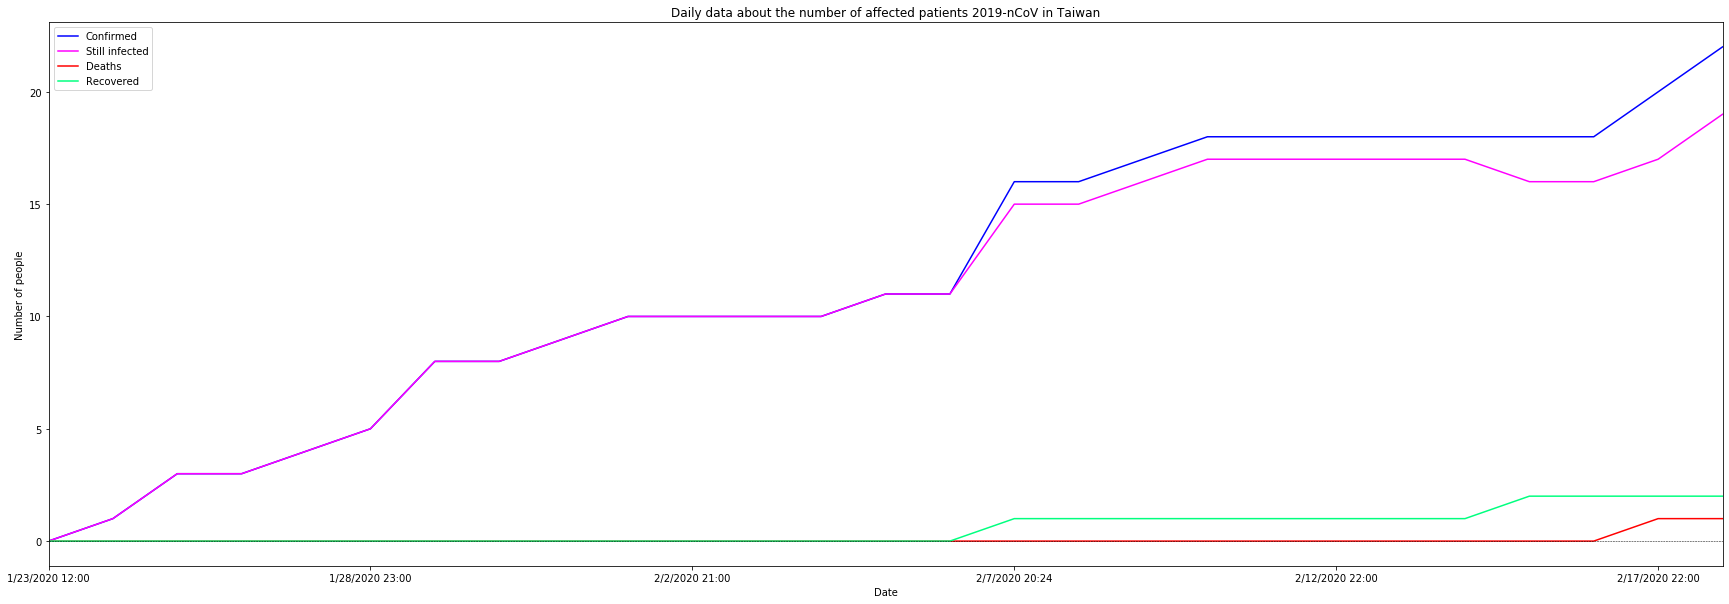

In [0]:
list_Taiwan = create_list_country('Taiwan', list_date, dict_date)
plot_line_graph(list_Taiwan,'Daily data about the number of affected patients 2019-nCoV in Taiwan')

### Singapore

>Data table

In [0]:
df_Singapore= pd.DataFrame(dict_data['Singapore'],[i+1 for i in range(len(dict_data['Singapore']))],HEAD)
df_Singapore

>Data graph

In [0]:
list_Singapore = create_list_country('Singapore', list_date, dict_date)
plot_line_graph(list_Singapore,'Daily data about the number of affected patients 2019-nCoV in Singapore')

## Philippines

>### Data table

In [0]:
df_Philippines = pd.DataFrame(dict_data['Philippines'],[i+1 for i in range(len(dict_data['Philippines']))],HEAD)
df_Philippines

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Philippines,1/23/2020 12:00,0,0,0,0
2,1/30/2020 21:30,Philippines,1/30/2020 21:30,1,1,0,0
3,1/31/2020 19:00,Philippines,1/31/2020 19:00,1,1,0,0
4,2/1/2020 23:00,Philippines,2/2/2020 3:33,2,1,1,0
5,2/2/2020 21:00,Philippines,2/2/2020 3:33,2,1,1,0
6,2/3/2020 21:40,Philippines,2/2/2020 3:33,2,1,1,0
7,2/4/2020 22:00,Philippines,2/2/2020 3:33,2,1,1,0
8,2/5/2020 12:20,Philippines,2/2/2020 3:33,2,1,1,0
9,2/6/2020 20:05,Philippines,2/2/2020 3:33,2,1,1,0
10,2/7/2020 20:24,Philippines,7/2/2020 16:43,3,2,1,0


>### Data graph

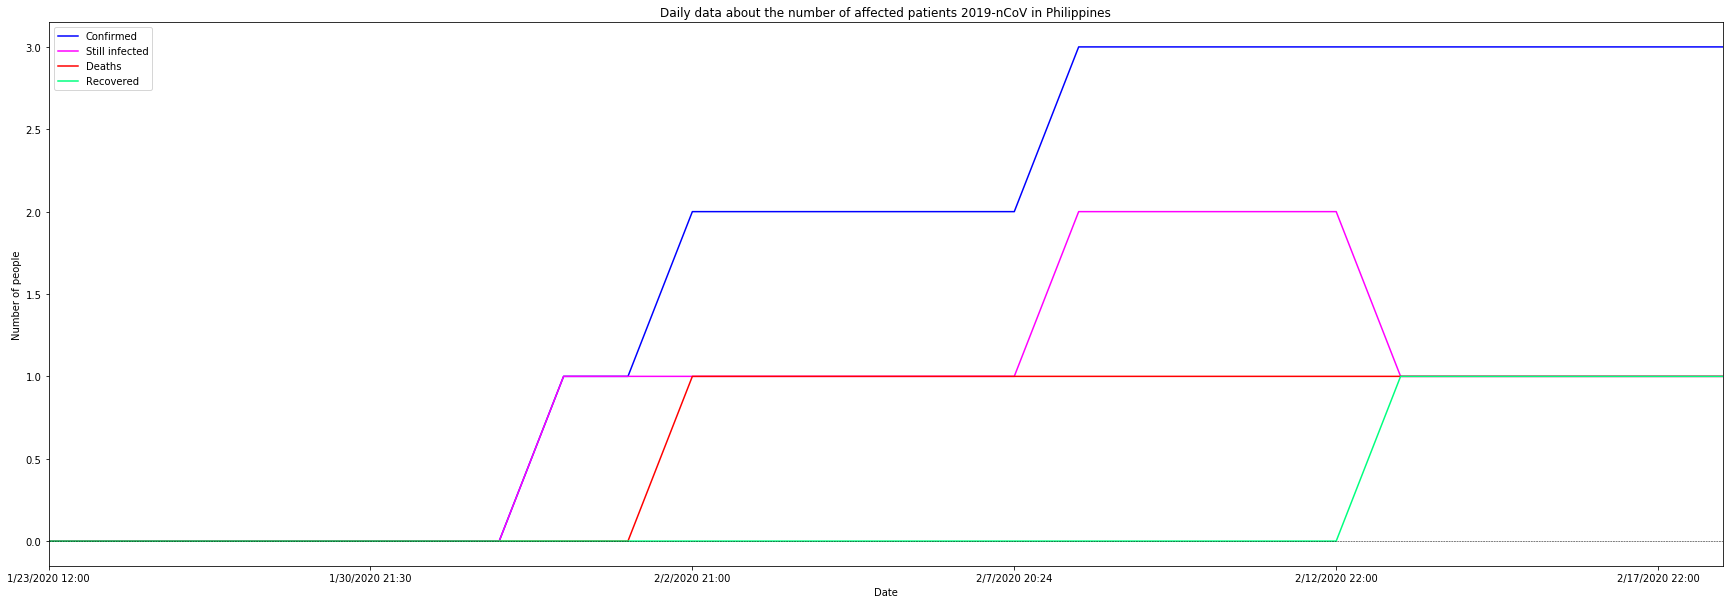

In [0]:
list_Philippines = create_list_country('Philippines', list_date, dict_date)
plot_line_graph(list_Philippines,'Daily data about the number of affected patients 2019-nCoV in Philippines')

## Malaysia

>### Data table

In [0]:
df_Malaysia = pd.DataFrame(dict_data['Malaysia'],[i+1 for i in range(len(dict_data['Malaysia']))],HEAD)
df_Malaysia

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Malaysia,1/23/2020 12:00,0,0,0,0
2,1/25/2020 22:00,Malaysia,1/25/2020 12:00,3,3,0,0
3,1/26/2020 23:00,Malaysia,1/26/2020 23:00,4,4,0,0
4,1/27/2020 20:30,Malaysia,1/27/2020 20:30,4,4,0,0
5,1/28/2020 23:00,Malaysia,1/28/2020 23:00,7,7,0,0
6,1/29/2020 21:00,Malaysia,1/29/2020 21:00,7,7,0,0
7,1/30/2020 21:30,Malaysia,1/30/2020 21:30,8,8,0,0
8,1/31/2020 19:00,Malaysia,1/31/2020 19:00,8,8,0,0
9,2/1/2020 23:00,Malaysia,1/31/2020 8:15,8,8,0,0
10,2/2/2020 21:00,Malaysia,1/31/2020 8:15,8,8,0,0


>### Data graph

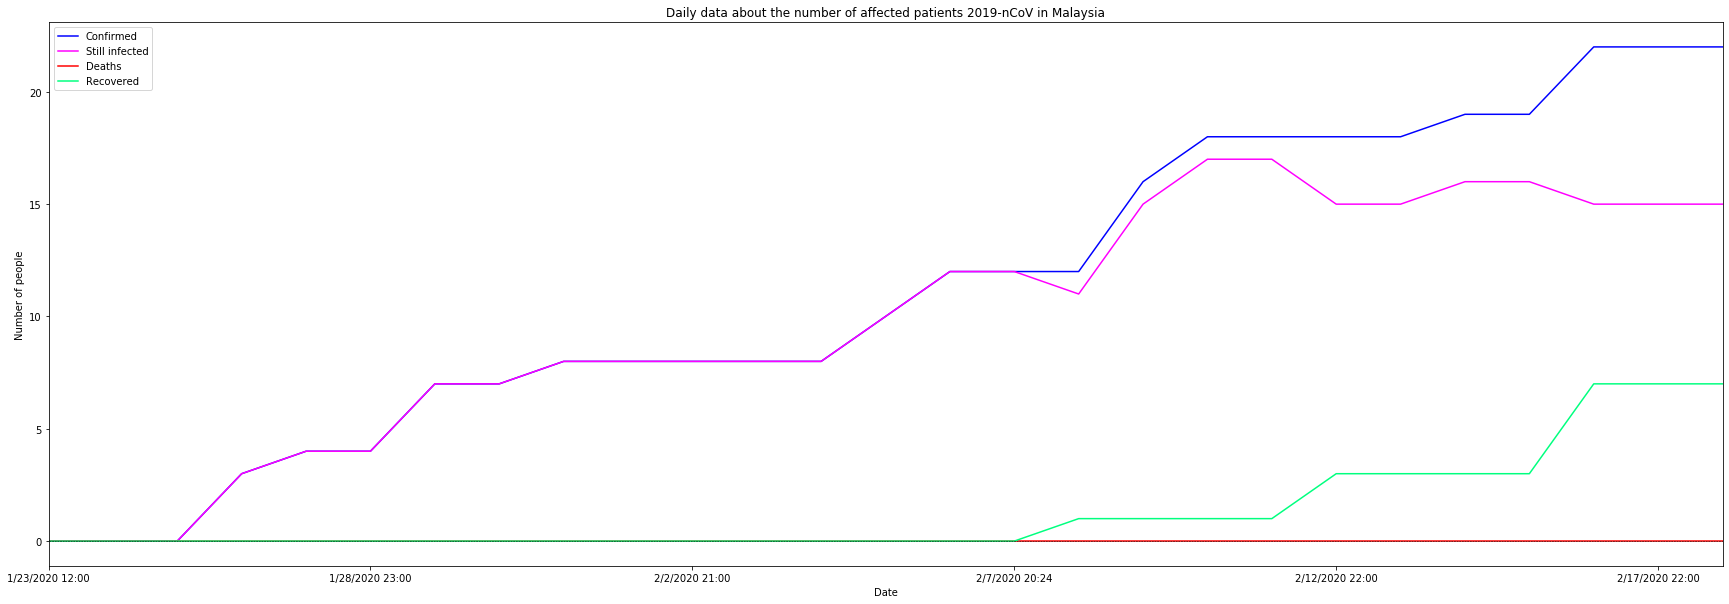

In [0]:
list_Malaysia = create_list_country('Malaysia', list_date, dict_date)
plot_line_graph(list_Malaysia,'Daily data about the number of affected patients 2019-nCoV in Malaysia')

## Vietnam

>### Data table

In [0]:
df_Vietnam = pd.DataFrame(dict_data['Vietnam'],[i+1 for i in range(len(dict_data['Vietnam']))],HEAD)
df_Vietnam

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Vietnam,1/23/2020 12:00,2,2,0,0
2,1/24/2020 12:00,Vietnam,1/24/2020 12:00,2,2,0,0
3,1/25/2020 22:00,Vietnam,1/25/2020 12:00,2,2,0,0
4,1/26/2020 23:00,Vietnam,1/26/2020 23:00,2,2,0,0
5,1/27/2020 20:30,Vietnam,1/27/2020 20:30,2,2,0,0
6,1/28/2020 23:00,Vietnam,1/28/2020 23:00,2,2,0,0
7,1/29/2020 21:00,Vietnam,1/29/2020 21:00,2,2,0,0
8,1/30/2020 21:30,Vietnam,1/30/2020 21:30,2,2,0,0
9,1/31/2020 19:00,Vietnam,1/31/2020 19:00,2,2,0,0
10,2/1/2020 23:00,Vietnam,1/2/2020 7:38,6,5,0,1


>### Data graph

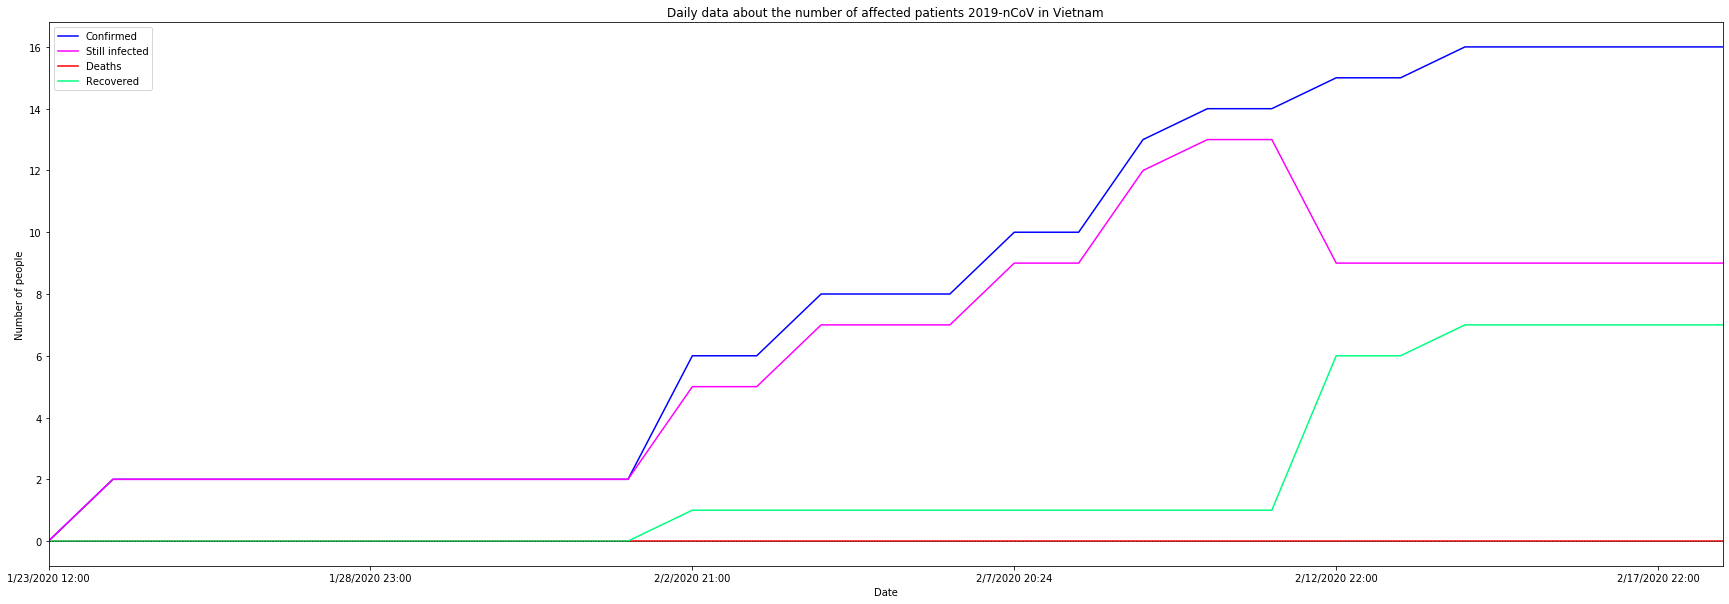

In [0]:
list_Vietnam = create_list_country('Vietnam', list_date, dict_date)
plot_line_graph(list_Vietnam,'Daily data about the number of affected patients 2019-nCoV in Vietnam')

## Australia

>### Data table

In [0]:
df_Australia = pd.DataFrame(dict_data['Australia'],[i+1 for i in range(len(dict_data['Australia']))],HEAD)
df_Australia

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Australia,1/23/2020 12:00,0,0,0,0
2,1/25/2020 22:00,Australia,1/25/2020 12:00,4,4,0,0
3,1/26/2020 23:00,Australia,1/26/2020 23:00,4,4,0,0
4,1/27/2020 20:30,Australia,1/27/2020 20:30,5,5,0,0
5,1/28/2020 23:00,Australia,1/28/2020 23:00,5,5,0,0
6,1/29/2020 21:00,Australia,1/29/2020 21:00,7,7,0,0
7,1/30/2020 21:30,Australia,1/30/2020 21:30,9,7,0,2
8,1/31/2020 19:00,Australia,1/31/2020 19:00,9,7,0,2
9,2/1/2020 23:00,Australia,1/2/2020 18:12,12,10,0,2
10,2/2/2020 21:00,Australia,2/2/2020 22:33,12,10,0,2


>### Data graph

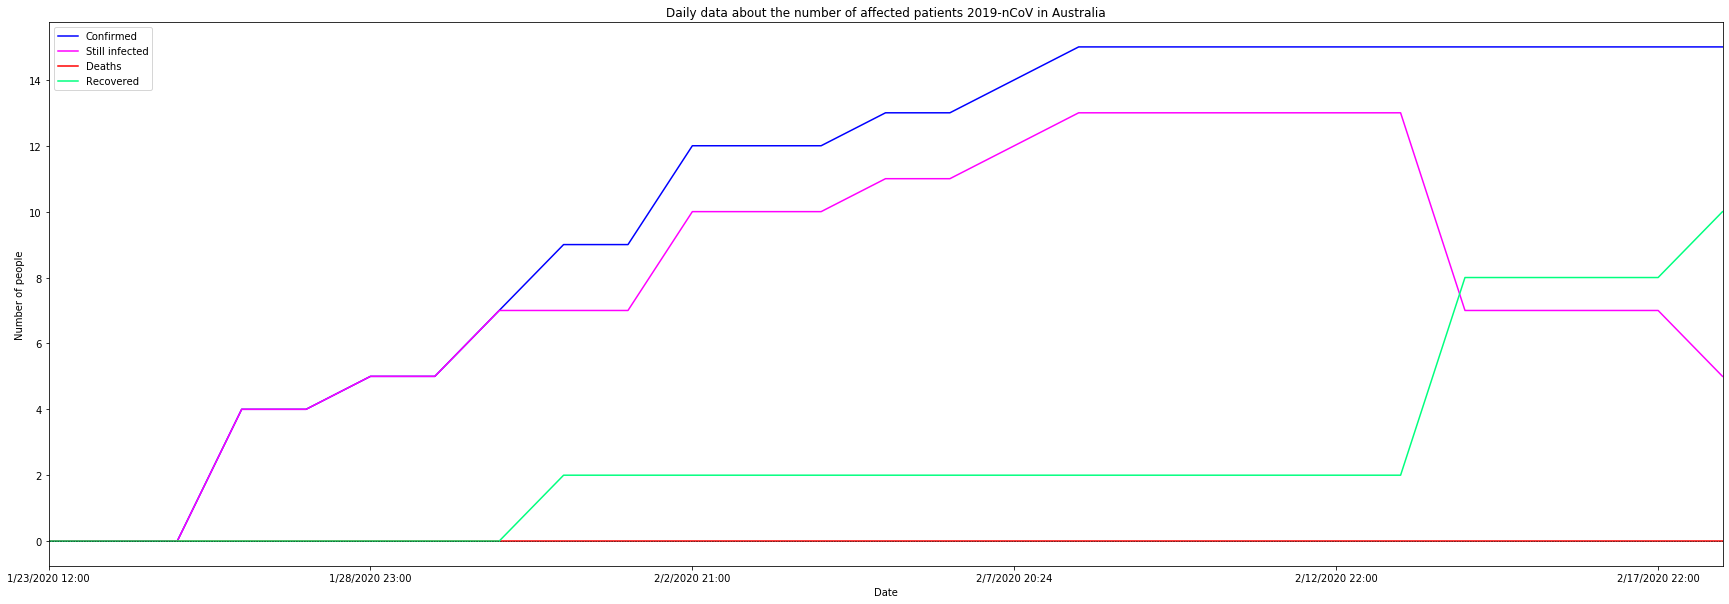

In [0]:
list_Australia = create_list_country('Australia', list_date, dict_date)
plot_line_graph(list_Australia,'Daily data about the number of affected patients 2019-nCoV in Australia')

## Mexico

>### Data table

In [0]:
df_Mexico = pd.DataFrame(dict_data['Mexico'],[i+1 for i in range(len(dict_data['Mexico']))],HEAD)
df_Mexico

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Mexico,1/23/2020 12:00,0,0,0,0


>### Data graph

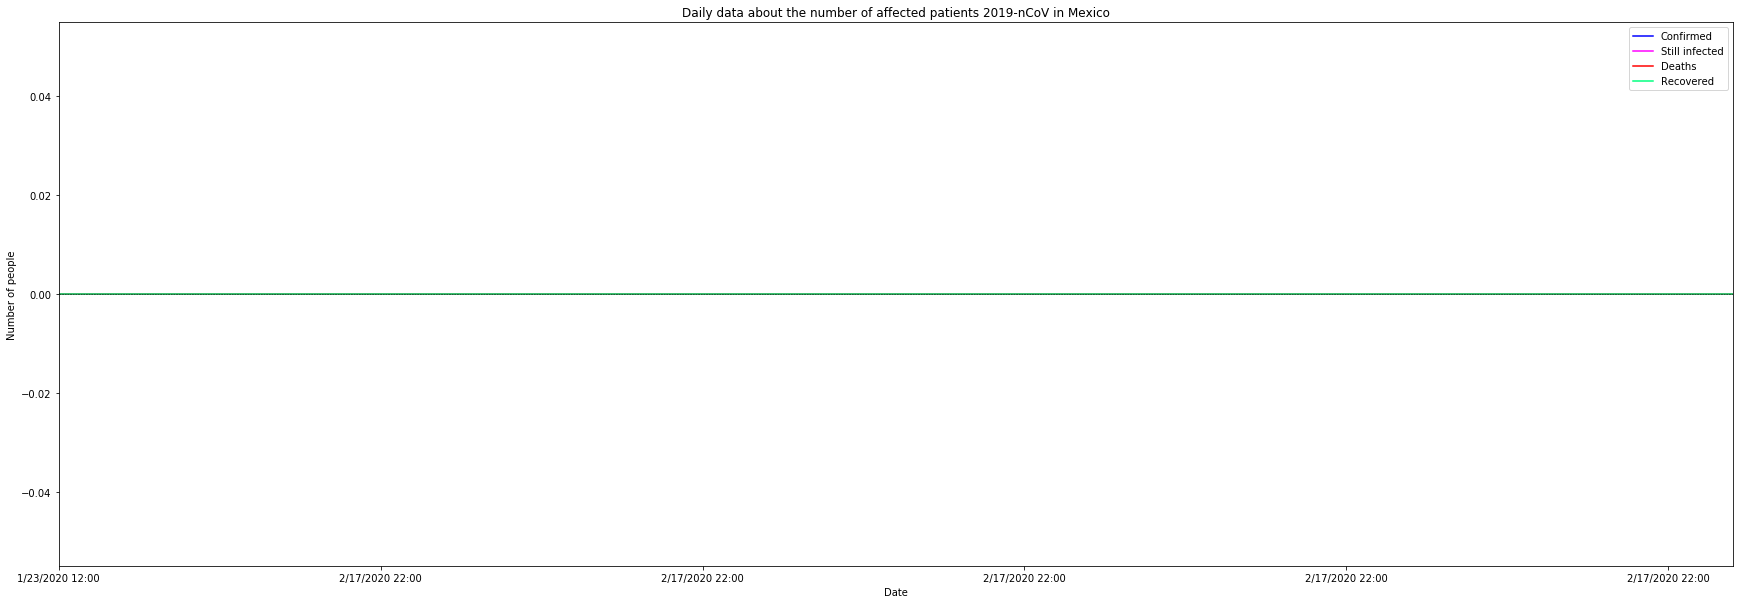

In [0]:
list_Mexico = create_list_country('Mexico', list_date, dict_date)
plot_line_graph(list_Mexico,'Daily data about the number of affected patients 2019-nCoV in Mexico')

## Brazil

>### Data table

In [0]:
df_Brazil = pd.DataFrame(dict_data['Brazil'],[i+1 for i in range(len(dict_data['Brazil']))],HEAD)
df_Brazil

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/23/2020 12:00,Brazil,1/23/2020 12:00,0,0,0,0


>### Data graph

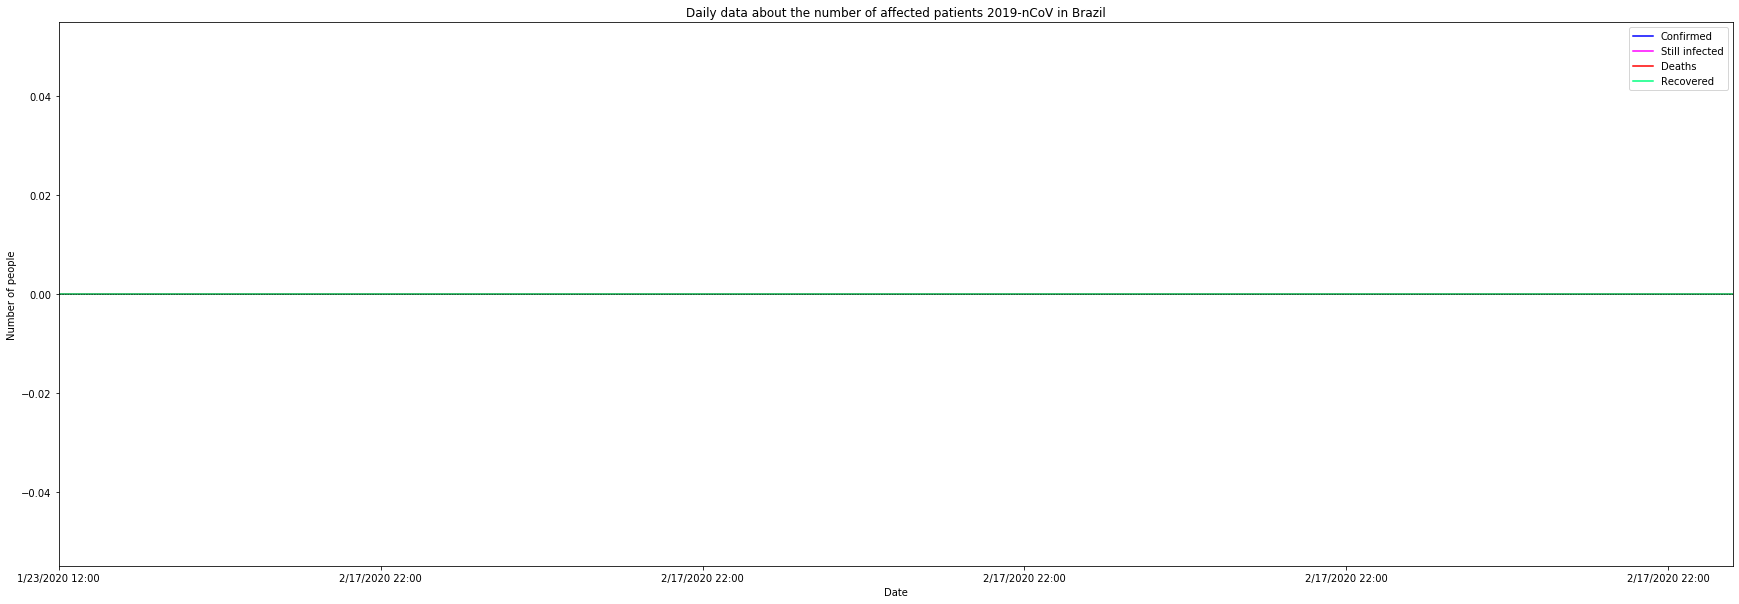

In [0]:
list_Brazil = create_list_country('Brazil', list_date, dict_date)
plot_line_graph(list_Brazil,'Daily data about the number of affected patients 2019-nCoV in Brazil')

## France

>### Data table

In [0]:
df_France= pd.DataFrame(dict_data['France'],[i+1 for i in range(len(dict_data['France']))],HEAD)
df_France

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/24/2020 12:00,France,1/24/2020 16:00,2,2,0,0
2,1/25/2020 22:00,France,1/25/2020 12:00,3,3,0,0
3,1/26/2020 23:00,France,1/26/2020 23:00,3,3,0,0
4,1/27/2020 20:30,France,1/27/2020 20:30,3,3,0,0
5,1/28/2020 23:00,France,1/28/2020 23:00,4,4,0,0
6,1/29/2020 21:00,France,1/29/2020 21:00,5,5,0,0
7,1/30/2020 21:30,France,1/30/2020 21:30,5,5,0,0
8,1/31/2020 19:00,France,1/31/2020 19:00,6,6,0,0
9,2/1/2020 23:00,France,1/2/2020 1:52,6,6,0,0
10,2/2/2020 21:00,France,1/2/2020 1:52,6,6,0,0


>### Data graph

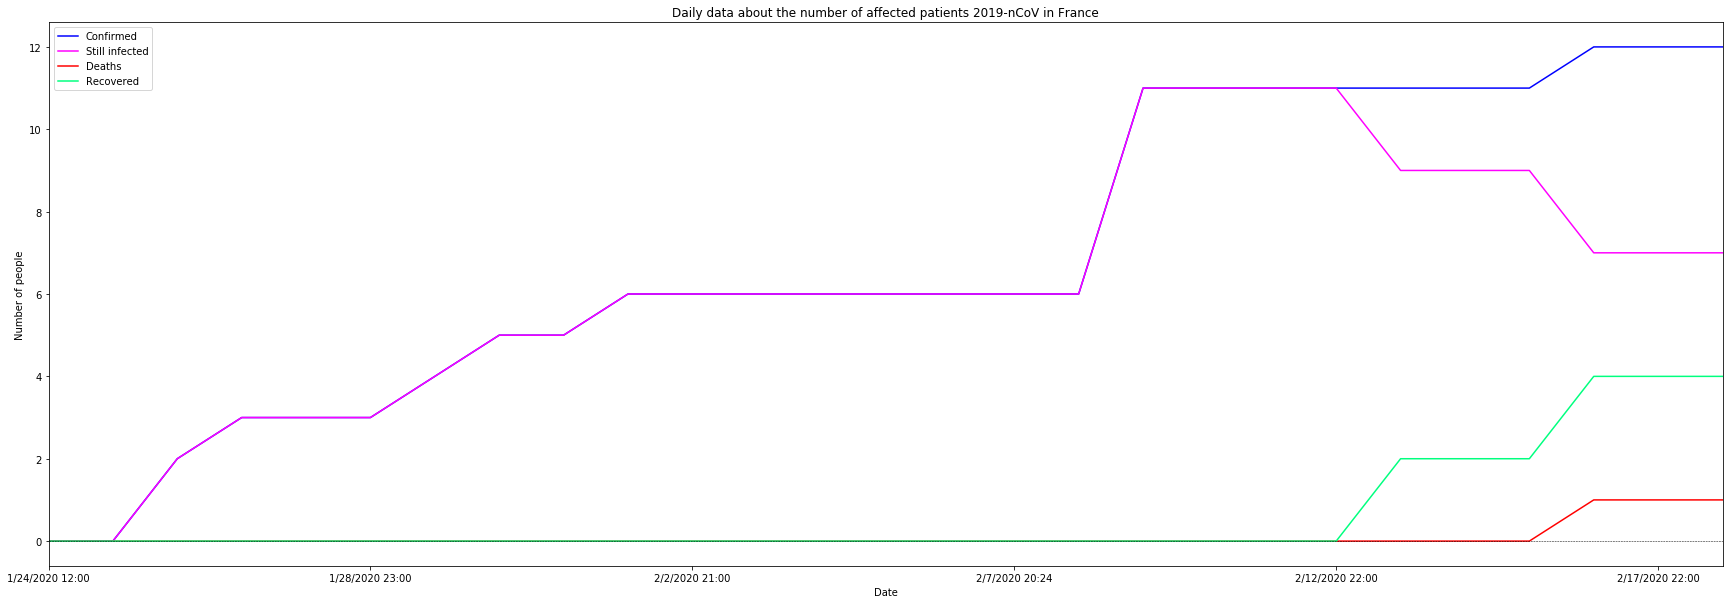

In [0]:
list_France = create_list_country('France', list_date, dict_date)
plot_line_graph(list_France,'Daily data about the number of affected patients 2019-nCoV in France')

## Nepal

>### Data table


In [0]:
df_Nepal = pd.DataFrame(dict_data['Nepal'],[i+1 for i in range(len(dict_data['Nepal']))],HEAD)
df_Nepal

>### Data graph

In [0]:
list_Nepal	= create_list_country('Nepal', list_date, dict_date)
plot_line_graph(list_Nepal,'Daily data about the number of affected patients 2019-nCoV in Nepal')

## Canada

>### Data table

In [0]:
df_Canada = pd.DataFrame(dict_data['Canada'],[i+1 for i in range(len(dict_data['Canada']))],HEAD)
df_Canada

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/26/2020 23:00,Canada,1/26/2020 23:00,0,0,0,0
2,1/27/2020 20:30,Canada,1/27/2020 20:30,0,0,0,0
3,1/28/2020 23:00,Canada,1/28/2020 23:00,1,1,0,0
4,1/29/2020 21:00,Canada,1/29/2020 21:00,1,1,0,0
5,1/30/2020 21:30,Canada,1/30/2020 21:30,1,1,0,0
6,1/31/2020 19:00,Canada,1/31/2020 19:00,1,1,0,0
7,2/1/2020 23:00,Canada,1/2/2020 18:12,1,1,0,0
8,2/2/2020 21:00,Canada,1/2/2020 18:12,1,1,0,0
9,2/3/2020 21:40,Canada,4/2/2020 0:03,4,4,0,0
10,2/4/2020 22:00,Canada,4/2/2020 0:03,4,4,0,0


>### Data graph

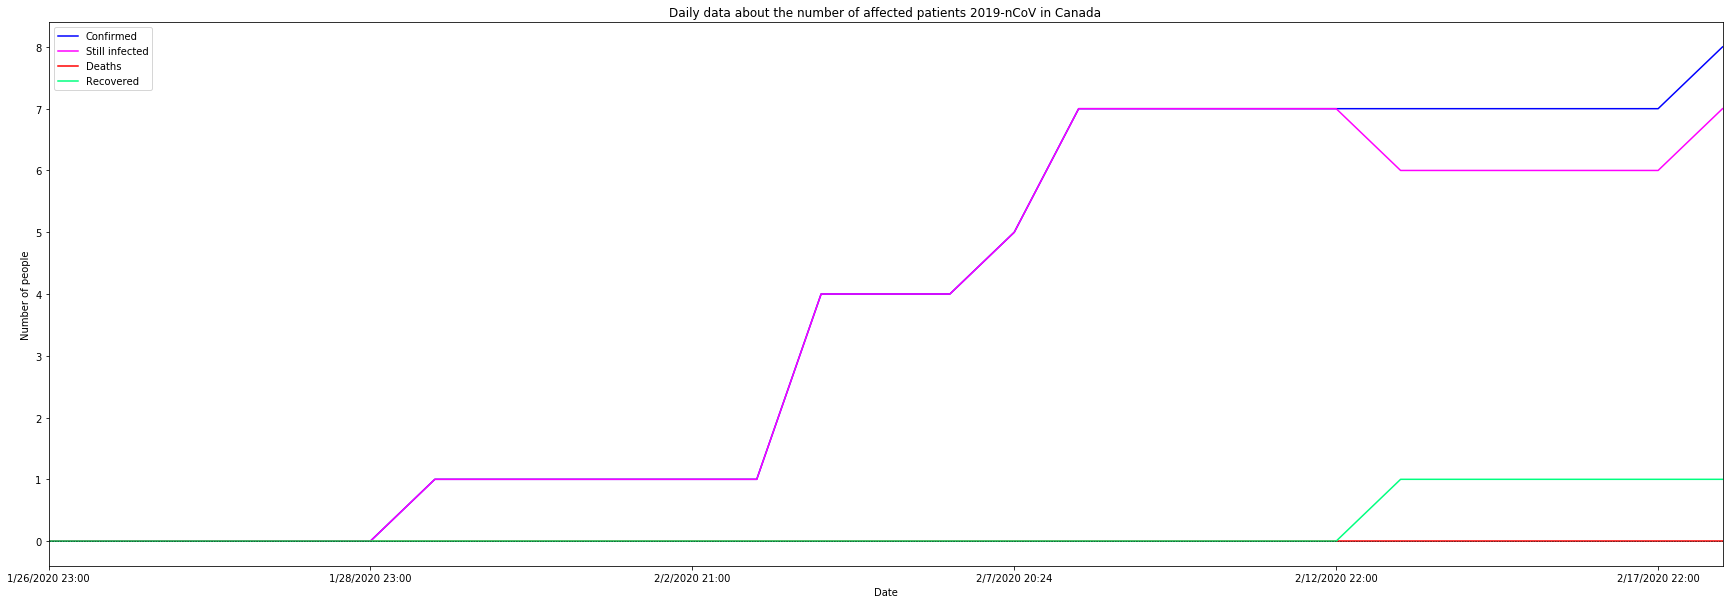

In [0]:
list_Canada = create_list_country('Canada', list_date, dict_date)
plot_line_graph(list_Canada,'Daily data about the number of affected patients 2019-nCoV in Canada')

## Cambodia

>### Data table

In [0]:
df_Cambodia= pd.DataFrame(dict_data['Cambodia'],[i+1 for i in range(len(dict_data['Cambodia']))],HEAD)
df_Cambodia

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/27/2020 20:30,Cambodia,1/27/2020 20:30,1,1,0,0
2,1/28/2020 23:00,Cambodia,1/28/2020 23:00,1,1,0,0
3,1/29/2020 21:00,Cambodia,1/29/2020 21:00,1,1,0,0
4,1/30/2020 21:30,Cambodia,1/30/2020 21:30,1,1,0,0
5,1/31/2020 19:00,Cambodia,1/31/2020 19:00,1,1,0,0
6,2/1/2020 23:00,Cambodia,1/31/2020 8:15,1,1,0,0
7,2/2/2020 21:00,Cambodia,1/31/2020 8:15,1,1,0,0
8,2/3/2020 21:40,Cambodia,1/31/2020 8:15,1,1,0,0
9,2/4/2020 22:00,Cambodia,1/31/2020 8:15,1,1,0,0
10,2/5/2020 12:20,Cambodia,1/31/2020 8:15,1,1,0,0


>### Data graph

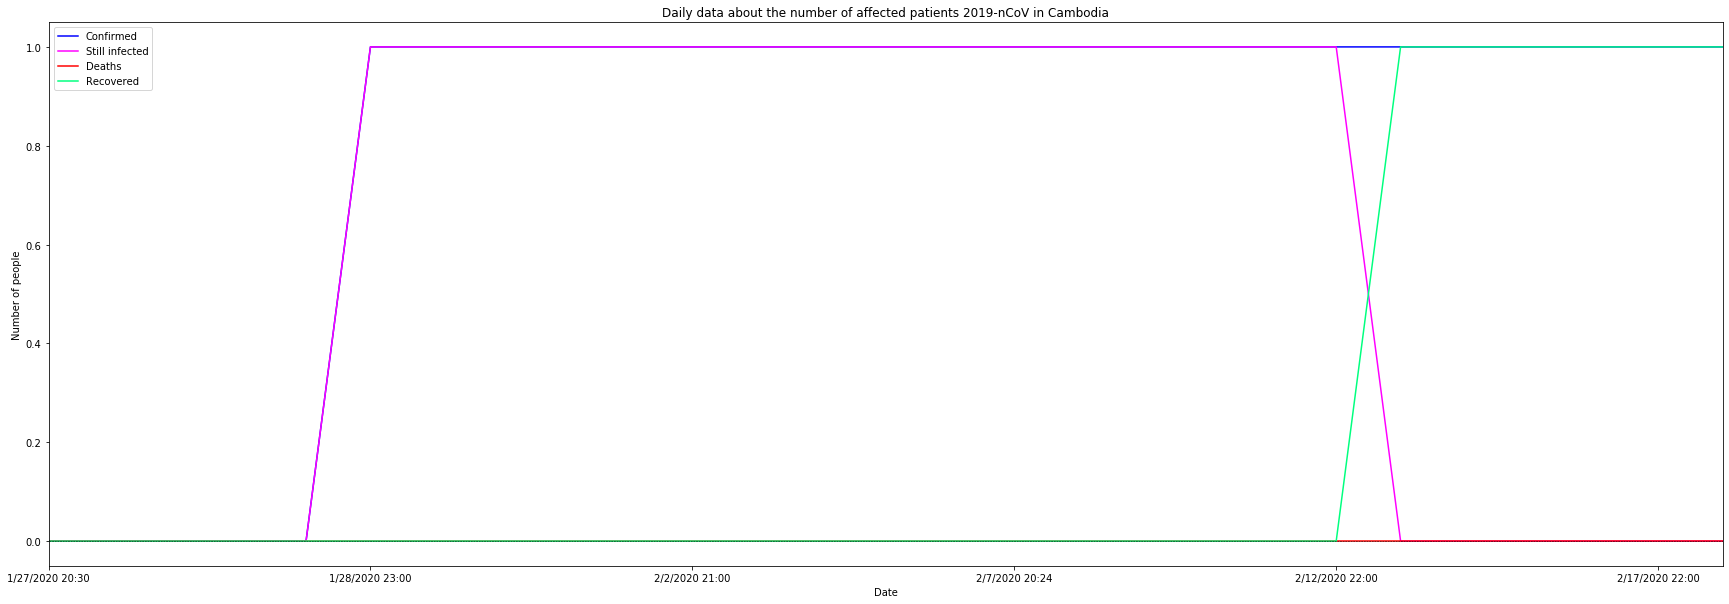

In [0]:
list_Cambodia = create_list_country('Cambodia', list_date, dict_date)
plot_line_graph(list_Cambodia,'Daily data about the number of affected patients 2019-nCoV in Cambodia')

## Sri Lanka

>### Data table

In [0]:
df_Sri_Lanka= pd.DataFrame(dict_data['Sri Lanka'],[i+1 for i in range(len(dict_data['Sri Lanka']))],HEAD)
df_Sri_Lanka

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/27/2020 20:30,Sri Lanka,1/27/2020 20:30,1,1,0,0
2,1/28/2020 23:00,Sri Lanka,1/28/2020 23:00,1,1,0,0
3,1/29/2020 21:00,Sri Lanka,1/29/2020 21:00,1,1,0,0
4,1/30/2020 21:30,Sri Lanka,1/30/2020 21:30,1,1,0,0
5,1/31/2020 19:00,Sri Lanka,1/31/2020 19:00,1,1,0,0
6,2/1/2020 23:00,Sri Lanka,1/31/2020 8:15,1,1,0,0
7,2/2/2020 21:00,Sri Lanka,1/31/2020 8:15,1,1,0,0
8,2/3/2020 21:40,Sri Lanka,1/31/2020 8:15,1,1,0,0
9,2/4/2020 22:00,Sri Lanka,1/31/2020 8:15,1,1,0,0
10,2/5/2020 12:20,Sri Lanka,1/31/2020 8:15,1,1,0,0


>### Data graph

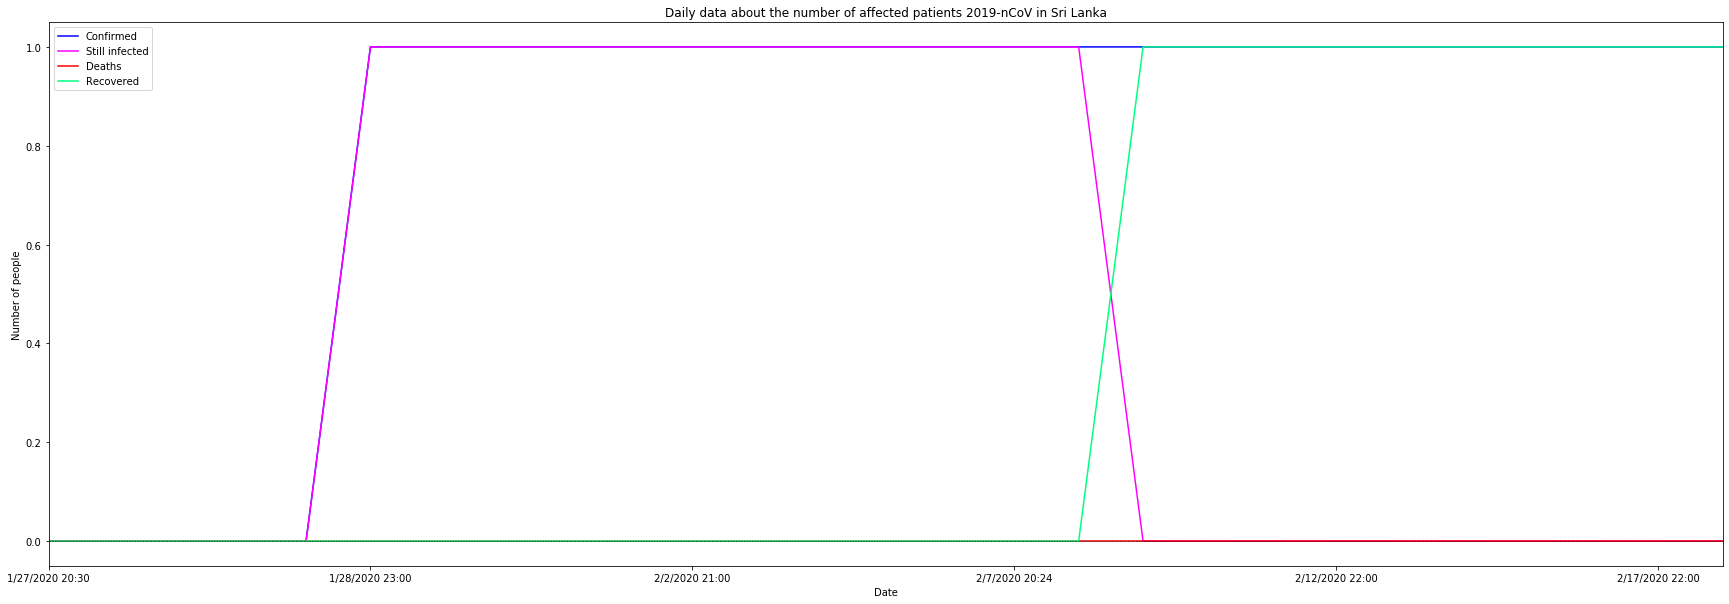

In [0]:
list_Sri_Lanka = create_list_country('Sri Lanka', list_date, dict_date)
plot_line_graph(list_Sri_Lanka,'Daily data about the number of affected patients 2019-nCoV in Sri Lanka')

## Ivory Coast

>### Data table

In [0]:
df_Ivory_Coast= pd.DataFrame(dict_data['Ivory Coast'],[i+1 for i in range(len(dict_data['Ivory Coast']))],HEAD)
df_Ivory_Coast

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/27/2020 20:30,Ivory Coast,1/27/2020 20:30,0,0,0,0


>### Data graph

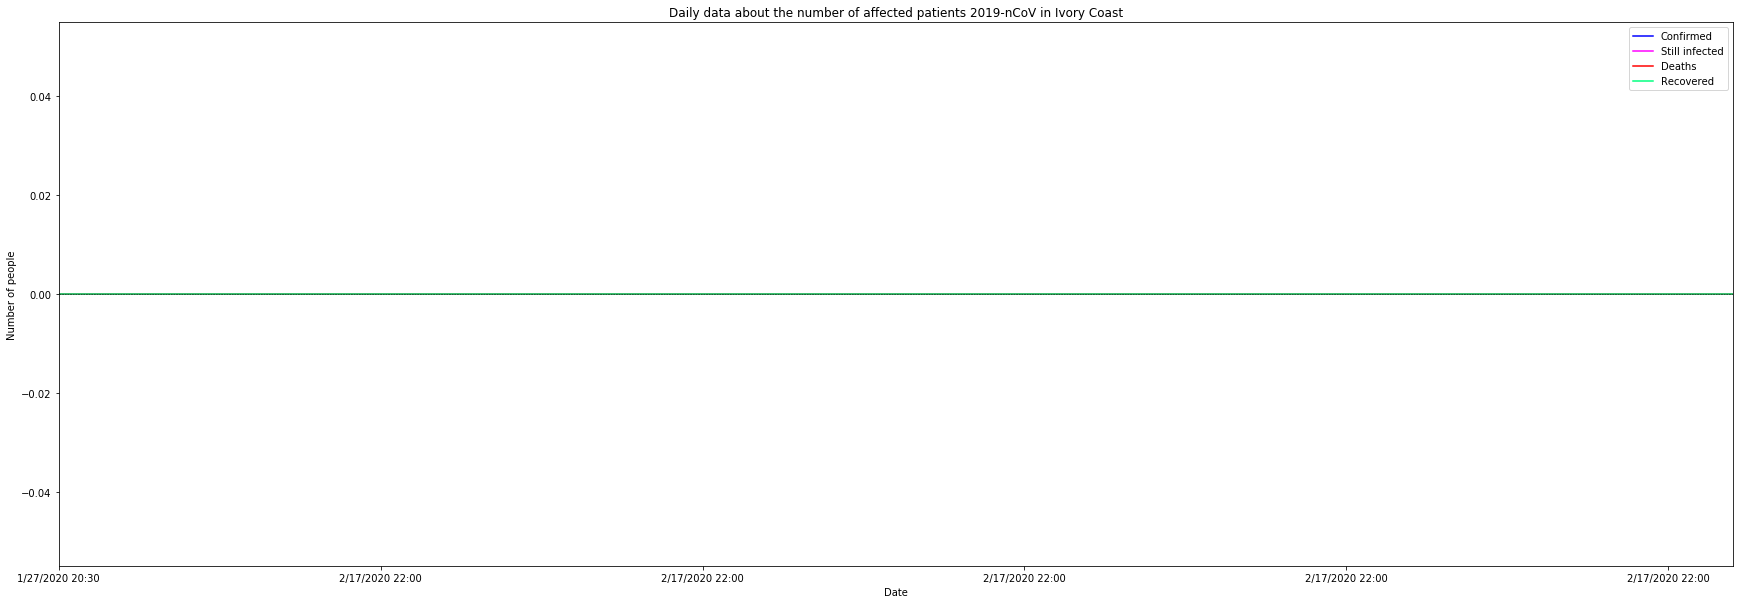

In [0]:
list_Ivory_Coast = create_list_country('Ivory Coast', list_date, dict_date)
plot_line_graph(list_Ivory_Coast,'Daily data about the number of affected patients 2019-nCoV in Ivory Coast')

## Germany

>### Data table

In [0]:
df_Germany= pd.DataFrame(dict_data['Germany'],[i+1 for i in range(len(dict_data['Germany']))],HEAD)
df_Germany

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/27/2020 20:30,Germany,1/27/2020 20:30,1,1,0,0
2,1/28/2020 23:00,Germany,1/28/2020 23:00,4,4,0,0
3,1/29/2020 21:00,Germany,1/29/2020 21:00,4,4,0,0
4,1/30/2020 21:30,Germany,1/30/2020 21:30,4,4,0,0
5,1/31/2020 19:00,Germany,1/31/2020 19:00,7,7,0,0
6,2/1/2020 23:00,Germany,1/2/2020 23:33,8,8,0,0
7,2/2/2020 21:00,Germany,2/2/2020 18:03,10,10,0,0
8,2/3/2020 21:40,Germany,3/2/2020 20:53,12,12,0,0
9,2/4/2020 22:00,Germany,3/2/2020 20:53,12,12,0,0
10,2/5/2020 12:20,Germany,3/2/2020 20:53,12,12,0,0


>### Data graph

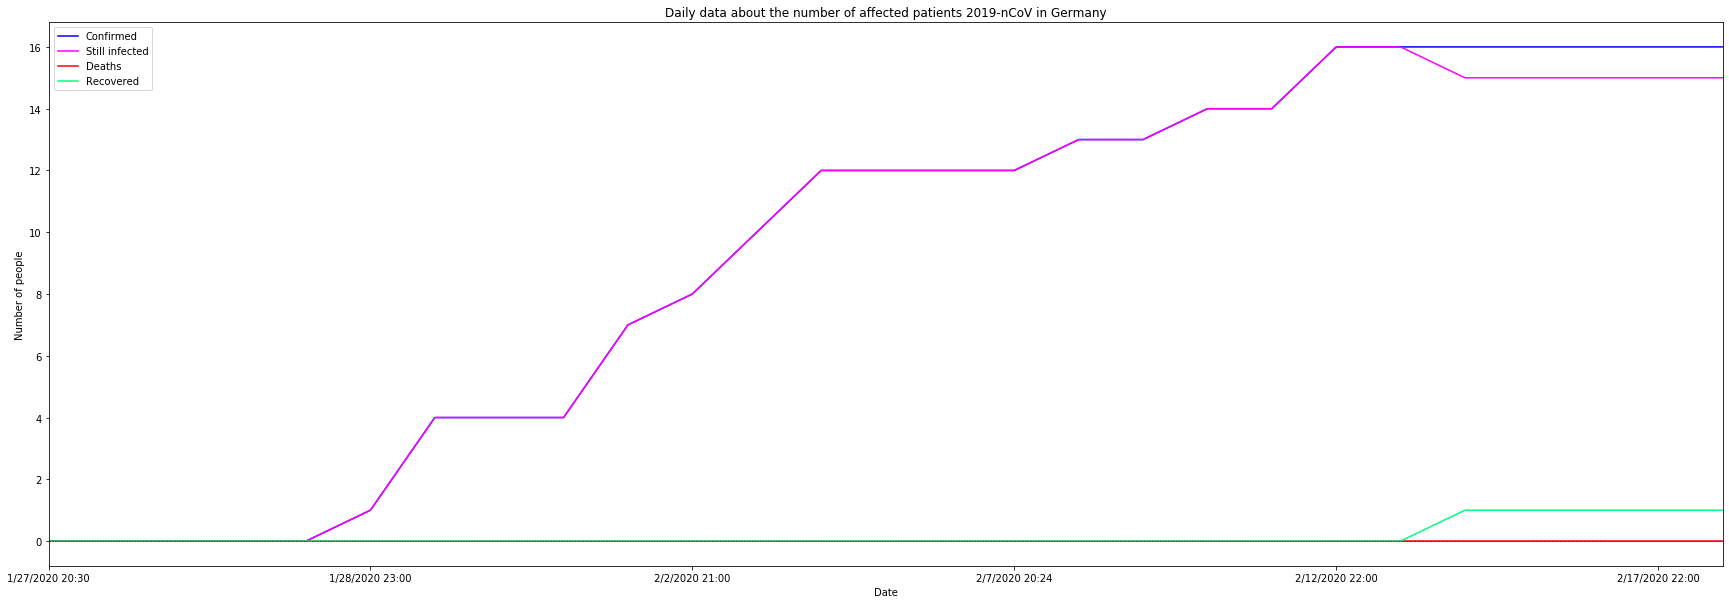

In [0]:
list_Germany = create_list_country('Germany', list_date, dict_date)
plot_line_graph(list_Germany,'Daily data about the number of affected patients 2019-nCoV in Germany')

## Finland

>### Data table

In [0]:
df_Finland= pd.DataFrame(dict_data['Finland'],[i+1 for i in range(len(dict_data['Finland']))],HEAD)
df_Finland

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/29/2020 21:00,Finland,1/29/2020 21:00,1,1,0,0
2,1/30/2020 21:30,Finland,1/30/2020 21:30,1,1,0,0
3,1/31/2020 19:00,Finland,1/31/2020 19:00,1,1,0,0
4,2/1/2020 23:00,Finland,1/31/2020 8:15,1,1,0,0
5,2/2/2020 21:00,Finland,1/31/2020 8:15,1,1,0,0
6,2/3/2020 21:40,Finland,1/31/2020 8:15,1,1,0,0
7,2/4/2020 22:00,Finland,1/31/2020 8:15,1,1,0,0
8,2/5/2020 12:20,Finland,1/31/2020 8:15,1,1,0,0
9,2/6/2020 20:05,Finland,1/31/2020 8:15,1,1,0,0
10,2/7/2020 20:24,Finland,1/31/2020 8:15,1,1,0,0


>### Data graph

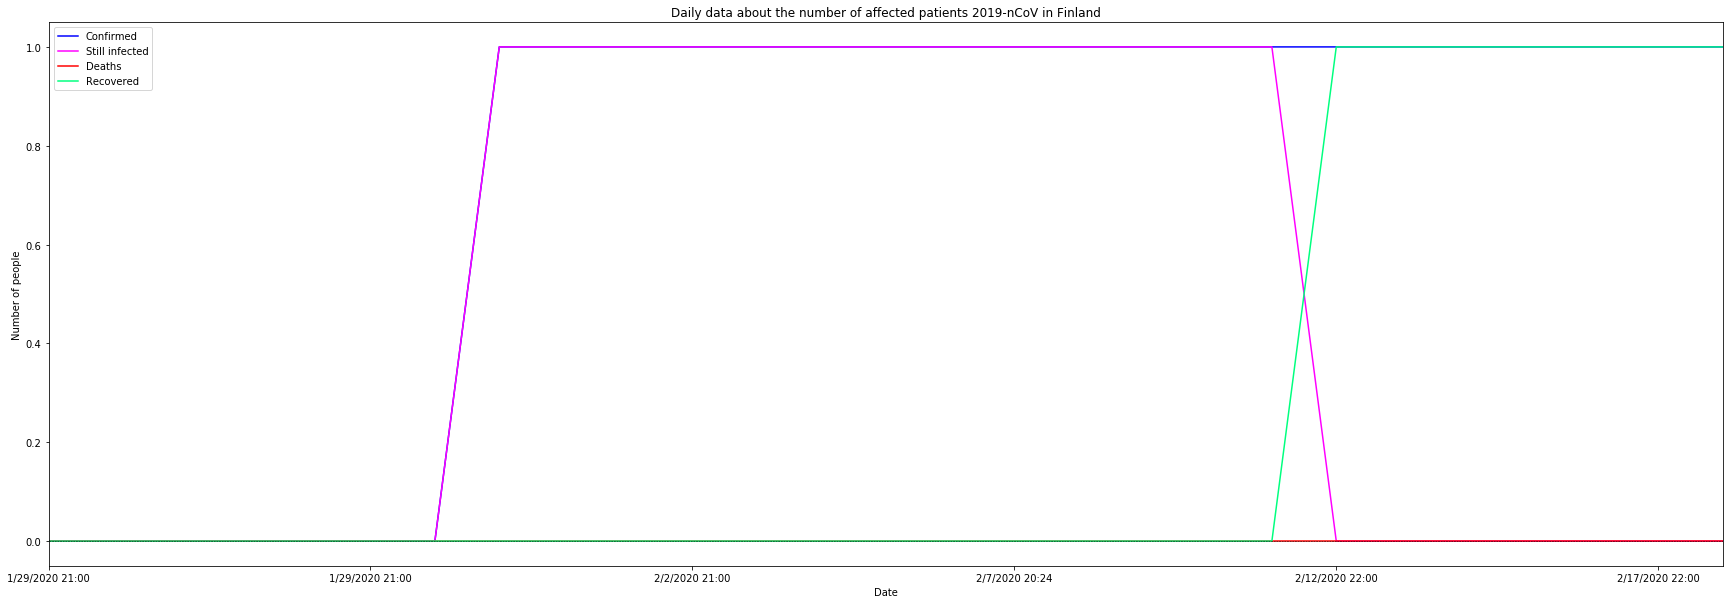

In [0]:
list_Finland = create_list_country('Finland', list_date, dict_date)
plot_line_graph(list_Finland,'Daily data about the number of affected patients 2019-nCoV in Finland')

## United Arab Emirates

>### Data table

In [0]:
df_United_Arab_Emirates= pd.DataFrame(dict_data['United Arab Emirates'],[i+1 for i in range(len(dict_data['United Arab Emirates']))],HEAD)
df_United_Arab_Emirates

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/29/2020 21:00,United Arab Emirates,1/29/2020 21:00,4,4,0,0
2,1/30/2020 21:30,United Arab Emirates,1/30/2020 21:30,4,4,0,0
3,1/31/2020 19:00,United Arab Emirates,1/31/2020 19:00,4,4,0,0
4,2/1/2020 23:00,United Arab Emirates,1/31/2020 8:15,4,4,0,0
5,2/2/2020 21:00,United Arab Emirates,2/2/2020 5:43,5,5,0,0
6,2/3/2020 21:40,United Arab Emirates,2/2/2020 5:43,5,5,0,0
7,2/4/2020 22:00,United Arab Emirates,2/2/2020 5:43,5,5,0,0
8,2/5/2020 12:20,United Arab Emirates,2/2/2020 5:43,5,5,0,0
9,2/6/2020 20:05,United Arab Emirates,2/2/2020 5:43,5,5,0,0
10,2/7/2020 20:24,United Arab Emirates,2/2/2020 5:43,5,5,0,0


>### Data graph

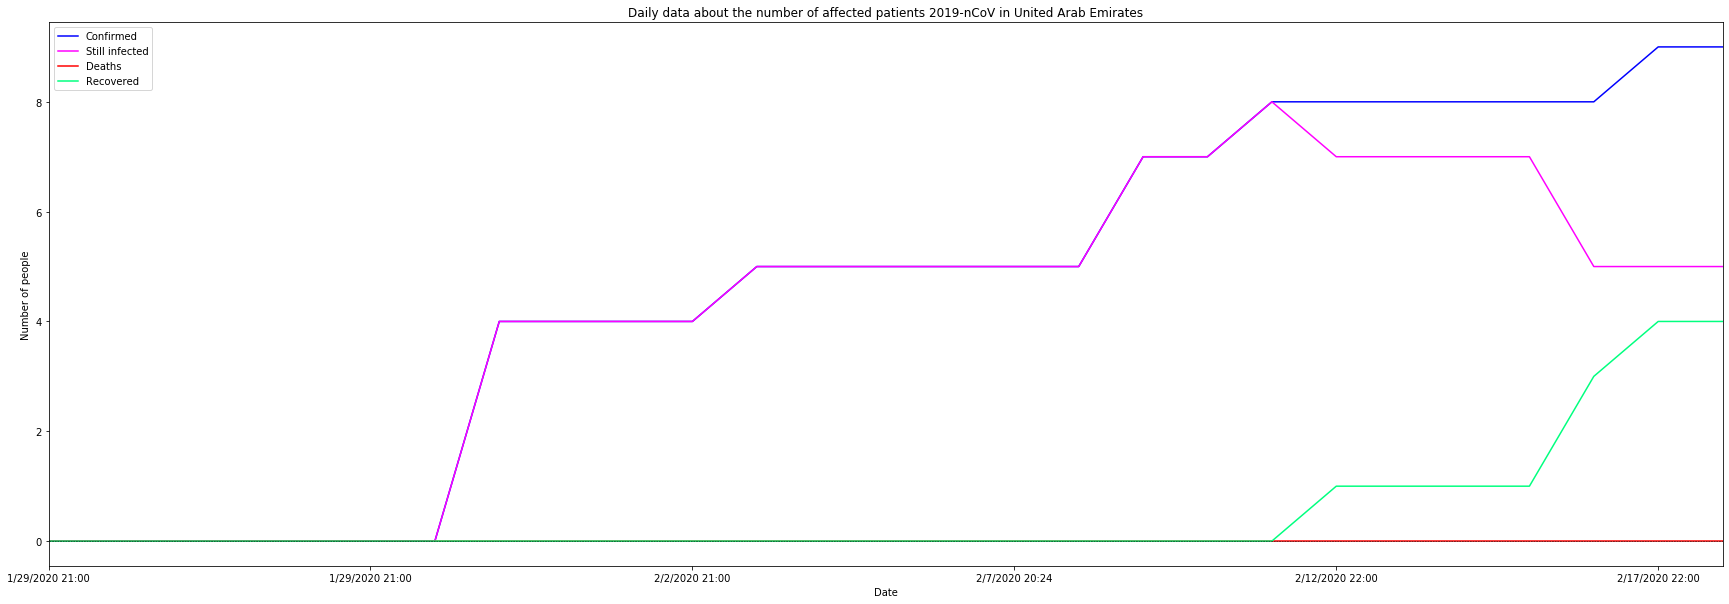

In [0]:
list_United_Arab_Emirates = create_list_country('United Arab Emirates', list_date, dict_date)
plot_line_graph(list_United_Arab_Emirates,'Daily data about the number of affected patients 2019-nCoV in United Arab Emirates')

## India

>### Data table

In [0]:
df_India= pd.DataFrame(dict_data['India'],[i+1 for i in range(len(dict_data['India']))],HEAD)
df_India

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/30/2020 21:30,India,1/30/2020 21:30,1,1,0,0
2,1/31/2020 19:00,India,1/31/2020 19:00,1,1,0,0
3,2/1/2020 23:00,India,1/31/2020 8:15,1,1,0,0
4,2/2/2020 21:00,India,2/2/2020 6:03,2,2,0,0
5,2/3/2020 21:40,India,3/2/2020 21:43,3,3,0,0
6,2/4/2020 22:00,India,3/2/2020 21:43,3,3,0,0
7,2/5/2020 12:20,India,3/2/2020 21:43,3,3,0,0
8,2/6/2020 20:05,India,3/2/2020 21:43,3,3,0,0
9,2/7/2020 20:24,India,3/2/2020 21:43,3,3,0,0
10,2/8/2020 23:04,India,3/2/2020 21:43,3,3,0,0


>### Data graph

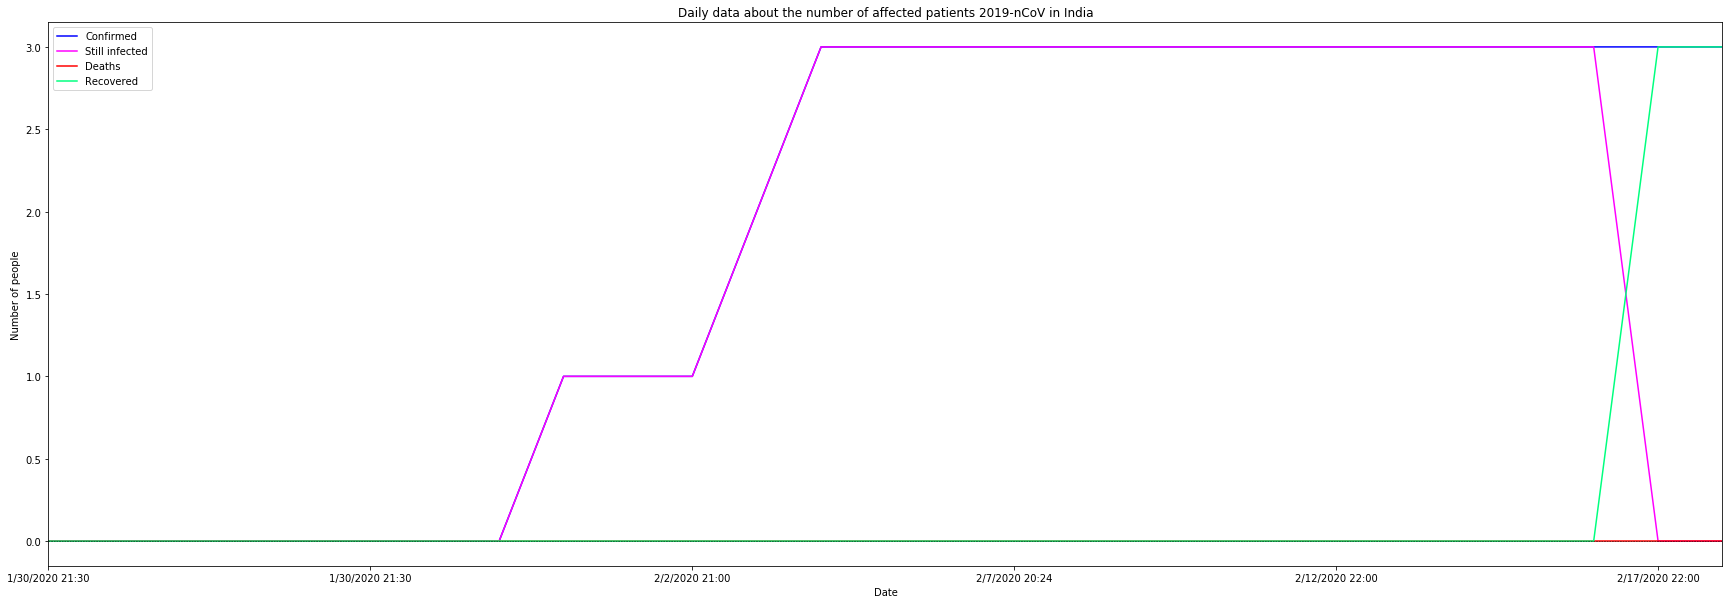

In [0]:
list_India = create_list_country('India', list_date, dict_date)
plot_line_graph(list_India,'Daily data about the number of affected patients 2019-nCoV in India')

## Italy

>### Data table

In [0]:
df_Italy= pd.DataFrame(dict_data['Italy'],[i+1 for i in range(len(dict_data['Italy']))],HEAD)
df_Italy

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/30/2020 21:30,Italy,1/30/2020 21:30,2,2,0,0
2,1/31/2020 19:00,Italy,1/31/2020 19:00,2,2,0,0
3,2/1/2020 23:00,Italy,1/31/2020 8:15,2,2,0,0
4,2/2/2020 21:00,Italy,1/31/2020 8:15,2,2,0,0
5,2/3/2020 21:40,Italy,1/31/2020 8:15,2,2,0,0
6,2/4/2020 22:00,Italy,1/31/2020 8:15,2,2,0,0
7,2/5/2020 12:20,Italy,1/31/2020 8:15,2,2,0,0
8,2/6/2020 20:05,Italy,1/31/2020 8:15,2,2,0,0
9,2/7/2020 20:24,Italy,7/2/2020 17:53,3,3,0,0
10,2/8/2020 23:04,Italy,7/2/2020 17:53,3,3,0,0


>### Data graph

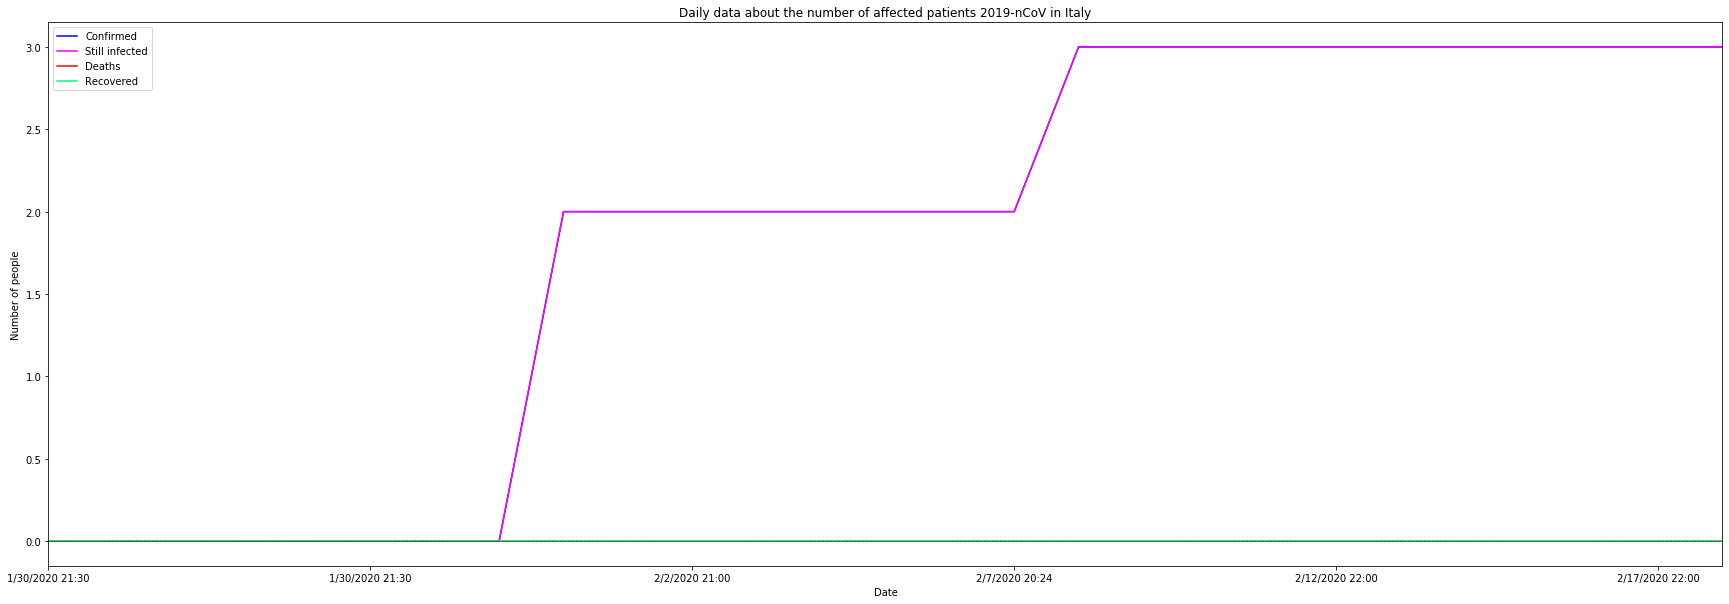

In [0]:
list_Italy = create_list_country('Italy', list_date, dict_date)
plot_line_graph(list_Italy,'Daily data about the number of affected patients 2019-nCoV in Italy')

## Sweden

>### Data table

In [0]:
df_Sweden= pd.DataFrame(dict_data['Sweden'],[i+1 for i in range(len(dict_data['Sweden']))],HEAD)
df_Sweden

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/31/2020 19:00,Sweden,1/31/2020 19:00,1,1,0,0
2,2/1/2020 23:00,Sweden,1/2/2020 2:13,1,1,0,0
3,2/2/2020 21:00,Sweden,1/2/2020 2:13,1,1,0,0
4,2/3/2020 21:40,Sweden,1/2/2020 2:13,1,1,0,0
5,2/4/2020 22:00,Sweden,1/2/2020 2:13,1,1,0,0
6,2/5/2020 12:20,Sweden,1/2/2020 2:13,1,1,0,0
7,2/6/2020 20:05,Sweden,1/2/2020 2:13,1,1,0,0
8,2/7/2020 20:24,Sweden,1/2/2020 2:13,1,1,0,0
9,2/8/2020 23:04,Sweden,1/2/2020 2:13,1,1,0,0
10,2/9/2020 23:20,Sweden,2/1/2020 2:13,1,1,0,0


>### Data graph

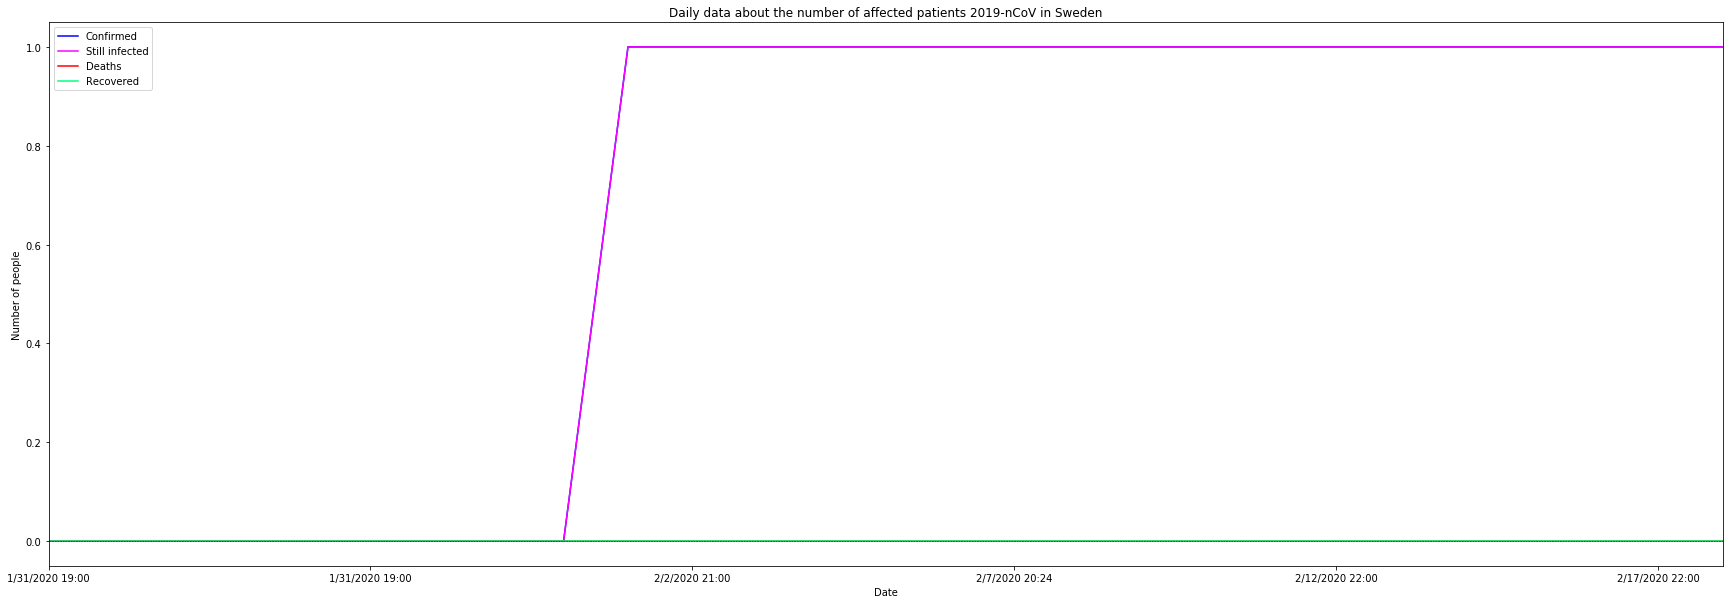

In [0]:
list_Sweden = create_list_country('Sweden', list_date, dict_date)
plot_line_graph(list_Sweden,'Daily data about the number of affected patients 2019-nCoV in Sweden')

## Russia

>### Data table

In [0]:
df_Russia= pd.DataFrame(dict_data['Russia'],[i+1 for i in range(len(dict_data['Russia']))],HEAD)
df_Russia

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/31/2020 19:00,Russia,1/31/2020 19:00,2,2,0,0
2,2/1/2020 23:00,Russia,1/31/2020 16:13,2,2,0,0
3,2/2/2020 21:00,Russia,1/31/2020 16:13,2,2,0,0
4,2/3/2020 21:40,Russia,1/31/2020 16:13,2,2,0,0
5,2/4/2020 22:00,Russia,1/31/2020 16:13,2,2,0,0
6,2/5/2020 12:20,Russia,1/31/2020 16:13,2,2,0,0
7,2/6/2020 20:05,Russia,1/31/2020 16:13,2,2,0,0
8,2/7/2020 20:24,Russia,1/31/2020 16:13,2,2,0,0
9,2/8/2020 23:04,Russia,1/31/2020 16:13,2,2,0,0
10,2/9/2020 23:20,Russia,1/31/2020 16:13,2,2,0,0


>### Data graph

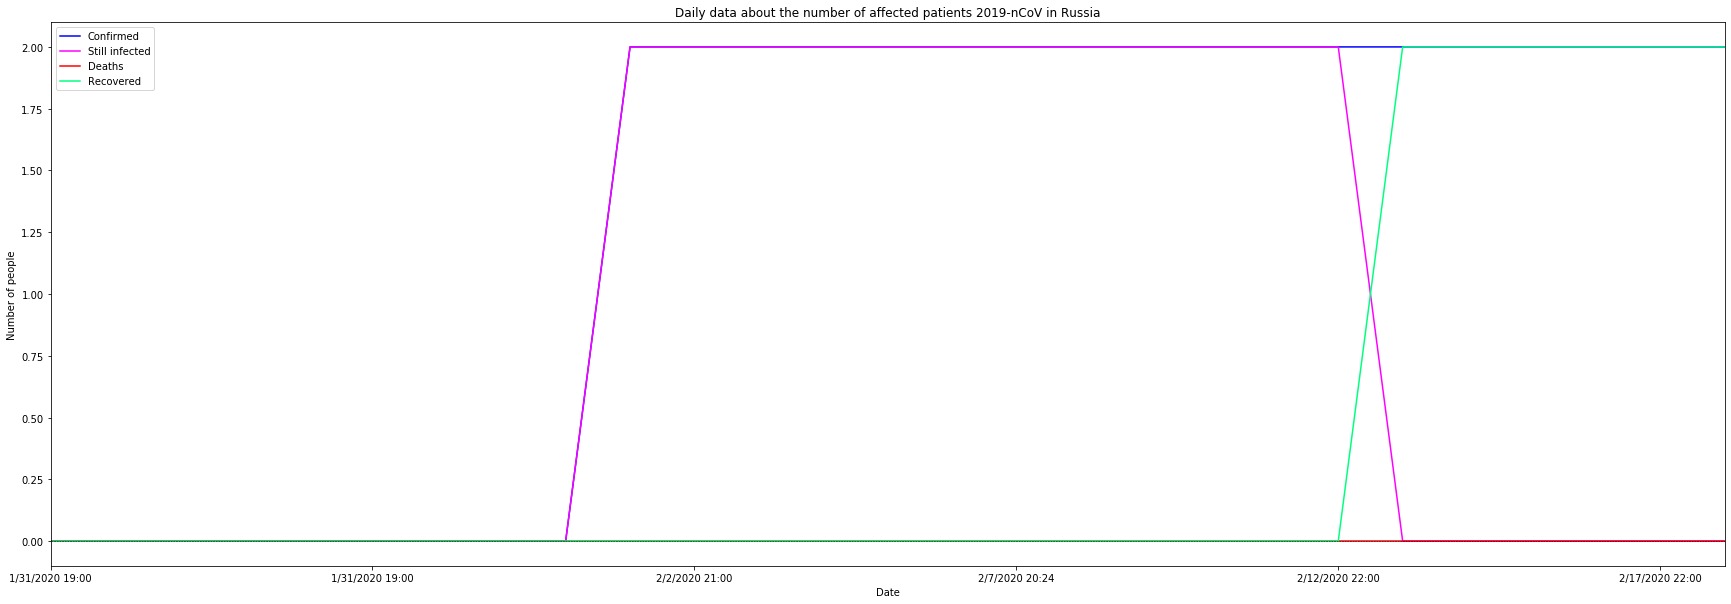

In [0]:
list_Russia = create_list_country('Russia', list_date, dict_date)
plot_line_graph(list_Russia,'Daily data about the number of affected patients 2019-nCoV in Russia')

## Spain

>### Data table

In [0]:
df_Spain= pd.DataFrame(dict_data['Spain'],[i+1 for i in range(len(dict_data['Spain']))],HEAD)
df_Spain

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/31/2020 19:00,Spain,1/31/2020 19:00,1,1,0,0
2,2/1/2020 23:00,Spain,1/2/2020 23:43,1,1,0,0
3,2/2/2020 21:00,Spain,1/2/2020 23:43,1,1,0,0
4,2/3/2020 21:40,Spain,1/2/2020 23:43,1,1,0,0
5,2/4/2020 22:00,Spain,1/2/2020 23:43,1,1,0,0
6,2/5/2020 12:20,Spain,1/2/2020 23:43,1,1,0,0
7,2/6/2020 20:05,Spain,1/2/2020 23:43,1,1,0,0
8,2/7/2020 20:24,Spain,1/2/2020 23:43,1,1,0,0
9,2/8/2020 23:04,Spain,1/2/2020 23:43,1,1,0,0
10,2/9/2020 23:20,Spain,2/9/2020 20:33,2,2,0,0


>### Data graph

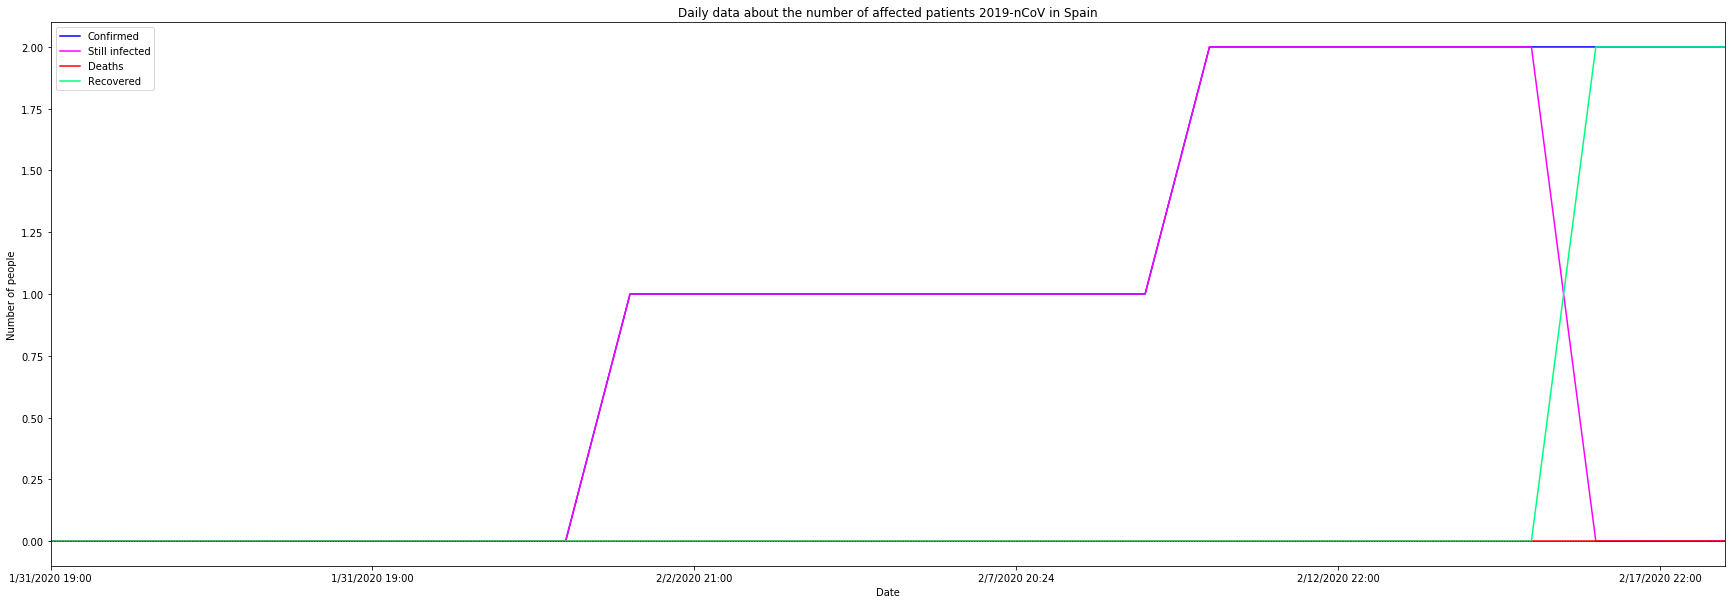

In [0]:
list_Spain = create_list_country('Spain', list_date, dict_date)
plot_line_graph(list_Spain,'Daily data about the number of affected patients 2019-nCoV in Spain')

## United Kingdom

>### Data table

In [0]:
df_UK= pd.DataFrame(dict_data['UK'],[i+1 for i in range(len(dict_data['UK']))],HEAD)
df_UK

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,1/31/2020 19:00,UK,1/31/2020 19:00,2,2,0,0
2,2/1/2020 23:00,UK,1/2/2020 1:52,2,2,0,0
3,2/2/2020 21:00,UK,1/2/2020 1:52,2,2,0,0
4,2/3/2020 21:40,UK,1/2/2020 1:52,2,2,0,0
5,2/4/2020 22:00,UK,1/2/2020 1:52,2,2,0,0
6,2/5/2020 12:20,UK,1/2/2020 1:52,2,2,0,0
7,2/6/2020 20:05,UK,1/2/2020 1:52,2,2,0,0
8,2/7/2020 20:24,UK,7/2/2020 18:33,3,3,0,0
9,2/8/2020 23:04,UK,7/2/2020 18:33,3,3,0,0
10,2/9/2020 23:20,UK,2/7/2020 18:33,3,3,0,0


>### Data graph

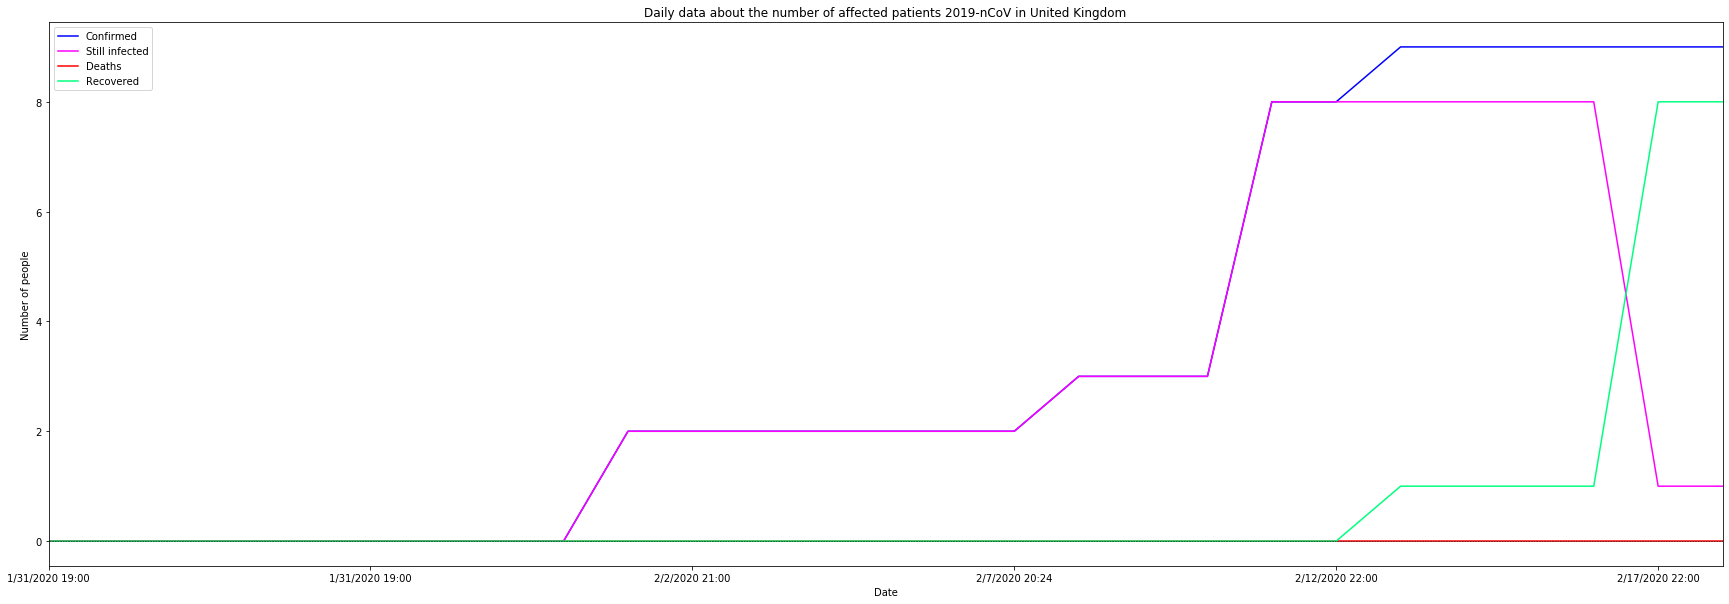

In [0]:
list_UK = create_list_country('UK', list_date, dict_date)
plot_line_graph(list_UK,'Daily data about the number of affected patients 2019-nCoV in United Kingdom')

## Belgium

>### Data table

In [0]:
df_Belgium= pd.DataFrame(dict_data['Belgium'],[i+1 for i in range(len(dict_data['Belgium']))],HEAD)
df_Belgium

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/4/2020 22:00,Belgium,4/2/2020 15:43,1,1,0,0
2,2/5/2020 12:20,Belgium,4/2/2020 15:43,1,1,0,0
3,2/6/2020 20:05,Belgium,4/2/2020 15:43,1,1,0,0
4,2/7/2020 20:24,Belgium,4/2/2020 15:43,1,1,0,0
5,2/8/2020 23:04,Belgium,4/2/2020 15:43,1,1,0,0
6,2/9/2020 23:20,Belgium,2/4/2020 15:43,1,1,0,0
7,2/10/2020 19:30,Belgium,2/4/2020 15:43,1,1,0,0
8,2/11/2020 20:44,Belgium,2/4/2020 15:43,1,1,0,0
9,2/12/2020 22:00,Belgium,2/4/2020 15:43,1,1,0,0
10,2/13/2020 21:15,Belgium,2/4/2020 15:43,1,1,0,0


>### Data graph

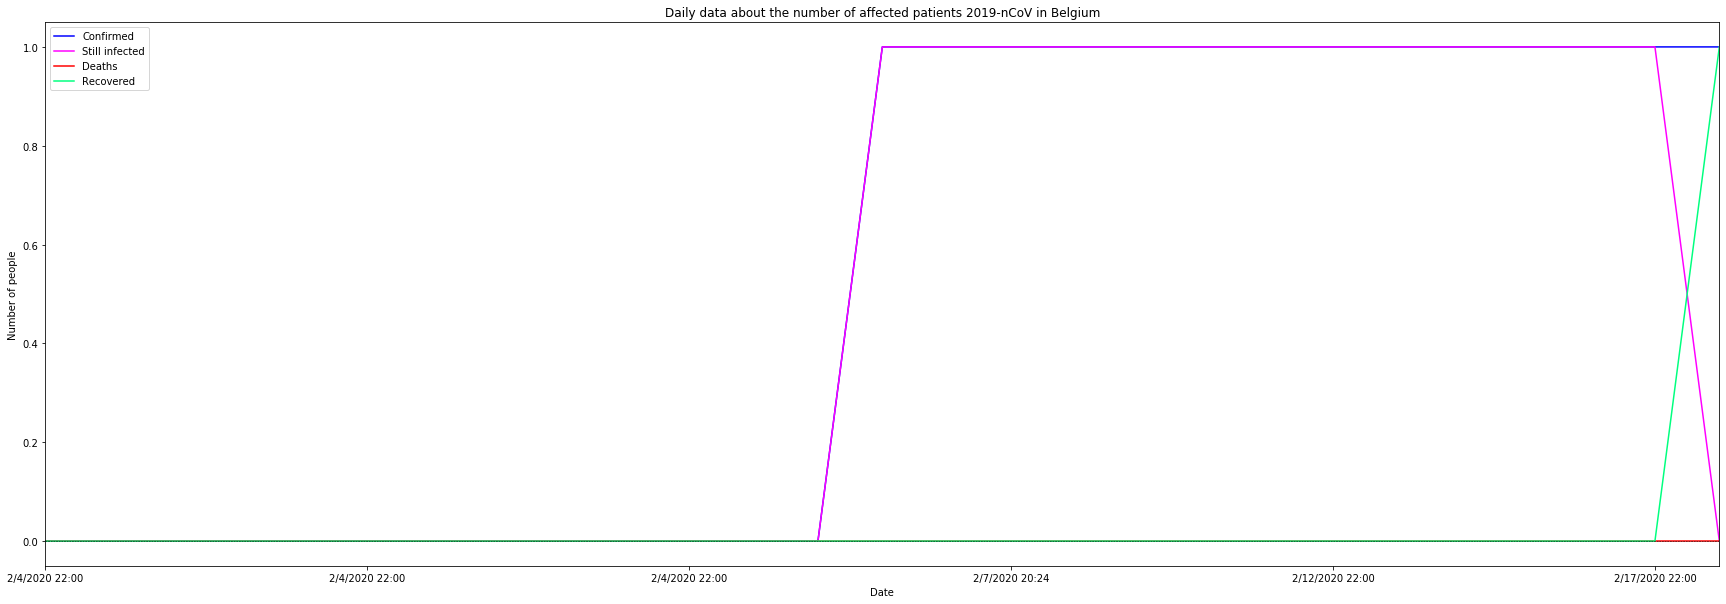

In [0]:
list_Belgium = create_list_country('Belgium', list_date, dict_date)
plot_line_graph(list_Belgium,'Daily data about the number of affected patients 2019-nCoV in Belgium')

## Egypt

>### Data table

In [0]:
df_Egypt= pd.DataFrame(dict_data['Egypt'],[i+1 for i in range(len(dict_data['Egypt']))],HEAD)
df_Egypt

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/14/2020 22:00,Egypt,2/14/2020 23:53,1,1,0,0
2,2/15/2020 22:00,Egypt,2/14/2020 23:53,1,1,0,0
3,2/16/2020 22:00,Egypt,2/14/2020 23:53,1,1,0,0
4,2/17/2020 22:00,Egypt,2/14/2020 23:53,1,1,0,0


>### Data graph

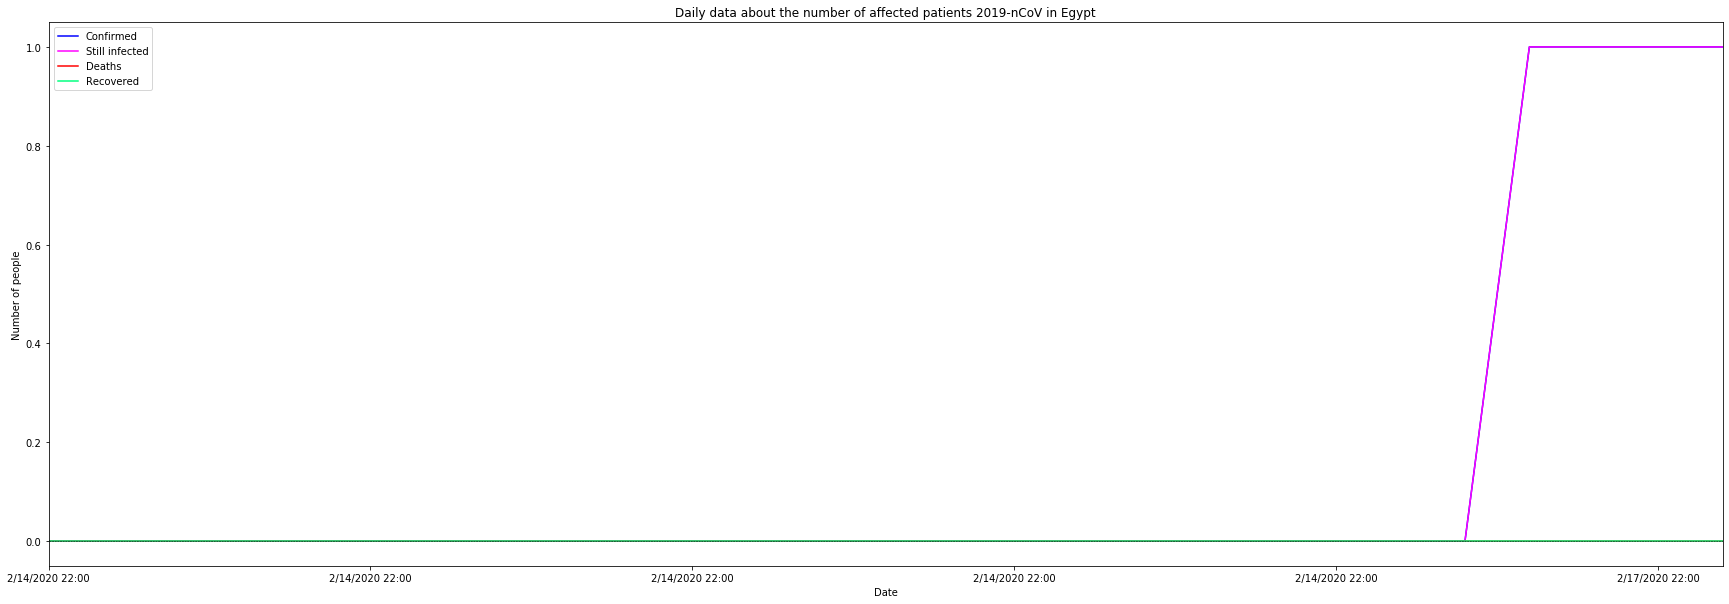

In [0]:
list_Egypt = create_list_country('Egypt', list_date, dict_date)
plot_line_graph(list_Egypt,'Daily data about the number of affected patients 2019-nCoV in Egypt')

## Others

>### Data table

In [0]:
df_Others= pd.DataFrame(dict_data['Others'],[i+1 for i in range(len(dict_data['Others']))],HEAD)
df_Others

,Date,Country,Last Update,Confirmed,Still infected,Deaths,Recovered
1,2/7/2020 20:24,Others,7/2/2020 16:33,61,61,0,0
2,2/8/2020 23:04,Others,7/2/2020 16:33,61,61,0,0
3,2/9/2020 23:20,Others,2/9/2020 6:13,125,125,0,0
4,2/10/2020 19:30,Others,2/10/2020 16:03,196,196,0,0
5,2/11/2020 20:44,Others,2/10/2020 16:03,196,196,0,0
6,2/12/2020 22:00,Others,2/12/2020 4:23,236,236,0,0
7,2/13/2020 21:15,Others,2/14/2020 0:13,279,279,0,0
8,2/14/2020 22:00,Others,2/14/2020 00:13,279,279,0,0
9,2/15/2020 22:00,Others,2/15/2020 17:03,346,346,0,0
10,2/16/2020 22:00,Others,2/16/2020 03:43,416,416,0,0


>### Data graph

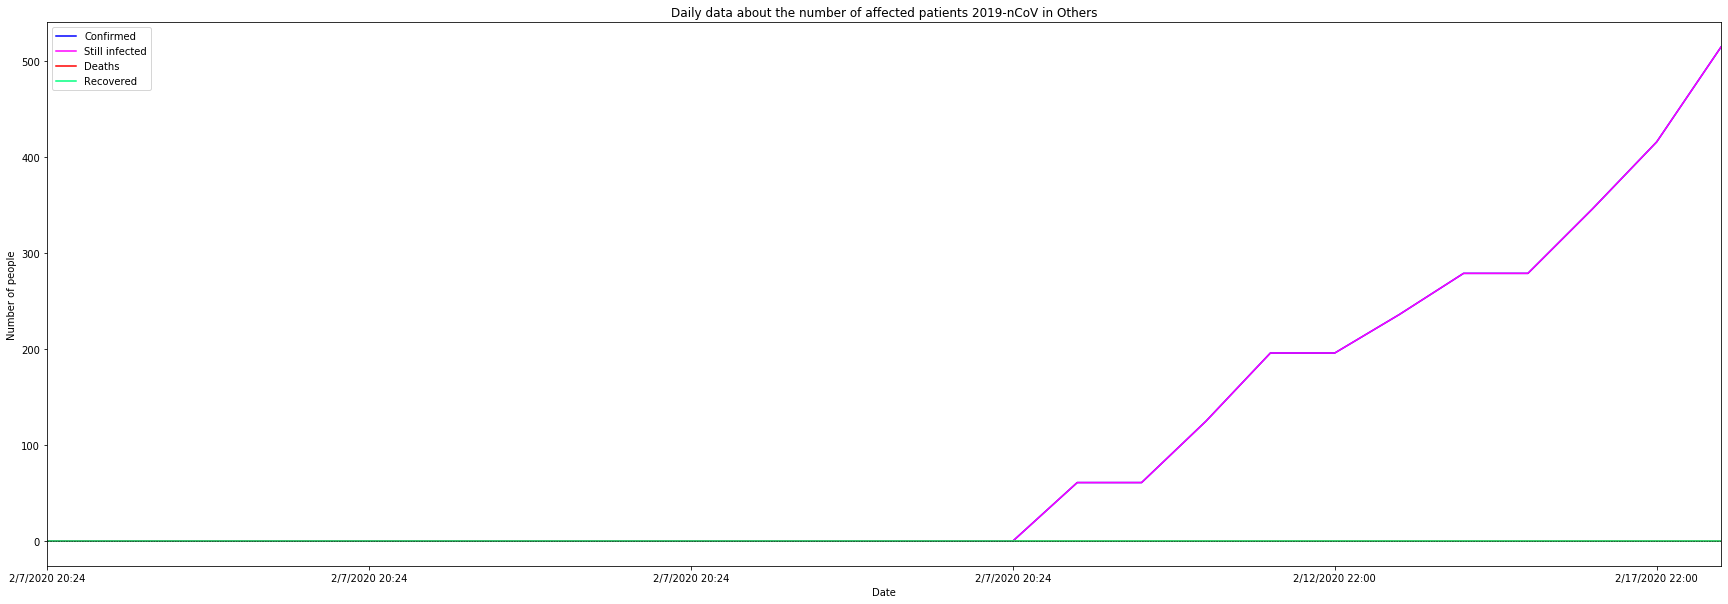

In [0]:
list_Others = create_list_country('Others', list_date, dict_date)
plot_line_graph(list_Others,'Daily data about the number of affected patients 2019-nCoV in Others')

# TEST

In [0]:
import matplotlib.pyplot as plt
filename = "Blank_map_political_world_territories.png"
img = plt.imread(filename, width=1500)
plt.imshow(img)
plt.show()

TypeError: ignored

In [0]:
from google.colab import files
from IPython.display import Image
upload_im = files.upload()

Saving Blank_map_political_world_territories.png to Blank_map_political_world_territories (1).png


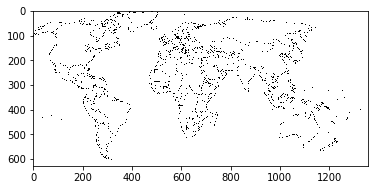

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("Blank_map_political_world_territories.png")
imgplot = plt.imshow(img)

In [0]:
print(type(upload_im))
filename = "Blank_map_political_world_territories.png"
s = Image(filename, width=1500)
with cbook.get_sample_data(str(upload_im['Blank_map_political_world_territories.png'])[2:-1]) as datafile:
    s = datafile.read()
print(type(s))
w, h = 512, 512
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 30, 0, 30)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

<class 'dict'>


OSError: ignored

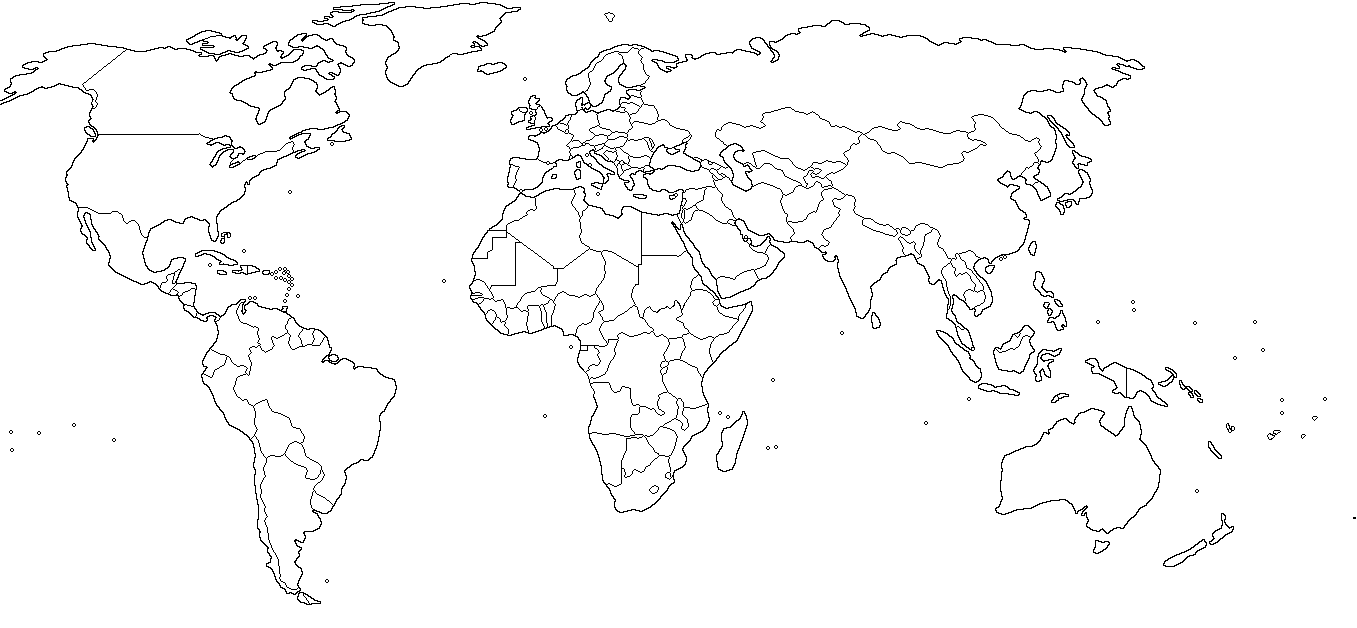

In [0]:
img = Image("Blank_map_political_world_territories.png", width=1500)


img

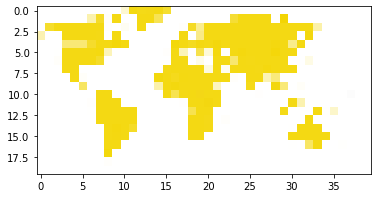

In [0]:
import cv2
img = cv2.imread('1200px-Gold_World.png')
img2 = cv2.resize(img, (40,20))     
img_cvt=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [0]:
import sys, matplotlib
from matplotlib import pyplot, cbook
imgf = cbook.get_sample_data(im_up)
img = pyplot.imread(imgf)
pyplot.imshow(img)


pyplot.show()

NameError: ignored

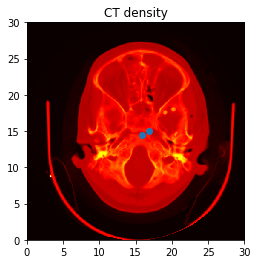

In [0]:

# And another image

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 30, 0, 30)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()